In [1]:
import tqdm 
from tqdm import tqdm

In [2]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from astropy import units as u
from astropy.io import fits 
from astropy.io import ascii
from astropy.table import QTable, Table
from astropy.cosmology import WMAP9 as cosmo
from astropy.coordinates import SkyCoord

## 1. Galaxy catalog

In [28]:
file_path = 'corrected_deduped_with_magauto_logsfr_upto_4.HOSTLIB+HOSTNBR'

# Initialize lists to hold the data
data = []
column_names = []

# Open and read the file
with open(file_path, 'r') as file:
    lines = file.readlines()

# Extract column names from the file
for line in lines:
    if line.startswith('VARNAMES:'):
        column_names = line[len('VARNAMES:'):].strip().split()
        break

# Extract data rows
for line in lines:
    if line.startswith('GAL:'):
        # Remove 'GAL:' and split by whitespace
        values = line[len('GAL:'):].strip().split()
        data.append(values)

# Create DataFrame
df = pd.DataFrame(data, columns=column_names)

# Convert appropriate columns to numeric types if needed
# df = df.apply(pd.to_numeric, errors='ignore')   # comment out if taking too long
df['ZTRUE'] = pd.to_numeric(df['ZTRUE'])
df['RA_GAL'] = pd.to_numeric(df['RA_GAL'])
df['DEC_GAL'] = pd.to_numeric(df['DEC_GAL'])
df['g_obs'] = pd.to_numeric(df['g_obs'])
df['r_obs'] = pd.to_numeric(df['r_obs'])
df['i_obs'] = pd.to_numeric(df['i_obs'])
df['z_obs'] = pd.to_numeric(df['z_obs'])


In [4]:
df.columns

Index(['GALID', 'RA_GAL', 'DEC_GAL', 'ZTRUE', 'ZERR', 'g_obs', 'r_obs',
       'i_obs', 'z_obs', 'a0_Sersic', 'b0_Sersic', 'n0_Sersic', 'a_rot',
       'LOGMASS', 'LOG_SFR', 'a_DLR', 'b_DLR', 'DLR_area', 'Sersic_area',
       'g_obs_auto', 'r_obs_auto', 'i_obs_auto', 'z_obs_auto', 'obs_gr',
       'NBR_LIST', 'LOGSFR_TRUE'],
      dtype='object')

In [5]:
df['LOGSFR_TRUE']

0           0.2218168823700216
1           0.7650899186653903
2          -0.6444139326286517
3           0.6107364686784343
4          -0.8427061081560672
                  ...         
4179384      2.181574025899582
4179385     0.7063995154950866
4179386     1.9489501449090303
4179387     1.9910396605222087
4179388      1.190032571717111
Name: LOGSFR_TRUE, Length: 4179389, dtype: object

In [6]:
df

,GALID,RA_GAL,DEC_GAL,ZTRUE,ZERR,g_obs,r_obs,i_obs,z_obs,a0_Sersic,...,b_DLR,DLR_area,Sersic_area,g_obs_auto,r_obs_auto,i_obs_auto,z_obs_auto,obs_gr,NBR_LIST,LOGSFR_TRUE
0,4300000007,52.258174,-28.58564,0.699,1.5526260057363748,22.666263,22.87072,24.456583,24.401214,0.7782367150743025,...,0.259887,0.125970087657,0.135518960641,27.099511227,25.655767015,25.4843809745,25.776877523,-0.2044569999999979,"102,71,85",0.2218168823700216
1,4300000011,52.07732,-28.585696,1.43382,0.001,23.491464,23.569005,24.809463,24.973073,0.1664313310317287,...,0.263846,0.113383069272,0.0135892643289999,25.47712414,25.43440871,25.435946403,25.225666843,-0.077541,-1,0.7650899186653903
2,4300000013,52.124443,-28.585687,0.230925,0.6688351439685187,22.125786,23.103293,23.058659,23.022337,0.2241082666910055,...,0.335814,0.211611848844,0.0163254284409999,24.919264178,24.487260017,23.88354765,23.774843302,-0.9775069999999992,"38,133",-0.6444139326286517
3,4300000014,52.186708,-28.585673,0.785695,1.558499221345116,22.41415,21.903005,23.226666,23.243523,2.062944194273184,...,0.388332,0.391842132948,1.109611531161,24.743234416,24.165643813000003,24.150353579,24.301115197,0.5111449999999991,37,0.6107364686784343
4,4300000021,52.106567,-28.585666,0.22948,0.001,23.154393,23.780093,24.567752,24.951861,0.6633283973381726,...,0.309595,0.11999964119,0.088674119524,25.689114073,25.415451415,25.141859865,25.14610851,-0.6257000000000019,45,-0.8427061081560672
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4179384,4200805417,54.076851,-29.447326,1.62366,0.001,25.649645,25.383804,24.953964,24.206734,0.0042208007765048,...,0.33257,0.1241839659899999,1.7665209000000003e-05,25.825963700000003,25.605410673,25.143198934,24.449171105,0.2658409999999982,"4179186,4179233,4179370",2.181574025899582
4179385,4200805418,54.154377,-29.446147,0.80631,0.9526983717889628,25.984977,24.939956,23.787159,23.271939,1.818199427179392,...,0.545953,0.600319545693,0.4546831872039999,27.49831409,25.0114023,23.84971999,23.408727189,1.045021000000002,"4179335,4179307,4177801,4177764,4179145,417781...",0.7063995154950866
4179386,4200805420,54.142957,-29.44796,0.85423,0.0967128679269733,24.211548,22.786839,21.658322,20.970408,1.6695429215234905,...,0.668287,0.803198774699,1.3337917002009998,24.265641576,22.884177938,21.720227522,21.051736328,1.424709,"4177766,4177773,4177799,4177749",1.9489501449090303
4179387,4200805423,54.121871,-29.447738,1.205,0.345353803366924,26.032564,24.135847,23.437828,22.483149,1.2758125986574698,...,0.539062,0.392281347082,0.934578493696,26.377934697,24.19895616,23.55068604,23.404599081,1.8967170000000024,"4177777,4177750",1.9910396605222087


In [9]:
# zgal 
zgals = df['ZTRUE']

In [9]:
# a, b, d = plt.hist(zgals, bins=100)

## 2. SN catalog

In [3]:
# 1) HEAD FILE 
f = fits.open('DES-SN5YR_DES_HEAD.FITS')
t = Table(f[1].data)

# 2) PHOT FILE 
dat = fits.open('DES-SN5YR_DES_PHOT.FITS')
tb = Table(dat[1].data)
flux = tb['FLUXCAL'].data
fluxerr = tb['FLUXCALERR'].data

# 3) CLASSIFICATION CSV
c = pd.read_csv('DES_classification.csv')     # note this is 1635 total 
cids = c['CID'].values.astype(int) 

goodsn = c[c['PROB_SNNV19'] > 0.5]            # this is 1499 
goodsnids = goodsn['CID'].values
goodsnids = goodsnids.astype(int)

common_ids = np.intersect1d(t['SNID'].data.astype(int), cids)    # 1635 

# 4) MAKING NEW DATAFRAME 
inds = list(zip(t[t['SNTYPE'] == 1]['PTROBS_MIN'], t[t['SNTYPE'] == 1]['PTROBS_MAX']))
reds = t[t['SNTYPE'] == 1]['REDSHIFT_FINAL'].data
redss = reds[reds < 0.5]

inds = np.array(inds)
indss = inds[reds < 0.5]

snrows = [np.where(t['SNID'].data.astype(int) == cids.astype(int)[i])[0][0] for i in range(len(cids))]

snra = t[snrows]['RA'].data
sndec = t[snrows]['DEC'].data
snpeakmjd = t[snrows]['PEAKMJD'].data
snmjddetectfirst = t[snrows]['MJD_DETECT_FIRST'].data
snmjddetectlast = t[snrows]['MJD_DETECT_LAST'].data
snptrobs_min = t[snrows]['PTROBS_MIN'].data
snptrobs_max = t[snrows]['PTROBS_MAX'].data
snredshift_final = t[snrows]['REDSHIFT_FINAL'].data
snmjd = [tb[snptrobs_min[i]:snptrobs_max[i]]['MJD'].data for i in range(len(snrows))]
snband = [tb[snptrobs_min[i]:snptrobs_max[i]]['BAND'].data for i in range(len(snrows))]
snfluxcal = [tb[snptrobs_min[i]:snptrobs_max[i]]['FLUXCAL'].data for i in range(len(snrows))]
snfluxcalerr = [tb[snptrobs_min[i]:snptrobs_max[i]]['FLUXCALERR'].data for i in range(len(snrows))]

hostgal_objid = t[snrows]['HOSTGAL_OBJID']
hostgal_photoz = t[snrows]['HOSTGAL_PHOTOZ']  # all -999 
hostgal_photoz_err = t[snrows]['HOSTGAL_PHOTOZ_ERR']  # all -999
hostgal_specz = t[snrows]['HOSTGAL_SPECZ']
hostgal_specz_err = t[snrows]['HOSTGAL_SPECZ_ERR']
hostgal_ra = t[snrows]['HOSTGAL_RA']
hostgal_dec = t[snrows]['HOSTGAL_DEC']
hostgal_logmass = t[snrows]['HOSTGAL_LOGMASS']
hostgal_logmass_err = t[snrows]['HOSTGAL_LOGMASS_ERR']
hostgal_logsfr = t[snrows]['HOSTGAL_LOGSFR']         # all -9999
hostgal_logsfr_err = t[snrows]['HOSTGAL_LOGSFR_ERR'] # all -9999
hostgal_color = t[snrows]['HOSTGAL_COLOR']           # all -9999
hostgal_color_err = t[snrows]['HOSTGAL_COLOR_ERR']   # all -9999
hostgal_sqradius = t[snrows]['HOSTGAL_SQRADIUS']     # all -9999

sntimes = [(snmjd[i] - snpeakmjd[i]) / (1 + snredshift_final[i]) for i in range(len(snrows))]


tnew = QTable([cids, snrows, snra, sndec, snpeakmjd, snmjddetectfirst, snmjddetectlast, snptrobs_min, snptrobs_max, snredshift_final, 
              snmjd, snband, snfluxcal, snfluxcalerr,
              hostgal_objid, hostgal_photoz, hostgal_photoz_err, hostgal_specz, hostgal_specz_err, 
               hostgal_ra, hostgal_dec, hostgal_logmass, hostgal_logmass_err, hostgal_logsfr, hostgal_logsfr_err,
               hostgal_color, hostgal_color_err, hostgal_sqradius],
           names=('CID', 'ROW', 'RA', 'DEC', 'PEAKMJD', 'MJD_DETECT_FIRST', 'MJD_DETECT_LAST', 'PTROBS_MIN', 'PTROBS_MAX', 'REDSHIFT_FINAL',
                 'MJD', 'BAND', 'FLUXCAL', 'FLUXCALERR', 
                  'HOSTGAL_OBJID', 'HOSTGAL_PHOTOZ', 'HOSTGAL_PHOTOZ_ERR', 'HOSTGAL_SPECZ', 'HOSTGAL_SPECZ_ERR', 
                  'HOSTGAL_RA', 'HOSTGAL_DEC', 'HOSTGAL_LOGMASS', 'HOSTGAL_LOGMASS_ERR', 
                  'HOSTGAL_LOGSFR', 'HOSTGAL_LOGSFR_ERR', 'HOSTGAL_COLOR', 'HOSTGAL_COLOR_ERR', 'HOSTGAL_SQRADIUS'),
           meta={'name': 'master table'})


In [4]:
t

SNID,IAUC,FAKE,MASK_FLUXCOR_SNANA,RA,DEC,PIXSIZE,NXPIX,NYPIX,SNTYPE,NOBS,PTROBS_MIN,PTROBS_MAX,MWEBV,MWEBV_ERR,REDSHIFT_HELIO,REDSHIFT_HELIO_ERR,REDSHIFT_FINAL,REDSHIFT_FINAL_ERR,REDSHIFT_QUALITYFLAG,VPEC,VPEC_ERR,HOSTGAL_NMATCH,HOSTGAL_NMATCH2,HOSTGAL_OBJID,HOSTGAL_FLAG,HOSTGAL_PHOTOZ,HOSTGAL_PHOTOZ_ERR,HOSTGAL_SPECZ,HOSTGAL_SPECZ_ERR,HOSTGAL_RA,HOSTGAL_DEC,HOSTGAL_SNSEP,HOSTGAL_DDLR,HOSTGAL_CONFUSION,HOSTGAL_LOGMASS,HOSTGAL_LOGMASS_ERR,HOSTGAL_LOGSFR,HOSTGAL_LOGSFR_ERR,HOSTGAL_LOGsSFR,HOSTGAL_LOGsSFR_ERR,HOSTGAL_COLOR,HOSTGAL_COLOR_ERR,HOSTGAL_ELLIPTICITY,HOSTGAL_OBJID2,HOSTGAL_SQRADIUS,HOSTGAL_OBJID_UNIQUE,HOSTGAL_MAG_g,HOSTGAL_MAG_r,HOSTGAL_MAG_i,HOSTGAL_MAG_z,HOSTGAL_MAGERR_g,HOSTGAL_MAGERR_r,HOSTGAL_MAGERR_i,HOSTGAL_MAGERR_z,HOSTGAL2_OBJID,HOSTGAL2_FLAG,HOSTGAL2_PHOTOZ,HOSTGAL2_PHOTOZ_ERR,HOSTGAL2_SPECZ,HOSTGAL2_SPECZ_ERR,HOSTGAL2_RA,HOSTGAL2_DEC,HOSTGAL2_SNSEP,HOSTGAL2_DDLR,HOSTGAL2_LOGMASS,HOSTGAL2_LOGMASS_ERR,HOSTGAL2_LOGSFR,HOSTGAL2_LOGSFR_ERR,HOSTGAL2_LOGsSFR,HOSTGAL2_LOGsSFR_ERR,HOSTGAL2_COLOR,HOSTGAL2_COLOR_ERR,HOSTGAL2_ELLIPTICITY,HOSTGAL2_OBJID2,HOSTGAL2_SQRADIUS,HOSTGAL2_OBJID_UNIQUE,HOSTGAL2_MAG_g,HOSTGAL2_MAG_r,HOSTGAL2_MAG_i,HOSTGAL2_MAG_z,HOSTGAL2_MAGERR_g,HOSTGAL2_MAGERR_r,HOSTGAL2_MAGERR_i,HOSTGAL2_MAGERR_z,HOSTGAL_SB_FLUXCAL_g,HOSTGAL_SB_FLUXCAL_r,HOSTGAL_SB_FLUXCAL_i,HOSTGAL_SB_FLUXCAL_z,PEAKMJD,MJD_TRIGGER,MJD_DETECT_FIRST,MJD_DETECT_LAST,SEARCH_TYPE,PRIVATE(AGN_SCAN)
str16,str16,int16,int16,float64,float64,float32,int16,int16,int32,int32,int32,int32,float32,float32,float32,float32,float32,float32,int16,float32,float32,int16,int16,int64,int16,float32,float32,float32,float32,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int64,float32,int64,float32,float32,float32,float32,float32,float32,float32,float32,int64,int16,float32,float32,float32,float32,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int64,float32,int64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int32,float64
1642082,UNKNOWN,0,0,35.169212,-5.698688,0.263,2048,4096,0,55,1,55,0.021179553,0.0010589777,0.4357,0.001,0.434529,0.001,0,0.0,300.0,1,2,112224,0,-999.0,-999.0,0.4357,0.001,35.169116,-5.698704,0.348,0.242,-99.0,10.371,0.023,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,0,-9999.0,0,22.45,21.43,21.02,20.72,0.01,0.0,0.0,0.0,112225,0,-999.0,-999.0,-999.0,-999.0,35.167386,-5.69805,6.934,6.551,-999.0,-999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,0,-9999.0,0,24.88,23.65,22.51,22.0,0.05,0.02,0.01,0.01,27.12,78.25,109.33,138.82,57739.117,57756.07,57739.117,57756.07,-9,-1.0
1294480,UNKNOWN,0,0,34.010349,-5.38346,0.263,2048,4096,0,108,57,164,0.018494692,0.0009247346,0.34536,0.001,0.344237,0.001,0,0.0,300.0,1,2,-4939,0,-999.0,-999.0,0.3454,0.001,34.01052,-5.383614,0.826,0.681,-99.0,10.845,0.036,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,0,-9999.0,0,22.29,20.55,19.82,19.45,0.01,0.0,0.0,0.0,-4935,0,-999.0,-999.0,-999.0,-999.0,34.011465,-5.383816,4.201,6.597,-999.0,-999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,0,-9999.0,0,24.9,23.32,22.78,22.46,0.06,0.01,0.01,0.01,28.95,138.47,249.43,354.04,56956.086,-9.0,56956.086,57311.11,-9,-1.0
1402031,UNKNOWN,0,0,8.426459,-44.096779,0.263,2048,4096,0,16,166,181,0.0052085603,0.000260428,-999.0,-9.0,-999.0,-9.0,0,0.0,300.0,1,1,427005,0,-999.0,-999.0,-999.0,-999.0,8.426459,-44.096779,0.0,0.0,-99.0,-999.0,-999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,0,-9999.0,0,-10.0,-10.0,-10.0,-10.0,-10.0,-10.0,-10.0,-10.0,0,0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-9.0,-9.0,-999.0,-9.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,0,-9999.0,0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-1.51,2.42,1.83,-1.64,0.01,-9.0,57642.11,-9.0,-9,-1.0
1690045,UNKNOWN,0,0,34.245853,-5.856924,0.263,2048,4096,0,111,183,293,0.020252118,0.0010126058,-9

In [187]:
tnew[100]['HOSTGAL_SPECZ'], tnew[100]['REDSHIFT_FINAL']

(0.4544, 0.453321)

In [184]:
tnew[np.where(tnew['HOSTGAL_SPECZ'] == 0)]['REDSHIFT_FINAL']

0.228057
0.169448
0.260479
0.228057
0.326699
0.318634


In [147]:
ra_0z_galfromsn = tnew[tnew['HOSTGAL_SPECZ'] == 0]['HOSTGAL_RA']
dec_0z_galfromsn = tnew[tnew['HOSTGAL_SPECZ'] == 0]['HOSTGAL_DEC']

In [148]:
ra_0z_galfromgal = df.loc[df['ZTRUE'] == 0]['RA_GAL']
dec_0zgalfromgal = df.loc[df['ZTRUE'] == 0]['DEC_GAL']

In [153]:
np.isclose(ra_0z_galfromsn[0], ra_0z_galfromgal, atol=0.1)

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False])

In [156]:
list(zip(ra_0z_galfromsn, dec_0z_galfromsn))

[(40.863557, -1.602378),
 (43.394068, 0.019029),
 (43.203379, -0.58981),
 (40.863549, -1.602379),
 (42.854945, -0.341995),
 (43.181167, 0.792259)]

In [157]:
list(zip(ra_0z_galfromgal, dec_0zgalfromgal))

# there is no overlap whatsoever in the hostgals from the sn dataframe with specz=0 
            # AND the hostgals from the gal dataframe with ztrue=0

#### ^ pathological error, get rid of these sn / gal 

[(53.008206, -27.902666),
 (53.023254, -27.777752),
 (53.007449, -27.738007),
 (53.185074, -27.9568),
 (36.422979, -4.808334),
 (36.530624, -4.330487),
 (36.504719, -5.020115),
 (36.473677, -4.484332),
 (36.637959, -4.112335),
 (35.973871, -4.747283),
 (36.453922, -4.798153),
 (54.745204, -26.641155),
 (34.160845, -4.809477),
 (34.746842, -4.669716),
 (34.446815, -4.362305),
 (34.204397, -4.956993),
 (35.623664, -5.778966)]

In [193]:
tnew[tnew['HOSTGAL_SPECZ'] == 0]['HOSTGAL_RA'], tnew[tnew['HOSTGAL_SPECZ'] == 0]['HOSTGAL_DEC']

(array([40.863557, 43.394068, 43.203379, 40.863549, 42.854945, 43.181167],
       dtype='>f8'),
 array([-1.602378,  0.019029, -0.58981 , -1.602379, -0.341995,  0.792259],
       dtype='>f8'))

In [194]:
tnew[tnew['HOSTGAL_SPECZ'] == 0]['RA'], tnew[tnew['HOSTGAL_SPECZ'] == 0]['DEC']

(<Column name='RA' dtype='float64' length=6>
 40.863659
 43.394016
 43.202988
 40.864075
 42.855026
 43.182114,
 <Column name='DEC' dtype='float64' length=6>
 -1.601682
  0.019034
 -0.589503
 -1.603645
 -0.341719
  0.791912)

In [11]:
# tnew['REDSHIFT_FINAL']

In [5]:
df = pd.read_csv('gal_df_updated.csv')
# pd.to_numeric(
df

,Unnamed: 0,GALID,RA_GAL,DEC_GAL,ZTRUE,ZERR,g_obs,r_obs,i_obs,z_obs,...,Sersic_area,g_obs_auto,r_obs_auto,i_obs_auto,z_obs_auto,obs_gr,NBR_LIST,LOGSFR_TRUE,griz,weight
0,0,4300000007,52.258174,-28.585640,0.699000,1.552626,22.666263,22.870720,24.456583,24.401214,...,0.135519,27.099511,25.655767,25.484381,25.776878,-0.204457,"102,71,85",0.221817,94.394780,0.8
1,1,4300000011,52.077320,-28.585696,1.433820,0.001000,23.491464,23.569005,24.809463,24.973073,...,0.013589,25.477124,25.434409,25.435946,25.225667,-0.077541,-1,0.765090,96.843005,0.6
2,2,4300000013,52.124443,-28.585687,0.230925,0.668835,22.125786,23.103293,23.058659,23.022337,...,0.016325,24.919264,24.487260,23.883548,23.774843,-0.977507,"38,133",-0.644414,91.310075,0.9
3,3,4300000014,52.186708,-28.585673,0.785695,1.558499,22.414150,21.903005,23.226666,23.243523,...,1.109612,24.743234,24.165644,24.150354,24.301115,0.511145,37,0.610736,90.787344,0.9
4,4,4300000021,52.106567,-28.585666,0.229480,0.001000,23.154393,23.780093,24.567752,24.951861,...,0.088674,25.689114,25.415451,25.141860,25.146109,-0.625700,45,-0.842706,96.454099,0.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4179384,4179384,4200805417,54.076851,-29.447326,1.623660,0.001000,25.649645,25.383804,24.953964,24.206734,...,0.000018,25.825964,25.605411,25.143199,24.449171,0.265841,"4179186,4179233,4179370",2.181574,100.194147,0.3
4179385,4179385,4200805418,54.154377,-29.446147,0.806310,0.952698,25.984977,24.939956,23.787159,23.271939,...,0.454683,27.498314,25.011402,23.849720,23.408727,1.045021,"4179335,4179307,4177801,4177764,4179145,417781...",0.706400,97.984031,0.5
4179386,4179386,4200805420,54.142957,-29.447960,0.854230,0.096713,24.211548,22.786839,21.658322,20.970408,...,1.333792,24.265642,22.884178,21.720228,21.051736,1.424709,"4177766,4177773,4177799,4177749",1.948950,89.627117,1.0
4179387,4179387,4200805423,54.121871,-29.447738,1.205000,0.345354,26.032564,24.135847,23.437828,22.483149,...,0.934578,26.377935,24.198956,23.550686,23.404599,1.896717,"4177777,4177750",1.991040,96.089388,0.7


In [7]:
df

,Unnamed: 0,GALID,RA_GAL,DEC_GAL,ZTRUE,ZERR,g_obs,r_obs,i_obs,z_obs,...,Sersic_area,g_obs_auto,r_obs_auto,i_obs_auto,z_obs_auto,obs_gr,NBR_LIST,LOGSFR_TRUE,griz,weight
0,0,4300000007,52.258174,-28.585640,0.699000,1.552626,22.666263,22.870720,24.456583,24.401214,...,0.135519,27.099511,25.655767,25.484381,25.776878,-0.204457,"102,71,85",0.221817,94.394780,0.8
1,1,4300000011,52.077320,-28.585696,1.433820,0.001000,23.491464,23.569005,24.809463,24.973073,...,0.013589,25.477124,25.434409,25.435946,25.225667,-0.077541,-1,0.765090,96.843005,0.6
2,2,4300000013,52.124443,-28.585687,0.230925,0.668835,22.125786,23.103293,23.058659,23.022337,...,0.016325,24.919264,24.487260,23.883548,23.774843,-0.977507,"38,133",-0.644414,91.310075,0.9
3,3,4300000014,52.186708,-28.585673,0.785695,1.558499,22.414150,21.903005,23.226666,23.243523,...,1.109612,24.743234,24.165644,24.150354,24.301115,0.511145,37,0.610736,90.787344,0.9
4,4,4300000021,52.106567,-28.585666,0.229480,0.001000,23.154393,23.780093,24.567752,24.951861,...,0.088674,25.689114,25.415451,25.141860,25.146109,-0.625700,45,-0.842706,96.454099,0.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4179384,4179384,4200805417,54.076851,-29.447326,1.623660,0.001000,25.649645,25.383804,24.953964,24.206734,...,0.000018,25.825964,25.605411,25.143199,24.449171,0.265841,"4179186,4179233,4179370",2.181574,100.194147,0.3
4179385,4179385,4200805418,54.154377,-29.446147,0.806310,0.952698,25.984977,24.939956,23.787159,23.271939,...,0.454683,27.498314,25.011402,23.849720,23.408727,1.045021,"4179335,4179307,4177801,4177764,4179145,417781...",0.706400,97.984031,0.5
4179386,4179386,4200805420,54.142957,-29.447960,0.854230,0.096713,24.211548,22.786839,21.658322,20.970408,...,1.333792,24.265642,22.884178,21.720228,21.051736,1.424709,"4177766,4177773,4177799,4177749",1.948950,89.627117,1.0
4179387,4179387,4200805423,54.121871,-29.447738,1.205000,0.345354,26.032564,24.135847,23.437828,22.483149,...,0.934578,26.377935,24.198956,23.550686,23.404599,1.896717,"4177777,4177750",1.991040,96.089388,0.7


In [84]:
t.columns

<TableColumns names=('SNID','IAUC','FAKE','MASK_FLUXCOR_SNANA','RA','DEC','PIXSIZE','NXPIX','NYPIX','SNTYPE','NOBS','PTROBS_MIN','PTROBS_MAX','MWEBV','MWEBV_ERR','REDSHIFT_HELIO','REDSHIFT_HELIO_ERR','REDSHIFT_FINAL','REDSHIFT_FINAL_ERR','REDSHIFT_QUALITYFLAG','VPEC','VPEC_ERR','HOSTGAL_NMATCH','HOSTGAL_NMATCH2','HOSTGAL_OBJID','HOSTGAL_FLAG','HOSTGAL_PHOTOZ','HOSTGAL_PHOTOZ_ERR','HOSTGAL_SPECZ','HOSTGAL_SPECZ_ERR','HOSTGAL_RA','HOSTGAL_DEC','HOSTGAL_SNSEP','HOSTGAL_DDLR','HOSTGAL_CONFUSION','HOSTGAL_LOGMASS','HOSTGAL_LOGMASS_ERR','HOSTGAL_LOGSFR','HOSTGAL_LOGSFR_ERR','HOSTGAL_LOGsSFR','HOSTGAL_LOGsSFR_ERR','HOSTGAL_COLOR','HOSTGAL_COLOR_ERR','HOSTGAL_ELLIPTICITY','HOSTGAL_OBJID2','HOSTGAL_SQRADIUS','HOSTGAL_OBJID_UNIQUE','HOSTGAL_MAG_g','HOSTGAL_MAG_r','HOSTGAL_MAG_i','HOSTGAL_MAG_z','HOSTGAL_MAGERR_g','HOSTGAL_MAGERR_r','HOSTGAL_MAGERR_i','HOSTGAL_MAGERR_z','HOSTGAL2_OBJID','HOSTGAL2_FLAG','HOSTGAL2_PHOTOZ','HOSTGAL2_PHOTOZ_ERR','HOSTGAL2_SPECZ','HOSTGAL2_SPECZ_ERR','HOSTGAL2_RA','HO

## 3. Cross correlation & color

In [ ]:
* Cross correlation between supernova and galaxy catalog: 
    * 1.  Count the number of galaxies around supernova (all redshifts z_gal < z_SN)  
        * Impact parameters -> of foreground galaxies, weighing something (i.e. size of galaxy in foreground) 
    * 2. Look at SALT2 color from SNANA
    * 3. Plot SALT2 color vs. number of nearby galaxies to supernova images 
    
For now, yes, but we should also consider calculating the impact parameter to all the foreground galaxies (z_gal < z_SN) 
and then summing them up.  We should weight the impact parameter by, for example, the luminosity or mass of the galaxy. 
Larger galaxies have, in general, more dust.


In [ ]:
""" the +hostnbr just gives an additional column of neighboring galaxy indices"""




### a) Limit by physical impact parameter b

In [4]:
## rank all the galaxies by brightness

griz = df['g_obs'] + df['r_obs'] + df['i_obs'] + df['z_obs']
df['griz'] = griz

## weight is ABSOLUTE and NOT RELATIVE. (stages: 0.1 - 1) 
bins = np.quantile(griz, np.linspace(0, 1, 11))
inds = np.digitize(griz, bins)       # 1 to 10 with 1 being smallest, 10 being largest magnitude. 

# now, 10 is the best 
weights = (11 - inds) * 0.1
df['weight'] = weights

## BEFORE (relative)
# rank = np.zeros(len(df))
# rank[griz.argsort(-1).values] = np.arange(len(df))
# df['mag_rank+1'] = (rank+1).astype(int)            # brightest one is rank 1, NOT 0 
# df['weighted_rank'] =                              # brightest is 1, dimmest is 0.01? 

In [5]:
pd.set_option('display.max_columns', None)
df

,GALID,RA_GAL,DEC_GAL,ZTRUE,ZERR,g_obs,r_obs,i_obs,z_obs,a0_Sersic,b0_Sersic,n0_Sersic,a_rot,LOGMASS,LOG_SFR,a_DLR,b_DLR,DLR_area,Sersic_area,g_obs_auto,r_obs_auto,i_obs_auto,z_obs_auto,obs_gr,NBR_LIST,LOGSFR_TRUE,griz,weight
0,4300000007,52.258174,-28.585640,0.699000,1.5526260057363748,22.666263,22.870720,24.456583,24.401214,0.7782367150743025,0.1741359126548807,7.022214,-0.973901,7.956258728274895,0.2218168823700216,0.484711,0.259887,0.125970087657,0.135518960641,27.099511227,25.655767015,25.4843809745,25.776877523,-0.2044569999999979,"102,71,85",0.2218168823700216,94.394780,0.8
1,4300000011,52.077320,-28.585696,1.433820,0.001,23.491464,23.569005,24.809463,24.973073,0.1664313310317287,0.081650878141504,9.569788,-2.061484,8.416196847646376,0.7650899186653903,0.429732,0.263846,0.113383069272,0.0135892643289999,25.47712414,25.43440871,25.435946403,25.225666843,-0.077541,-1,0.7650899186653903,96.843005,0.6
2,4300000013,52.124443,-28.585687,0.230925,0.6688351439685187,22.125786,23.103293,23.058659,23.022337,0.2241082666910055,0.0728461679796446,9.199002,-2.694743,7.515472801696563,-0.6444139326286517,0.630146,0.335814,0.211611848844,0.0163254284409999,24.919264178,24.487260017,23.88354765,23.774843302,-0.9775069999999992,"38,133",-0.6444139326286517,91.310075,0.9
3,4300000014,52.186708,-28.585673,0.785695,1.558499221345116,22.414150,21.903005,23.226666,23.243523,2.062944194273184,0.5378776286054301,2.668786,0.978217,8.543406311131944,0.6107364686784343,1.009039,0.388332,0.391842132948,1.109611531161,24.743234416,24.165643813000003,24.150353579,24.301115197,0.5111449999999991,37,0.6107364686784343,90.787344,0.9
4,4300000021,52.106567,-28.585666,0.229480,0.001,23.154393,23.780093,24.567752,24.951861,0.6633283973381726,0.1336805719155619,8.22705,33.88976,6.554410131253568,-0.8427061081560672,0.387602,0.309595,0.11999964119,0.088674119524,25.689114073,25.415451415,25.141859865,25.14610851,-0.6257000000000019,45,-0.8427061081560672,96.454099,0.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4179384,4200805417,54.076851,-29.447326,1.623660,0.001,25.649645,25.383804,24.953964,24.206734,0.0042208007765048,0.0041852742963689,1.392719,-48.221046,12.799254814359385,2.181574025899582,0.373407,0.33257,0.1241839659899999,1.7665209000000003e-05,25.825963700000003,25.605410673,25.143198934,24.449171105,0.2658409999999982,"4179186,4179233,4179370",2.181574025899582,100.194147,0.3
4179385,4200805418,54.154377,-29.446147,0.806310,0.9526983717889628,25.984977,24.939956,23.787159,23.271939,1.818199427179392,0.2500733310148264,1.417273,-85.03126,11.420066382541563,0.7063995154950866,1.099581,0.545953,0.600319545693,0.4546831872039999,27.49831409,25.0114023,23.84971999,23.408727189,1.045021000000002,"4179335,4179307,4177801,4177764,4179145,417781...",0.7063995154950866,97.984031,0.5
4179386,4200805420,54.142957,-29.447960,0.854230,0.0967128679269733,24.211548,22.786839,21.658322,20.970408,1.6695429215234905,0.7988963224640484,1.140618,-76.35511,11.355207896640245,1.9489501449090303,1.201877,0.668287,0.803198774699,1.3337917002009998,24.265641576,22.884177938,21.720227522,21.051736328,1.424709,"4177766,4177773,4177799,4177749",1.9489501449090303,89.627117,1.0
4179387,4200805423,54.121871,-29.447738,1.205000,0.345353803366924,26.032564,24.135847,23.437828,22.483149,1.2758125986574698,0.7325358713963568,1.434411,-43.326214,10.29593475215387,1.9910396605222087,0.727711,0.539062,0.392281347082,0.934578493696,26.377934697,24.19895616,23.55068604,23.404599081,1.8967170000000024,"4177777,4177750",1.9910396605222087,96.089388,0.7


In [70]:
t

SNID,IAUC,FAKE,MASK_FLUXCOR_SNANA,RA,DEC,PIXSIZE,NXPIX,NYPIX,SNTYPE,NOBS,PTROBS_MIN,PTROBS_MAX,MWEBV,MWEBV_ERR,REDSHIFT_HELIO,REDSHIFT_HELIO_ERR,REDSHIFT_FINAL,REDSHIFT_FINAL_ERR,REDSHIFT_QUALITYFLAG,VPEC,VPEC_ERR,HOSTGAL_NMATCH,HOSTGAL_NMATCH2,HOSTGAL_OBJID,HOSTGAL_FLAG,HOSTGAL_PHOTOZ,HOSTGAL_PHOTOZ_ERR,HOSTGAL_SPECZ,HOSTGAL_SPECZ_ERR,HOSTGAL_RA,HOSTGAL_DEC,HOSTGAL_SNSEP,HOSTGAL_DDLR,HOSTGAL_CONFUSION,HOSTGAL_LOGMASS,HOSTGAL_LOGMASS_ERR,HOSTGAL_LOGSFR,HOSTGAL_LOGSFR_ERR,HOSTGAL_LOGsSFR,HOSTGAL_LOGsSFR_ERR,HOSTGAL_COLOR,HOSTGAL_COLOR_ERR,HOSTGAL_ELLIPTICITY,HOSTGAL_OBJID2,HOSTGAL_SQRADIUS,HOSTGAL_OBJID_UNIQUE,HOSTGAL_MAG_g,HOSTGAL_MAG_r,HOSTGAL_MAG_i,HOSTGAL_MAG_z,HOSTGAL_MAGERR_g,HOSTGAL_MAGERR_r,HOSTGAL_MAGERR_i,HOSTGAL_MAGERR_z,HOSTGAL2_OBJID,HOSTGAL2_FLAG,HOSTGAL2_PHOTOZ,HOSTGAL2_PHOTOZ_ERR,HOSTGAL2_SPECZ,HOSTGAL2_SPECZ_ERR,HOSTGAL2_RA,HOSTGAL2_DEC,HOSTGAL2_SNSEP,HOSTGAL2_DDLR,HOSTGAL2_LOGMASS,HOSTGAL2_LOGMASS_ERR,HOSTGAL2_LOGSFR,HOSTGAL2_LOGSFR_ERR,HOSTGAL2_LOGsSFR,HOSTGAL2_LOGsSFR_ERR,HOSTGAL2_COLOR,HOSTGAL2_COLOR_ERR,HOSTGAL2_ELLIPTICITY,HOSTGAL2_OBJID2,HOSTGAL2_SQRADIUS,HOSTGAL2_OBJID_UNIQUE,HOSTGAL2_MAG_g,HOSTGAL2_MAG_r,HOSTGAL2_MAG_i,HOSTGAL2_MAG_z,HOSTGAL2_MAGERR_g,HOSTGAL2_MAGERR_r,HOSTGAL2_MAGERR_i,HOSTGAL2_MAGERR_z,HOSTGAL_SB_FLUXCAL_g,HOSTGAL_SB_FLUXCAL_r,HOSTGAL_SB_FLUXCAL_i,HOSTGAL_SB_FLUXCAL_z,PEAKMJD,MJD_TRIGGER,MJD_DETECT_FIRST,MJD_DETECT_LAST,SEARCH_TYPE,PRIVATE(AGN_SCAN)
str16,str16,int16,int16,float64,float64,float32,int16,int16,int32,int32,int32,int32,float32,float32,float32,float32,float32,float32,int16,float32,float32,int16,int16,int64,int16,float32,float32,float32,float32,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int64,float32,int64,float32,float32,float32,float32,float32,float32,float32,float32,int64,int16,float32,float32,float32,float32,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int64,float32,int64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int32,float64
1642082,UNKNOWN,0,0,35.169212,-5.698688,0.263,2048,4096,0,55,1,55,0.021179553,0.0010589777,0.4357,0.001,0.434529,0.001,0,0.0,300.0,1,2,112224,0,-999.0,-999.0,0.4357,0.001,35.169116,-5.698704,0.348,0.242,-99.0,10.371,0.023,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,0,-9999.0,0,22.45,21.43,21.02,20.72,0.01,0.0,0.0,0.0,112225,0,-999.0,-999.0,-999.0,-999.0,35.167386,-5.69805,6.934,6.551,-999.0,-999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,0,-9999.0,0,24.88,23.65,22.51,22.0,0.05,0.02,0.01,0.01,27.12,78.25,109.33,138.82,57739.117,57756.07,57739.117,57756.07,-9,-1.0
1294480,UNKNOWN,0,0,34.010349,-5.38346,0.263,2048,4096,0,108,57,164,0.018494692,0.0009247346,0.34536,0.001,0.344237,0.001,0,0.0,300.0,1,2,-4939,0,-999.0,-999.0,0.3454,0.001,34.01052,-5.383614,0.826,0.681,-99.0,10.845,0.036,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,0,-9999.0,0,22.29,20.55,19.82,19.45,0.01,0.0,0.0,0.0,-4935,0,-999.0,-999.0,-999.0,-999.0,34.011465,-5.383816,4.201,6.597,-999.0,-999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,0,-9999.0,0,24.9,23.32,22.78,22.46,0.06,0.01,0.01,0.01,28.95,138.47,249.43,354.04,56956.086,-9.0,56956.086,57311.11,-9,-1.0
1402031,UNKNOWN,0,0,8.426459,-44.096779,0.263,2048,4096,0,16,166,181,0.0052085603,0.000260428,-999.0,-9.0,-999.0,-9.0,0,0.0,300.0,1,1,427005,0,-999.0,-999.0,-999.0,-999.0,8.426459,-44.096779,0.0,0.0,-99.0,-999.0,-999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,0,-9999.0,0,-10.0,-10.0,-10.0,-10.0,-10.0,-10.0,-10.0,-10.0,0,0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-9.0,-9.0,-999.0,-9.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,0,-9999.0,0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-1.51,2.42,1.83,-1.64,0.01,-9.0,57642.11,-9.0,-9,-1.0
1690045,UNKNOWN,0,0,34.245853,-5.856924,0.263,2048,4096,0,111,183,293,0.020252118,0.0010126058,-9

In [5]:
# to save in case have to run everything 
df.to_csv('gal_df_updated.csv')

NameError: name 'df' is not defined

In [5]:
df = pd.read_csv('gal_df_updated.csv')
df

,Unnamed: 0,GALID,RA_GAL,DEC_GAL,ZTRUE,ZERR,g_obs,r_obs,i_obs,z_obs,...,Sersic_area,g_obs_auto,r_obs_auto,i_obs_auto,z_obs_auto,obs_gr,NBR_LIST,LOGSFR_TRUE,griz,weight
0,0,4300000007,52.258174,-28.585640,0.699000,1.552626,22.666263,22.870720,24.456583,24.401214,...,0.135519,27.099511,25.655767,25.484381,25.776878,-0.204457,"102,71,85",0.221817,94.394780,0.8
1,1,4300000011,52.077320,-28.585696,1.433820,0.001000,23.491464,23.569005,24.809463,24.973073,...,0.013589,25.477124,25.434409,25.435946,25.225667,-0.077541,-1,0.765090,96.843005,0.6
2,2,4300000013,52.124443,-28.585687,0.230925,0.668835,22.125786,23.103293,23.058659,23.022337,...,0.016325,24.919264,24.487260,23.883548,23.774843,-0.977507,"38,133",-0.644414,91.310075,0.9
3,3,4300000014,52.186708,-28.585673,0.785695,1.558499,22.414150,21.903005,23.226666,23.243523,...,1.109612,24.743234,24.165644,24.150354,24.301115,0.511145,37,0.610736,90.787344,0.9
4,4,4300000021,52.106567,-28.585666,0.229480,0.001000,23.154393,23.780093,24.567752,24.951861,...,0.088674,25.689114,25.415451,25.141860,25.146109,-0.625700,45,-0.842706,96.454099,0.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4179384,4179384,4200805417,54.076851,-29.447326,1.623660,0.001000,25.649645,25.383804,24.953964,24.206734,...,0.000018,25.825964,25.605411,25.143199,24.449171,0.265841,"4179186,4179233,4179370",2.181574,100.194147,0.3
4179385,4179385,4200805418,54.154377,-29.446147,0.806310,0.952698,25.984977,24.939956,23.787159,23.271939,...,0.454683,27.498314,25.011402,23.849720,23.408727,1.045021,"4179335,4179307,4177801,4177764,4179145,417781...",0.706400,97.984031,0.5
4179386,4179386,4200805420,54.142957,-29.447960,0.854230,0.096713,24.211548,22.786839,21.658322,20.970408,...,1.333792,24.265642,22.884178,21.720228,21.051736,1.424709,"4177766,4177773,4177799,4177749",1.948950,89.627117,1.0
4179387,4179387,4200805423,54.121871,-29.447738,1.205000,0.345354,26.032564,24.135847,23.437828,22.483149,...,0.934578,26.377935,24.198956,23.550686,23.404599,1.896717,"4177777,4177750",1.991040,96.089388,0.7


In [5]:
# testing for just two, to write to a file. 
gal_ztrue = df['ZTRUE'].values
gal_ra = df['RA_GAL'].values * u.deg
gal_dec = df['DEC_GAL'].values * u.deg

# angular diameter distances of all galaxies
gal_angdist_all = cosmo.angular_diameter_distance(gal_ztrue)

# initialize master impact parameter arrays 
all_imp_kpcs1 = np.zeros((len(tnew['CID'].data), len(df)))
all_imp_kpcs2 = np.zeros((len(tnew['CID'].data), len(df)))

thresh = 1000        # kpc 
num_fgals = np.full(len(tnew['CID'].data), np.nan)

## start loop here 

for i in range(2): 
    z_sn = tnew[i]['REDSHIFT_FINAL']
    ra_sn = tnew[i]['RA'] * u.deg
    dec_sn = tnew[i]['DEC'] * u.deg

    sn_angdist = cosmo.angular_diameter_distance(z_sn)       # actually i don't need this
    sn_coord = SkyCoord(ra=ra_sn, dec=dec_sn, distance=sn_angdist)


    mask = df['ZTRUE'] <= z_sn
    gal_coords = SkyCoord(ra=gal_ra[mask], dec=gal_dec[mask], distance=gal_angdist_all[mask])

    thetas = sn_coord.separation(gal_coords).radian

    imp_kpc_1 = (thetas * gal_angdist_all[mask].to(u.kpc)).value
    ## 1) make all 0's = -1, then get rid of all of them that are 0
    imp_kpc_1[imp_kpc_1 == 0] = -1             # to differentiate from the 0's that initiated the array
    all_imp_kpcs1[i, mask] = imp_kpc_1

    ## 2) then replace the -1 with the *CORRECT* 0 kpc values. (later on) 
    all_imp_kpcs1[i][all_imp_kpcs1[i] == 0] = -100         # original empty initiated array 
    all_imp_kpcs1[i][all_imp_kpcs1[i] == -1] = 0           # replacing with correct b kpc 

    with open('impact_parameters.csv', 'a', newline='') as f:
        writer = csv.writer(f)
        writer.writerow(all_imp_kpcs1[i])
        
    ### get griz magnitudes 
    thresh = 1000      # kpc
    close_gal = (0 <= all_imp_kpcs1[i]) & (all_imp_kpcs1[i] < thresh)    # boolean mask 
    weights = df['weight'].loc[close_gal]
    num_fgals[i] = np.sum(weights)                   # weighted number of foreground galaxies 

    #     ### save to file
#     with open('impact_parameters.txt', 'w') as f:
#         f.write(f"{all_imp_kpcs1[i]}\n")
        
#     with open('test.npy', 'wb') as f:
#         np.save(f, all_imp_kpcs1[i])

    # np.save('test.npy', all_imp_kpcs1[i])

In [115]:
######## COMMENTED, (GOOD!) Weighted & Vectorized Version for ALL SN: ########

# z, ra, dec of all galaxies
gal_ztrue = df['ZTRUE'].values
gal_ra = df['RA_GAL'].values * u.deg
gal_dec = df['DEC_GAL'].values * u.deg

# angular diameter distances of all galaxies
gal_angdist_all = cosmo.angular_diameter_distance(gal_ztrue)

# initialize master impact parameter arrays : note i used zeros because otherwise my memory dies, but if more memory then should use nan 
all_imp_kpcs1 = np.zeros((len(tnew['CID'].data), len(df)))
all_imp_kpcs2 = np.zeros((len(tnew['CID'].data), len(df)))

thresh = 1000        # kpc 
num_fgals = np.full(len(tnew['CID'].data), np.nan)

#### start loop for all sn #### 
for i, cid in tqdm(enumerate(tnew['CID'].data), total=len(tnew['CID'].data)):

    z_sn = tnew[i]['REDSHIFT_FINAL']
    ra_sn = tnew[i]['RA'] * u.deg
    dec_sn = tnew[i]['DEC'] * u.deg

    # sn_comdist = cosmo.comoving_distance(z_sn)
    sn_angdist = cosmo.angular_diameter_distance(z_sn)       # actually i don't need this
    sn_coord = SkyCoord(ra=ra_sn, dec=dec_sn, distance=sn_angdist)

    ## initialize impact parameter b arrays 
    # imp_kpc1 = np.full(len(df), np.nan)
    # imp_kpc2 = np.full(len(df), np.nan)

    mask = df['ZTRUE'] <= z_sn
    # gal_comdist = cosmo.comoving_distance(df.loc[mask, 'ZTRUE'])
    # gal_angdist = cosmo.angular_diameter_distance(df.loc[mask, 'ZTRUE'])
    gal_coords = SkyCoord(ra=gal_ra[mask], dec=gal_dec[mask], distance=gal_angdist_all[mask])

    thetas = sn_coord.separation(gal_coords).radian
    
    
    #### 1st way (d = r*theta) 
                # (BEFORE) imp_kpc_1 = (thetas * u.rad).to(u.arcmin) * cosmo.kpc_comoving_per_arcmin(df.loc[mask, 'ZTRUE'])
    imp_kpc_1 = (thetas * gal_angdist_all[mask].to(u.kpc)).value
                # (BEFORE) imp_kpc1[mask.values] = imp_kpc_1.value   

    ## 1) make all 0's = -1, then get rid of all of them that are 0
    imp_kpc_1[imp_kpc_1 == 0] = -1             # to differentiate from the 0's that initiated the array
    all_imp_kpcs1[i, mask] = imp_kpc_1

    ## 2) then replace the -1 with the *CORRECT* 0 kpc values. 
    all_imp_kpcs1[i][all_imp_kpcs1[i] == 0] = -100         # original empty initiated array 
    all_imp_kpcs1[i][all_imp_kpcs1[i] == -1] = 0           # replacing with correct b kpc 

    
    #### 2nd way (right triangle, 2D geometry) -- gives smaller values of impact parameter
    # imp_kpc_2 = gal_angdist_all[mask].to(u.kpc) * np.sin(thetas)
                # (BEFORE) imp_kpc2[mask.values] = imp_kpc_2.value
    # all_imp_kpcs2[i, mask] = imp_kpc_2.value
    
    ## similar zero'ing thing as 1st way
    # imp_kpc_2[imp_kpc_2 == 0] = -1             
    # all_imp_kpcs2[i, mask] = imp_kpc_2
    # all_imp_kpcs2[i][all_imp_kpcs2[i] == 0] = -100          
    # all_imp_kpcs2[i][all_imp_kpcs2[i] == -1] = 0   
    
    
    ### get griz magnitudes, using all_imp_kpcs1[i]
    close_gal = (0 <= all_imp_kpcs1[i]) & (all_imp_kpcs1[i] < thresh)    # boolean mask 
    weights = df['weight'].loc[close_gal]
    num_fgals[i] = np.sum(weights)                   # weighted number of foreground galaxies 

    # np.median(imp_kpc1[~np.isnan(imp_kpc1)]), np.median(imp_kpc2[~np.isnan(imp_kpc2)])
    
    # all_imp_kpcs1[i] = imp_kpc1
    # all_imp_kpcs2[i] = imp_kpc2
    

KeyboardInterrupt: 

In [ ]:
###### CLEANED UP VERSION OF THAT (no comments) #######

# z, ra, dec of all galaxies
gal_ztrue = df['ZTRUE'].values
gal_ra = df['RA_GAL'].values * u.deg
gal_dec = df['DEC_GAL'].values * u.deg

# angular diameter distances of all galaxies
gal_angdist_all = cosmo.angular_diameter_distance(gal_ztrue)

# initialize master impact parameter arrays : note i used zeros because otherwise my memory dies, but if more memory then should use nan 
all_imp_kpcs1 = np.zeros((len(tnew['CID'].data), len(df)))
all_imp_kpcs2 = np.zeros((len(tnew['CID'].data), len(df)))

thresh = 1000        # kpc 
num_fgals = np.full(len(tnew['CID'].data), np.nan)

#### start loop for all sn #### -- maybe break this into two parts so it doesn't crash 
for i, cid in tqdm(enumerate(tnew['CID'].data), total=len(tnew['CID'].data)):

    z_sn = tnew[i]['REDSHIFT_FINAL']
    ra_sn = tnew[i]['RA'] * u.deg
    dec_sn = tnew[i]['DEC'] * u.deg

    sn_angdist = cosmo.angular_diameter_distance(z_sn)       # actually i don't need this
    sn_coord = SkyCoord(ra=ra_sn, dec=dec_sn, distance=sn_angdist)

    mask = df['ZTRUE'] <= z_sn
    gal_coords = SkyCoord(ra=gal_ra[mask], dec=gal_dec[mask], distance=gal_angdist_all[mask])

    thetas = sn_coord.separation(gal_coords).radian
    
    
    #### 1st way (d = r*theta) 
    imp_kpc_1 = (thetas * gal_angdist_all[mask].to(u.kpc)).value

    ## 1) make all 0's = -1, then get rid of all of them that are 0
    imp_kpc_1[imp_kpc_1 == 0] = -1             # to differentiate from the 0's that initiated the array
    all_imp_kpcs1[i, mask] = imp_kpc_1

    ## 2) then replace the -1 with the *CORRECT* 0 kpc values. 
    all_imp_kpcs1[i][all_imp_kpcs1[i] == 0] = -100         # original empty initiated array 
    all_imp_kpcs1[i][all_imp_kpcs1[i] == -1] = 0           # replacing with correct b kpc 
    
    #### save to file while doing this so it doesn't completely crash
    with open('impact_parameters_test1.csv', 'a', newline='') as f:
        writer = csv.writer(f)
        writer.writerow(all_imp_kpcs1[i])
        
    #### get griz magnitudes, using all_imp_kpcs1[i] <-- this can be done after / outside the loop, technically 
    # close_gal = (0 <= all_imp_kpcs1[i]) & (all_imp_kpcs1[i] < thresh)    # boolean mask 
    # weights = df['weight'].loc[close_gal]
    # num_fgals[i] = np.sum(weights)                   # weighted number of foreground galaxies 

# close_gal = (0 <= all_imp_kpcs1[i]) & (all_imp_kpcs1[i] < thresh)    # boolean mask 
# weights = df['weight'].loc[close_gal]
# num_fgals[i] = np.sum(weights)                   # weighted number of foreground galaxies 


    

 32%|███▏      | 521/1635 [13:25<45:31,  2.45s/it]

In [ ]:
close_imp_bins

array([6.26178390e-02, 1.53688577e+02, 3.26713411e+02, 4.47555210e+02,
       5.52027592e+02, 6.40500636e+02, 7.21030777e+02, 7.96474727e+02,
       8.67585988e+02, 9.35541903e+02, 9.99999405e+02])

#### Chunked version 

In [11]:
## maybe instead of writing, just split it up? 

# z, ra, dec of all galaxies
gal_ztrue = df['ZTRUE'].values
gal_ra = df['RA_GAL'].values * u.deg
gal_dec = df['DEC_GAL'].values * u.deg

# angular diameter distances of all galaxies
gal_angdist_all = cosmo.angular_diameter_distance(gal_ztrue)

# initialize master impact parameter arrays : note i used zeros because otherwise my memory dies, but if more memory then should use nan 
# all_imp_kpcs1 = np.zeros((len(tnew['CID'].data), len(df)))
# all_imp_kpcs2 = np.zeros((len(tnew['CID'].data), len(df)))
# all_weights_imp = np.zeros((len(tnew['CID'].data), len(df)))

# good_imp_kpcs1 = []

thresh = 1000        # kpc 
num_fgals = np.full(len(tnew['CID'].data), np.nan)

close_imp_bins = np.load('imp_bins_first500_close.npy')  # these are for within the 0 and threshold distance for impact parameters. 

# def process_chunk(start_idx, end_idx, file_imp, file_num):   # make this self contained 
def process_chunk(start_idx, end_idx):
    
    # local all impact_kpcs1, save to an individual file  
    all_imp_kpcs1_internal = np.zeros((len(tnew['CID'].data), len(df)))    # still initalize with all len; unfilled consequence 0's = gal not looked at in chunk
    ## ^ prob actually don't even need the length of supernova if ^ you put it inside loop 
    #     all_imp_kpcs2_internal = np.zeros((len(tnew['CID'].data), len(df)))

    # num_fgals_internal = np.full(len(tnew['CID'].data), np.nan)     # local number, write to file 

    for i in tqdm(range(start_idx, end_idx), total=end_idx - start_idx):
        cid = tnew['CID'].data[i]
        z_sn = tnew[i]['REDSHIFT_FINAL']
        ra_sn = tnew[i]['RA'] * u.deg
        dec_sn = tnew[i]['DEC'] * u.deg

        sn_angdist = cosmo.angular_diameter_distance(z_sn)       # actually not needed
        sn_coord = SkyCoord(ra=ra_sn, dec=dec_sn, distance=sn_angdist)

        mask = df['ZTRUE'] <= z_sn
        gal_coords = SkyCoord(ra=gal_ra[mask], dec=gal_dec[mask], distance=gal_angdist_all[mask])

        thetas = sn_coord.separation(gal_coords).radian

        # 1st way (d = r*theta)
        imp_kpc_1 = (thetas * gal_angdist_all[mask].to(u.kpc)).value
        # good_imp_kpcs1.append(imp_kpc_1)

        # 1) make all 0's = -1, then get rid of all of them that are 0
        imp_kpc_1[imp_kpc_1 == 0] = -1
        # all_imp_kpcs1[i, mask] = imp_kpc_1             # global 
        all_imp_kpcs1_internal[i, mask] = imp_kpc_1    # local 

        # 2) then replace the -1 with the *CORRECT* 0 kpc values.
        # all_imp_kpcs1[i][all_imp_kpcs1[i] == 0] = -100
        # all_imp_kpcs1[i][all_imp_kpcs1[i] == -1] = 0
        all_imp_kpcs1_internal[i][all_imp_kpcs1_internal[i] == 0] = -100
        all_imp_kpcs1_internal[i][all_imp_kpcs1_internal[i] == -1] = 0

        # Save to file while doing this so it doesn't completely crash
        np.save(f'/pscratch/sd/j/joygong/Dust/ImParams/all_imp_kpcs1_SN_{i}', all_imp_kpcs1_internal[i])
                
        # with open(f'{file_imp}', 'a', newline='') as f:
        #     writer = csv.writer(f)
        #     # writer.writerow(all_imp_kpcs1[i])
        #     writer.writerow(all_imp_kpcs1_internal[i])

        # Get griz magnitudes, using all_imp_kpcs1[i]
        # close_gal = (0 <= all_imp_kpcs1[i]) & (all_imp_kpcs1[i] < thresh)
        close_gal = (0 <= all_imp_kpcs1_internal[i]) & (all_imp_kpcs1_internal[i] < thresh) 
        # why would it ever be 0? confused -> maybe ignore these (or investigate!!!) 
        
        np.save(f'/pscratch/sd/j/joygong/Dust/CloseGal/close_gals_SN_{i}', close_gal)   #, overwrite='True')
        
        weights_mag = df['weight'].loc[close_gal]
        
        # Get weights of impact paramters of each each CLOSE galaxy 
        # inds_imp = np.digitize(all_imp_kpcs1[i][close_gal], close_imp_bins)
        inds_imp = np.digitize(all_imp_kpcs1_internal[i][close_gal], close_imp_bins)
        weights_imp = (11 - inds_imp) * 0.1

        ## calculate sum of multiplied weights to get num_fgals per SN 
        total_weights = weights_imp * weights_mag
        num_fgals[i] = np.sum(total_weights) 

        # weight by impact parameter and write to file BEFORE calculating number of galaxies

        with open(f'new_weighted_num_fgals.txt', 'a', newline='') as f:
            f.write(str(num_fgals[i]) + ' ')

In [ ]:
# why would it ever be 0? confused -> maybe ignore these (or investigate!!!) 



In [26]:
j = np.load('/pscratch/sd/j/joygong/Dust/ImParams/all_imp_kpcs1_SN_1000.npy')
k = np.load('/pscratch/sd/j/joygong/Dust/CloseGal/close_gals_SN_1000.npy')
j[k]

array([  0.        ,   0.        , 249.58875585, 653.86275218,
         0.        , 391.26342551, 741.5970848 , 513.77930037,
       423.47490645,  19.7405368 , 425.03528252, 105.09789129,
       322.25822827, 524.74221181, 903.68721158, 389.38227198,
         0.        , 772.08930681,  18.37624792, 146.96462473,
        19.95620572,   0.        , 623.08700265, 996.78273645,
       471.71474666, 344.28585979, 344.20085083,  13.6997123 ,
       385.22472659,   0.        ,  18.73975153,  11.21714726,
         0.        , 721.07308047, 109.69254384, 978.73186479,
       993.62535295, 751.51840357, 423.10914658, 714.32790825,
       282.57912898, 638.69996276, 988.78832521, 279.72534034,
       672.5856513 , 424.79848875, 902.50469285, 863.70990235,
       332.50214602, 590.76227149, 468.09519681, 694.10738248,
       269.31680695, 909.74896544, 382.27686334, 546.84227695,
       214.83323736, 906.99593408, 633.45880967, 531.50177099,
       387.07868654, 363.61525108, 788.14845956, 104.59

In [28]:
m = np.digitize(j[k], close_imp_bins)
mm = (11 - m) * 0.1

## calculate sum of multiplied weights to get num_fgals per SN 
# total_weights = weights_imp * weights_mag
# num_fgals[i] = np.sum(total_weights) 

In [17]:
## run just to see what the range of impact parameters is in order for weighting.
chunk_size = 500 
num_chunks = int(np.ceil(len(tnew['CID'].data) / chunk_size)) 

for chunk in range(3, 4):     
    start_idx = chunk * chunk_size 
    end_idx = min((chunk + 1) * chunk_size, len(tnew['CID'].data))  
    process_chunk(start_idx, end_idx)
    
    print(f'Done with chunk {chunk}!') 


100%|██████████| 135/135 [00:30<00:00,  4.45it/s]


Done with chunk 3!


In [18]:
num_fgals = np.loadtxt('new_weighted_num_fgals.txt')

#### trial stuff 

In [50]:
inds_temp = np.digitize(good_imp_kpcs1[0], imp_bins)
weights_imp_temp = (11 - inds_temp) * 0.1
# df['weight_imp'].loc = weights_imp
 
weights_imp_temp

array([0.8, 0.8, 0.8, ..., 0.8, 0.8, 0.8])

In [49]:
np.digitize(good_imp_kpcs1[0], imp_bins)

array([3, 3, 3, ..., 3, 3, 3])

In [81]:
a = np.array(a)
b = a[(0 <= a) & (a < 1000)]
close_imp_bins = np.quantile(b, np.linspace(0, 1, 11))
close_imp_bins

array([6.26178390e-02, 1.53688577e+02, 3.26713411e+02, 4.47555210e+02,
       5.52027592e+02, 6.40500636e+02, 7.21030777e+02, 7.96474727e+02,
       8.67585988e+02, 9.35541903e+02, 9.99999405e+02])

In [83]:
np.save('imp_bins_first500_close.npy', close_imp_bins)

In [39]:
a = list(np.concatenate(good_imp_kpcs1).flat)
imp_bins = np.quantile(a, np.linspace(0, 1, 11))
imp_bins

array([-1.00000000e+00,  2.19228948e+04,  3.99257880e+04,  9.71457848e+04,
        3.21833544e+05,  4.95249067e+05,  6.09896430e+05,  6.80924096e+05,
        7.58525510e+05,  9.26432400e+05,  1.47891361e+06])

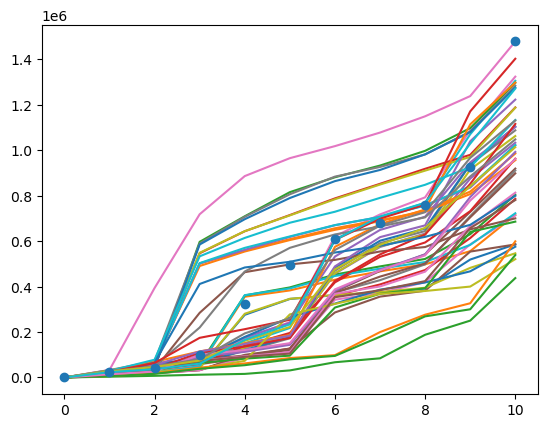

In [43]:
for i in range(50): 
    plt.plot(np.quantile(good_imp_kpcs1[i], np.linspace(0, 1, 11)))
plt.plot(imp_bins, 'o')


### a) Counting number of z_gal < z_SN for each SN

In [10]:
## ignore this first attempt
num_fgals = np.zeros(len(tnew['CID'].data))

for i, cid in enumerate(tnew['CID'].data):
    z_sn = tnew[i]['REDSHIFT_FINAL']
    num_fgal = np.sum(zgals < z_sn)
    num_fgals[i] = num_fgal

### b) Color from SALT:

In [11]:
# FITRES file 
with open('FITOPT/FITOPT005.FITRES','r') as file5_:
    fitres5 = file5_.readlines()
    
for i in range(len(fitres5)): 
    fitres5[i] = fitres5[i].rstrip('\n')

head5 = fitres5[5]
fitres5_ = [fitres5[i].split(' ') for i in range(1, len(fitres5))]
varnames = np.delete(np.copy(fitres5_[4][:-1]), 1)

fitres5 = fitres5_.copy()[6:]
bads = np.where(np.array([len(fitres5[i]) for i in range(len(fitres5))]) != 58)
mask = np.delete(np.arange(len(fitres5)), bads[0])
fitres5_cp = np.array([fitres5[mask[i]] for i in range(len(mask))])
mask = np.delete(np.arange(len(fitres5)), bads[0])
fitres5_cp = np.array([fitres5[mask[i]] for i in range(len(mask))])


In [12]:
fits_1635sn = [1] * 1635

for i, cid in enumerate(cids): 
    ind_init = np.where(fitres5_cp[:, 1].astype(int) == cids[i])[0]
    if len(ind_init) == 0:     # accounting for no models there 
        fits_1635sn[i] = np.full(1, np.nan)
    else: 
        ind = ind_init[0]
        fits_1635sn[i] = fitres5_cp[ind]


In [13]:
inds_all_sn = np.where([fitres5_cp[:, 1].astype(int) == cids[i] for i in range(len(cids))])[1]
inds_all_sn.shape      # not all 1635 color

(1626,)

In [14]:
## getting color for each sn
colors = np.ones(len(tnew['CID'].data)) * np.nan

for i, cid in enumerate(tnew['CID'].data):
    m = np.where(fitres5_cp[:, 1].astype(int) == cid)[0]
    l = len(m)
    if l != 0: 
        ind = m[0]
        c = fitres5_cp[ind][46]
        colors[i] = c

In [15]:
## x1 for each sn
x1s = np.ones(len(tnew['CID'].data)) * np.nan

for i, cid in enumerate(tnew['CID'].data):
    m = np.where(fitres5_cp[:, 1].astype(int) == cid)[0]
    l = len(m)
    if l != 0: 
        ind = m[0]
        x1 = fitres5_cp[ind][44]
        x1s[i] = x1



### c) Graph of # foreground gal vs. SN color

In [10]:
num_fgals = np.loadtxt('new_weighted_num_fgals.txt')
num_fgals

array([165.26, 179.6 , 174.76, ..., 213.24, 281.49, 176.96])

Text(0.5, 1.0, 'weighted # foreground galaxies by impact parameter & magnitude vs. sn color')

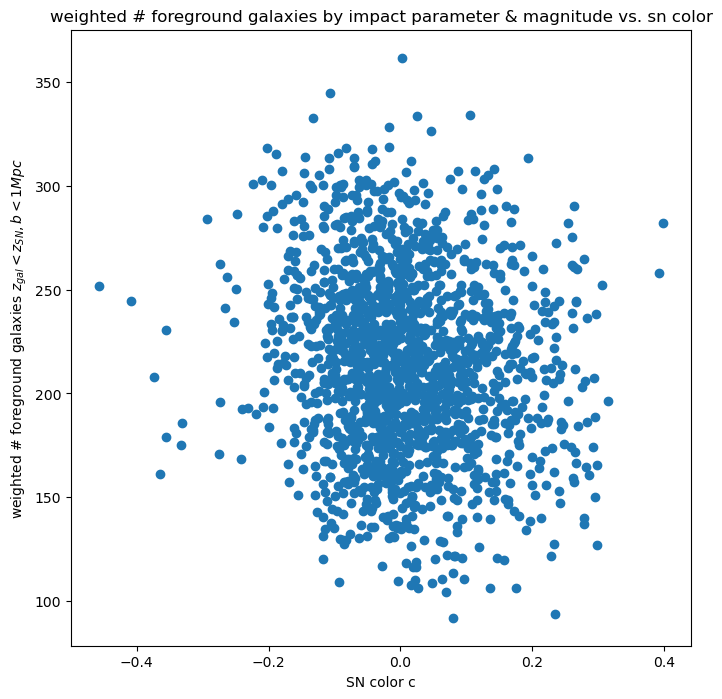

In [14]:
plt.figure(figsize=(8, 8))
plt.scatter(colors, num_fgals)
plt.xlabel('SN color c')
plt.ylabel(r'weighted # foreground galaxies $z_{gal} < z_{SN}, b < 1 Mpc$')
plt.title('weighted # foreground galaxies by impact parameter & magnitude vs. sn color')
# plt.savefig('weighted # foreground galaxies by imp and mag v sn color')

Text(0.5, 1.0, 'weighted # foreground galaxies by impact parameter & magnitude vs. BIASCOR sn color')

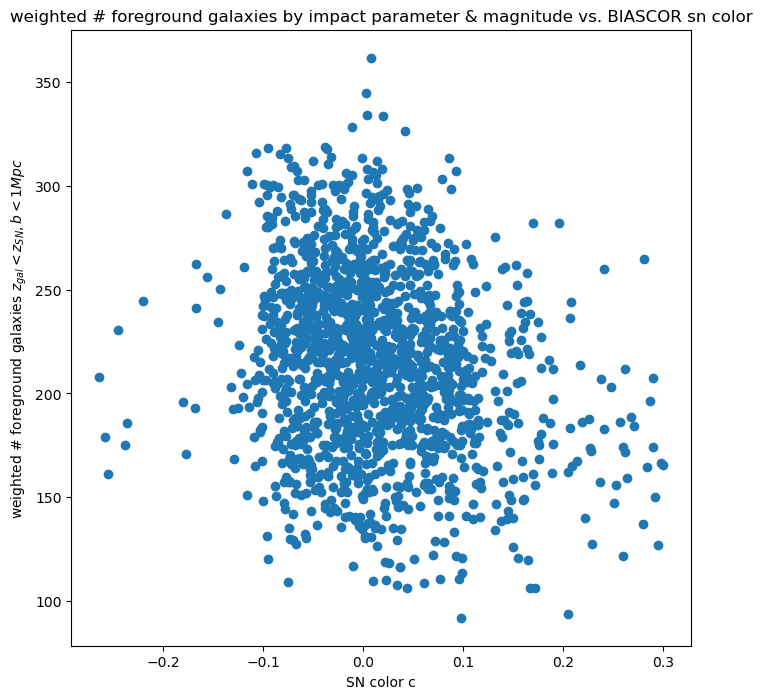

In [44]:
dropped_num_fgals = num_fgals[np.setdiff1d(np.arange(0, 1635, 1), nozmatch)]

plt.figure(figsize=(8, 8))
plt.scatter(biascor_dropped_colors, dropped_num_fgals)
plt.xlabel('SN color c')
plt.ylabel(r'weighted # foreground galaxies $z_{gal} < z_{SN}, b < 1 Mpc$')
plt.title('weighted # foreground galaxies by impact parameter & magnitude vs. BIASCOR sn color')

Text(0, 0.5, 'weighted # foreground galaxies $z_{gal} < z_{SN}, b < 1 Mpc$')

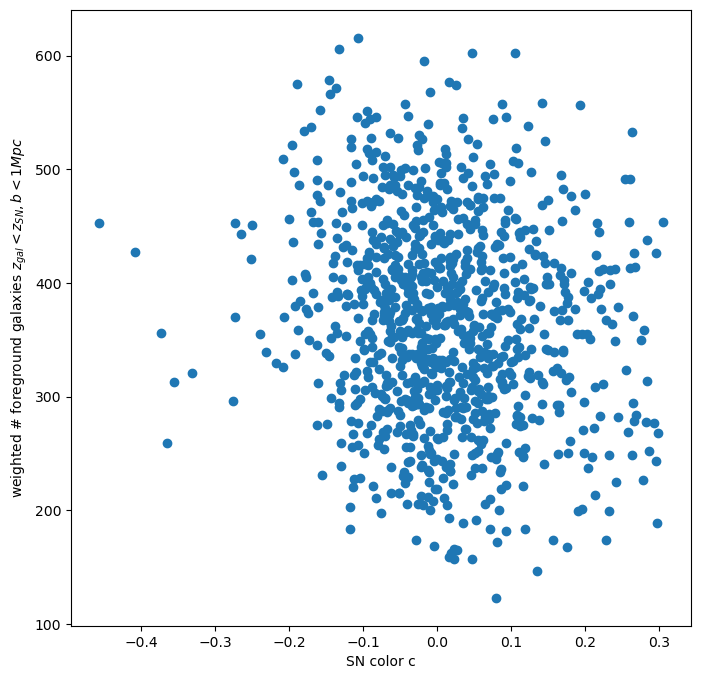

In [54]:
## Revised based on Chunks
plt.figure(figsize=(8, 8))
plt.scatter(colors[:1000], num_fgals[~np.isnan(num_fgals)][:1000])
plt.xlabel('SN color c')
plt.ylabel(r'weighted # foreground galaxies $z_{gal} < z_{SN}, b < 1 Mpc$')

In [13]:
### Revised, weighted number of foreground galaxies and color

imps = pd.read_csv('impact_parameters_test1.csv')
thresh = 1000        # kpc 
num_fgals = np.full(len(tnew['CID'].data), np.nan)

for i in range(len(imps)): 
    close_gal = (0 <= imps.loc[i]) & (imps.loc[i] < thresh)    # boolean mask 
    # close_gal = (0 <= all_imp_kpcs1[i]) & (all_imp_kpcs1[i] < thresh)    # boolean mask 
    
    weights = df['weight'].loc[close_gal]
    num_fgals[i] = np.sum(weights)    
    
plt.figure(figsize=(8, 8))
plt.scatter(colors, num_fgals)
plt.xlabel('SN color c')
plt.ylabel(r'weighted # foreground galaxies $z_{gal} < z_{SN}, b < 1 Mpc$')


KeyboardInterrupt



In [ ]:
plt.figure(figsize=(8, 8))
plt.scatter(colors, num_fgals)
plt.xlabel('SN color c')
plt.ylabel(r'# foreground galaxies $z_{gal} < z_{SN}$')

## 4. Quantitative correlations

#### Run PCA

Text(0.5, 1.0, 'weighted # foreground galaxies by impact parameter & magnitude vs. sn color')

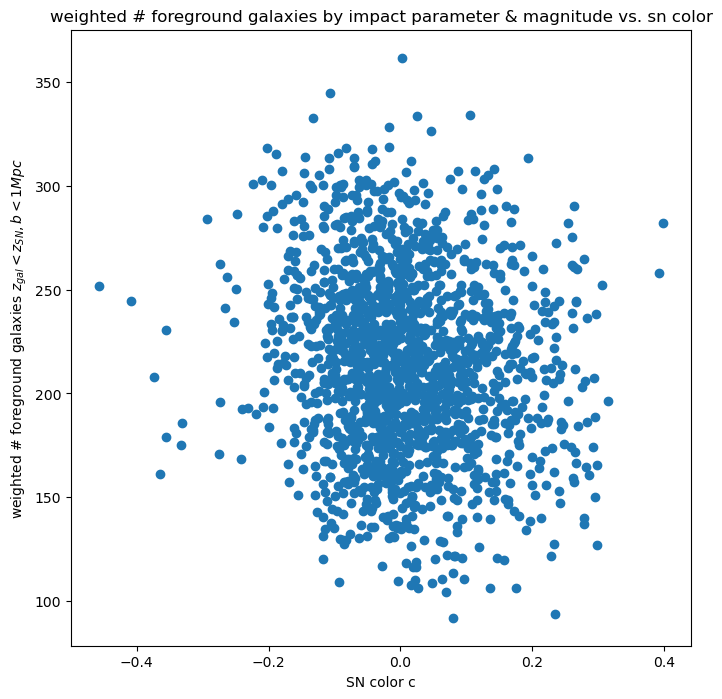

In [23]:
### weighted by impact parameter AND magnitude 
plt.figure(figsize=(8, 8))
plt.scatter(colors, num_fgals)
plt.xlabel('SN color c')
plt.ylabel(r'weighted # foreground galaxies $z_{gal} < z_{SN}, b < 1 Mpc$')
plt.title('weighted # foreground galaxies by impact parameter & magnitude vs. sn color')

In [146]:
colors, num_fgals

(array([-0.13 ,  0.031,  0.109, ..., -0.065, -0.096, -0.081]),
 array([165.26, 179.6 , 174.76, ..., 213.24, 281.49, 176.96]))

In [152]:
num_fgals[~np.isnan(colors)]

array([165.26, 179.6 , 174.76, ..., 213.24, 281.49, 176.96])

In [26]:
arr = np.array(list(zip(colors[~np.isnan(colors)], num_fgals[~np.isnan(colors)]))).T
# cov = np.cov(arr)
# cov
# evals, evecs = np.linalg.eig(cov)
np.corrcoef(arr), np.cov(arr)

(array([[ 1.        , -0.13346971],
        [-0.13346971,  1.        ]]),
 array([[ 1.20088894e-02, -6.46004795e-01],
        [-6.46004795e-01,  1.95075723e+03]]))

In [156]:
arr = np.array(list(zip(colors[~np.isnan(colors)], num_fgals[~np.isnan(colors)]))).T
cov = np.cov(arr)
cov
evals, evecs = np.linalg.eig(cov)

In [160]:
np.linalg.eig(cov)

EigResult(eigenvalues=array([1.179e-02, 1.951e+03]), eigenvectors=array([[-1.000e+00,  3.312e-04],
       [-3.312e-04, -1.000e+00]]))

In [161]:
cov

array([[ 1.201e-02, -6.460e-01],
       [-6.460e-01,  1.951e+03]])

In [58]:
cov

array([[ 1.20088894e-02, -6.46004795e-01],
       [-6.46004795e-01,  1.95075723e+03]])

In [79]:
sl0 = eig_vec1[1] / eig_vec1[0]
# j * sl0

In [90]:

start_point = np.mean(arr, axis=1)
start_point

array([7.96901322e-03, 2.14702989e+02])

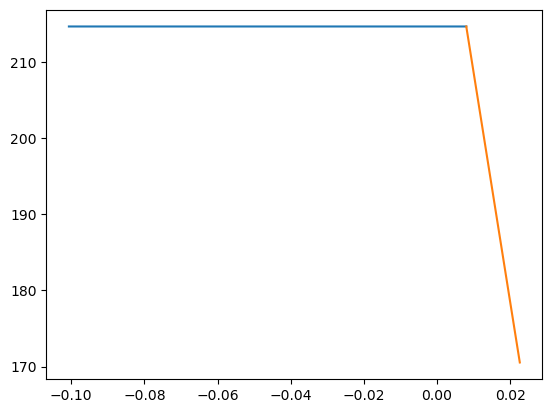

In [91]:

for i in range(len(evecs)):
    eigenvector = evecs[:, i]
    start_point = np.mean(arr, axis=1)
    end_point = start_point + np.sqrt(evals[i]) * eigenvector
    plt.plot([start_point[0], end_point[0]], [start_point[1], end_point[1]], label=f"Eigenvalue {i+1}")


In [181]:
np.set_printoptions(suppress=True, precision=8)


In [182]:
evecs

array([[-0.99999995,  0.00033116],
       [-0.00033116, -0.99999995]])

In [134]:
# formatted_eigenvalues = [f"{val:.3f}" for val in eigenvalues]
[[f"{val:.3f}" for val in vec] for vec in evecs.T]


[['-1.000', '-0.000'], ['0.000', '-1.000']]

In [175]:
{evecs[:, i][0]:.3f

SyntaxError: invalid decimal literal (520579810.py, line 1)

Text(0, 0.5, 'weighted # foreground galaxies $z_{gal} < z_{SN}, b < 1 Mpc$')

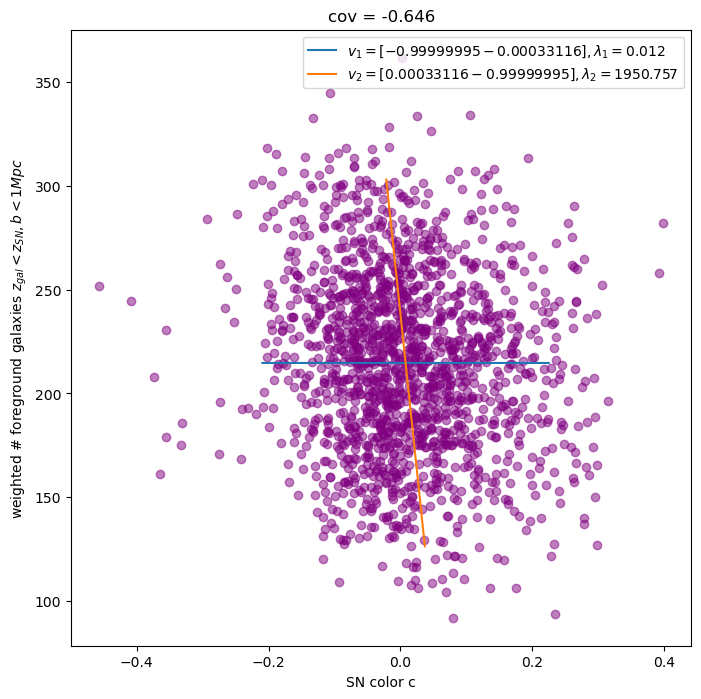

In [191]:
j = np.linspace(colors[~np.isnan(colors)].min(), colors[~np.isnan(colors)].max(), 1000)

plt.figure(figsize=(8, 8))
plt.scatter(colors, num_fgals, color='purple', alpha=0.5)
# plt.plot(j, j*cov[0, 1])
# plt.plot(jevecs[0]
eig_vec1 = evecs[:,0]
eig_vec2 = evecs[:,1]
sl0 = eig_vec1[1] / eig_vec1[0]
# j * sl0
# plt.plot(j, j*sl0)

for i in range(len(evecs)):
    eigenvector = evecs[:, i]
    mid = np.mean(arr, axis=1)
    start_point = mid - 2*np.sqrt(evals[i]) * eigenvector
    end_point = mid + 2*np.sqrt(evals[i]) * eigenvector
    plt.plot([start_point[0], end_point[0]], [start_point[1], end_point[1]], label=f"$v_{i+1} = {evecs[:, i]}, \lambda_{i+1} = {evals[i]:.3f}$")
    # plt.plot([start_point[0], end_point[0]], [start_point[1], end_point[1]], label=f"$\lambda_{i+1} = {evals[i]:.3f}$")

    plt.legend()

# plt.gca().set_aspect('equal')

plt.title(f'cov = {cov[0, 1]:.3f}')
# origin = [0, 0]
# plt.quiver(*origin, *eig_vec1, color=['r'], scale=21)
# plt.quiver(*origin, *eig_vec2, color=['b'], scale=21)
# plt.show()
plt.xlabel('SN color c')
plt.ylabel(r'weighted # foreground galaxies $z_{gal} < z_{SN}, b < 1 Mpc$')
# plt.title('weighted # foreground galaxies by impact parameter & magnitude vs. sn color')

### What about the brightness (instead of colors) of the supernova? 

(Paul Shah cosmology talks DES weak lensing): 
* We expect dust to be a tracer of dark matter (where magnification is bigger), so maybe extinction is also bigger
    * This would show up in the colors of SN
    * We don’t see any correlation between color and our lensing estimator, but we THINK (from some back of the end calculations) that this effect would be too small to detect in our sample. :( 

In [ ]:
### weighted by impact parameter AND magnitude 
plt.figure(figsize=(8, 8))
plt.scatter(colors, num_fgals)
plt.xlabel('SN color c')
plt.ylabel(r'weighted # foreground galaxies $z_{gal} < z_{SN}, b < 1 Mpc$')
plt.title('weighted # foreground galaxies by impact parameter & magnitude vs. sn color')
# plt.savefig('weighted # foreground galaxies by imp and mag v sn color')

## September: Re-Weighting & Statistics

In [ ]:
weighting - be more realistic? 
* the brightness is fine, linear like 0 to 1
* impact parameter (projection) is definitely NOT linear though…
    * Hi distribution of milky way?
        * neutral hydrogen probably traces dust
        * https://ui.adsabs.harvard.edu/abs/2009ARA%26A..47...27K/abstract
        * but beyond 40 kpc not any data, also no function for this only graph 
* correlation is weird and is definitely statistically significant, why? what are we seeing? 

0’s in the impact parameter (EXACTLY 0.0) 
* -> this might be if 1) the galaxy is directly in the los of the sn or 2) if it’s the HOST galaxy. 
    * how do we differentiate between the two? 

steps
1. statistics
* histogram/measure color distribution (x axis) 
* measure y axis distirbution
* see if both gaussians
    * if it is, simulate the same number of points from a bivariate gaussian with no covariance (elliptical) 
    * some statistic that compares that ^ with this distribution
    * KS test, https://github.com/syrte/ndtest
    * F test 
2. we want integrated column density INSTEAD of distance for the impact parameter
* = integral along the line of sight of (n_H dl) (cm -2) = column density 

(joy idea) - maybe split into redshift buckets?
* magnification is diff for each bucket (paul shah) 

* intrinsic diversity / statistics of sn are 10x bigger than magnification we’re trying to detect
    * maybe same deal for dust? 

— 
* Re-weight the projected impact parameter not by distance but by integrated column density
* See if more accurate tracer of dust such as Hi, whose distribution is not linear with scale / radius 
* Separate the contribution of the host galaxy from intergalactic dust / foreground galaxies
* Statistically significant ? 

In [ ]:
2. we want integrated column density INSTEAD of distance for the impact parameter
* = integral along the line of sight of (n_H dl) (cm -2) = column density 


In [ ]:
## maybe instead of writing, just split it up? 

# z, ra, dec of all galaxies
gal_ztrue = df['ZTRUE'].values
gal_ra = df['RA_GAL'].values * u.deg
gal_dec = df['DEC_GAL'].values * u.deg

# angular diameter distances of all galaxies
gal_angdist_all = cosmo.angular_diameter_distance(gal_ztrue)

# initialize master impact parameter arrays : note i used zeros because otherwise my memory dies, but if more memory then should use nan 
# all_imp_kpcs1 = np.zeros((len(tnew['CID'].data), len(df)))
# all_imp_kpcs2 = np.zeros((len(tnew['CID'].data), len(df)))
# all_weights_imp = np.zeros((len(tnew['CID'].data), len(df)))

# good_imp_kpcs1 = []

thresh = 1000        # kpc 
num_fgals = np.full(len(tnew['CID'].data), np.nan)

close_imp_bins = np.load('imp_bins_first500_close.npy')  # these are for within the 0 and threshold distance for impact parameters. 

# def process_chunk(start_idx, end_idx, file_imp, file_num):   # make this self contained 
def process_chunk(start_idx, end_idx):
    
    # local all impact_kpcs1, save to an individual file  
    all_imp_kpcs1_internal = np.zeros((len(tnew['CID'].data), len(df)))    # still initalize with all len; unfilled consequence 0's = gal not looked at in chunk
    ## ^ prob actually don't even need the length of supernova if ^ you put it inside loop 
    #     all_imp_kpcs2_internal = np.zeros((len(tnew['CID'].data), len(df)))

    # num_fgals_internal = np.full(len(tnew['CID'].data), np.nan)     # local number, write to file 

    for i in tqdm(range(start_idx, end_idx), total=end_idx - start_idx):
        cid = tnew['CID'].data[i]
        z_sn = tnew[i]['REDSHIFT_FINAL']
        ra_sn = tnew[i]['RA'] * u.deg
        dec_sn = tnew[i]['DEC'] * u.deg

        sn_angdist = cosmo.angular_diameter_distance(z_sn)       # actually not needed
        sn_coord = SkyCoord(ra=ra_sn, dec=dec_sn, distance=sn_angdist)

        mask = df['ZTRUE'] <= z_sn
        gal_coords = SkyCoord(ra=gal_ra[mask], dec=gal_dec[mask], distance=gal_angdist_all[mask])

        thetas = sn_coord.separation(gal_coords).radian

        # 1st way (d = r*theta)
        imp_kpc_1 = (thetas * gal_angdist_all[mask].to(u.kpc)).value
        # good_imp_kpcs1.append(imp_kpc_1)

        # 1) make all 0's = -1, then get rid of all of them that are 0
        imp_kpc_1[imp_kpc_1 == 0] = -1
        # all_imp_kpcs1[i, mask] = imp_kpc_1             # global 
        all_imp_kpcs1_internal[i, mask] = imp_kpc_1    # local 

        # 2) then replace the -1 with the *CORRECT* 0 kpc values.
        # all_imp_kpcs1[i][all_imp_kpcs1[i] == 0] = -100
        # all_imp_kpcs1[i][all_imp_kpcs1[i] == -1] = 0
        all_imp_kpcs1_internal[i][all_imp_kpcs1_internal[i] == 0] = -100
        all_imp_kpcs1_internal[i][all_imp_kpcs1_internal[i] == -1] = 0

        # Save to file while doing this so it doesn't completely crash
        np.save(f'/pscratch/sd/j/joygong/Dust/ImParams/all_imp_kpcs1_SN_{i}', all_imp_kpcs1_internal[i])
                
        # with open(f'{file_imp}', 'a', newline='') as f:
        #     writer = csv.writer(f)
        #     # writer.writerow(all_imp_kpcs1[i])
        #     writer.writerow(all_imp_kpcs1_internal[i])

        # Get griz magnitudes, using all_imp_kpcs1[i]
        # close_gal = (0 <= all_imp_kpcs1[i]) & (all_imp_kpcs1[i] < thresh)
        close_gal = (0 <= all_imp_kpcs1_internal[i]) & (all_imp_kpcs1_internal[i] < thresh) 
        # why would it ever be 0? confused -> maybe ignore these (or investigate!!!) 
        
        np.save(f'/pscratch/sd/j/joygong/Dust/CloseGal/close_gals_SN_{i}', close_gal)   #, overwrite='True')
        
        weights_mag = df['weight'].loc[close_gal]
        
        # Get weights of impact paramters of each each CLOSE galaxy 
        # inds_imp = np.digitize(all_imp_kpcs1[i][close_gal], close_imp_bins)
        inds_imp = np.digitize(all_imp_kpcs1_internal[i][close_gal], close_imp_bins)
        weights_imp = (11 - inds_imp) * 0.1

        ## calculate sum of multiplied weights to get num_fgals per SN 
        total_weights = weights_imp * weights_mag
        num_fgals[i] = np.sum(total_weights) 

        # weight by impact parameter and write to file BEFORE calculating number of galaxies

        with open(f'new_weighted_num_fgals.txt', 'a', newline='') as f:
            f.write(str(num_fgals[i]) + ' ')
            


## 0: Why is the impact parameter 0.0? 
* redshift of those galaxies is 0.0, so angular distance becomes 0. 
* can we find the ra, dec of hosts compared to sn? objids don't seem to line up.
    * did a manual check on the ra, dec of hosts and sn & they do line up! 

In [62]:
close_imp_bins = np.load('imp_bins_first500_close.npy')
close_imp_bins

array([6.26178390e-02, 1.53688577e+02, 3.26713411e+02, 4.47555210e+02,
       5.52027592e+02, 6.40500636e+02, 7.21030777e+02, 7.96474727e+02,
       8.67585988e+02, 9.35541903e+02, 9.99999405e+02])

In [63]:
thresh = 1000  
test_imps = np.load('ImParams/all_imp_kpcs1_SN_402.npy')
test_closegal = np.load('CloseGal/close_gals_SN_402.npy')
(0 <= test_imps) & (test_imps < thresh) 
(0 < test_imps) & (test_imps < thresh) 

array([False, False, False, ..., False, False, False])

In [197]:
tnew[402]['HOSTGAL_OBJID']

25396

In [219]:
# to get matching
cond1 = np.isclose(df['RA_GAL'].values, tnew[402]['HOSTGAL_RA'], atol=0.00001)
cond2 = np.isclose(df['DEC_GAL'].values, tnew[402]['HOSTGAL_DEC'], atol=0.00001)
np.intersect1d(np.where(cond1 == True), np.where(cond2 == True))
df.loc[374608]

Unnamed: 0            374608
GALID             4300944406
RA_GAL             52.973347
DEC_GAL           -28.748032
ZTRUE                0.59567
ZERR                   0.001
g_obs              24.076847
r_obs              23.185378
i_obs              22.847243
z_obs              22.830313
a0_Sersic           0.787038
b0_Sersic           0.253416
n0_Sersic           4.182656
a_rot              -87.15763
LOGMASS             9.195914
LOG_SFR             0.412795
a_DLR               0.810409
b_DLR               0.645278
DLR_area            0.522939
Sersic_area         0.199448
g_obs_auto         24.255228
r_obs_auto         23.409823
i_obs_auto         23.034866
z_obs_auto           22.9724
obs_gr              0.891469
NBR_LIST       374735,374533
LOGSFR_TRUE         0.412795
griz               92.939781
weight                   0.9
Name: 374608, dtype: object

In [196]:
tnew[402]['RA'], tnew[402]['DEC'], tnew[402]['HOSTGAL_RA'], tnew[402]['HOSTGAL_DEC']

(52.97329, -28.748177, 52.973439, -28.748032)

In [226]:
tnew[402]['REDSHIFT_FINAL']

0.595058

In [224]:
df.iloc[374608]

Unnamed: 0            374608
GALID             4300944406
RA_GAL             52.973347
DEC_GAL           -28.748032
ZTRUE                0.59567
ZERR                   0.001
g_obs              24.076847
r_obs              23.185378
i_obs              22.847243
z_obs              22.830313
a0_Sersic           0.787038
b0_Sersic           0.253416
n0_Sersic           4.182656
a_rot              -87.15763
LOGMASS             9.195914
LOG_SFR             0.412795
a_DLR               0.810409
b_DLR               0.645278
DLR_area            0.522939
Sersic_area         0.199448
g_obs_auto         24.255228
r_obs_auto         23.409823
i_obs_auto         23.034866
z_obs_auto           22.9724
obs_gr              0.891469
NBR_LIST       374735,374533
LOGSFR_TRUE         0.412795
griz               92.939781
weight                   0.9
Name: 374608, dtype: object

In [ ]:
i = 402
z_sn = tnew[i]['REDSHIFT_FINAL']
ra_sn = tnew[i]['RA'] * u.deg
dec_sn = tnew[i]['DEC'] * u.deg

sn_angdist = cosmo.angular_diameter_distance(z_sn)       # actually not needed
sn_coord = SkyCoord(ra=ra_sn, dec=dec_sn, distance=sn_angdist)

mask = df['ZTRUE'] <= z_sn
gal_coords = SkyCoord(ra=gal_ra[mask], dec=gal_dec[mask], distance=gal_angdist_all[mask])

thetas = sn_coord.separation(gal_coords).radian

# 1st way (d = r*theta)
imp_kpc_1 = (thetas * gal_angdist_all[mask].to(u.kpc)).value


In [240]:
gc = SkyCoord(ra=gal_ra[15425], dec=gal_dec[15425], distance=gal_angdist_all[15425])
ts = sn_coord.separation(gc).radian
ts * gal_angdist_all[15425].to(u.kpc).value
# 2nd way atill yields 0.0:     # imp_kpc_2 = gal_angdist_all[mask].to(u.kpc) * np.sin(thetas)


0.0

In [223]:
test_imps[374608]   # exactly 0.0 (so i set to be negative...)
# test_closegal

-100.0

In [68]:
test_closegal2 = (0 < test_imps) & (test_imps < thresh) 

weights_mag = df['weight'].loc[test_closegal2]


inds_imptest = np.digitize(test_imps[test_closegal2], close_imp_bins)
weights_imptest = (11 - inds_imptest) * 0.1

## calculate sum of multiplied weights to get num_fgals per SN 
total_weightstest = weights_imptest * weights_mag
np.sum(total_weightstest) 

177.46

In [97]:
tnew[402]['RA'], tnew[402]['DEC']

(52.97329, -28.748177)

In [93]:
df.iloc[np.where(test_imps == 0)]

,Unnamed: 0,GALID,RA_GAL,DEC_GAL,ZTRUE,ZERR,g_obs,r_obs,i_obs,z_obs,...,Sersic_area,g_obs_auto,r_obs_auto,i_obs_auto,z_obs_auto,obs_gr,NBR_LIST,LOGSFR_TRUE,griz,weight
9636,9636,4300024070,53.008206,-27.902666,0.0,0.001,20.310504,19.137324,19.214407,19.453966,...,0.021719,21.886285,21.439565,21.389505,21.359590,1.173180,"9346,9416,9210",1.331333,78.116201,1.0
15425,15425,4300038868,53.023254,-27.777752,0.0,0.001,22.864724,23.137214,21.888198,21.667358,...,0.545557,26.064047,24.618490,23.856806,23.809938,-0.272490,"15259,15236",1.433584,89.557494,1.0
198599,198599,4300503837,53.007449,-27.738007,0.0,0.001,22.831386,21.490086,20.375297,19.949617,...,0.000709,24.023305,22.683281,21.537738,21.030042,1.341300,"198463,198597",1.965477,84.646386,1.0
478669,478669,4301209482,53.185074,-27.956800,0.0,0.001,23.434720,22.569740,21.970322,21.450131,...,0.149724,25.449550,24.287347,23.349204,23.032971,0.864980,-1,1.818456,89.424913,1.0
559077,559077,2300162835,36.422979,-4.808334,0.0,0.001,22.422495,21.774721,21.495284,21.304711,...,0.084733,22.907341,22.252621,21.906140,21.691134,0.647774,"559199,559032,559174,558978,559001,558995,559162",0.793538,86.997211,1.0
703135,703135,2300491331,36.530624,-4.330487,0.0,0.001,25.426276,24.161399,24.918792,24.249455,...,0.203365,25.847916,25.597881,25.340142,25.005155,1.264877,"703226,703147,703192,703134,703201,703214,7030...",3.395953,98.755922,0.4
757775,757775,2300622763,36.504719,-5.020115,0.0,0.001,25.000677,24.685170,24.044028,23.104835,...,0.001422,25.615771,25.207407,24.614379,24.986149,0.315507,"757895,757770,757668,757670,757904",3.429293,96.834710,0.6
870447,870447,2300874183,36.473677,-4.484332,0.0,0.001,24.320176,24.035583,23.723224,23.338653,...,0.059833,24.727631,24.619409,24.091136,23.827391,0.284593,"870456,870548,870658,870409,870481,870476,8705...",1.556623,95.417636,0.7
880630,880630,2300896527,36.637959,-4.112335,-0.0,0.001,18.422459,17.694135,17.463956,17.480613,...,0.033720,19.748865,19.304467,18.998469,19.061609,0.728324,-1,1.771330,71.061163,1.0
914887,914887,2300975651,35.973871,-4.747283,-0.0,0.001,19.335838,19.124593,18.088749,19.437161,...,1.917992,20.031558,19.285150,19.131956,19.541599,0.211245,"914766,914755,914558",1.528409,75.986341,1.0


4179389

In [37]:
np.where((0 <= test_imps) & (test_imps < thresh) != (0 < test_imps) & (test_imps < thresh))

(array([   9636,   15425,  198599,  478669,  559077,  703135,  757775,
         870447,  880630,  914887,  961396, 1975165, 2255832, 2355795,
        2461317, 2528652, 2923153]),)

In [65]:
np.loadtxt('new_weighted_num_fgals.txt')[402]

194.29000000000002

In [98]:
gal_ztrue = df['ZTRUE'].values
gal_ra = df['RA_GAL'].valuaes * u.deg
gal_dec = df['DEC_GAL'].values * u.deg

# angular diameter distances of all galaxies
gal_angdist_all = cosmo.angular_diameter_distance(gal_ztrue)


In [110]:
df[df['ZTRUE'] == 0]

,Unnamed: 0,GALID,RA_GAL,DEC_GAL,ZTRUE,ZERR,g_obs,r_obs,i_obs,z_obs,...,Sersic_area,g_obs_auto,r_obs_auto,i_obs_auto,z_obs_auto,obs_gr,NBR_LIST,LOGSFR_TRUE,griz,weight
9636,9636,4300024070,53.008206,-27.902666,0.0,0.001,20.310504,19.137324,19.214407,19.453966,...,0.021719,21.886285,21.439565,21.389505,21.359590,1.173180,"9346,9416,9210",1.331333,78.116201,1.0
15425,15425,4300038868,53.023254,-27.777752,0.0,0.001,22.864724,23.137214,21.888198,21.667358,...,0.545557,26.064047,24.618490,23.856806,23.809938,-0.272490,"15259,15236",1.433584,89.557494,1.0
198599,198599,4300503837,53.007449,-27.738007,0.0,0.001,22.831386,21.490086,20.375297,19.949617,...,0.000709,24.023305,22.683281,21.537738,21.030042,1.341300,"198463,198597",1.965477,84.646386,1.0
478669,478669,4301209482,53.185074,-27.956800,0.0,0.001,23.434720,22.569740,21.970322,21.450131,...,0.149724,25.449550,24.287347,23.349204,23.032971,0.864980,-1,1.818456,89.424913,1.0
559077,559077,2300162835,36.422979,-4.808334,0.0,0.001,22.422495,21.774721,21.495284,21.304711,...,0.084733,22.907341,22.252621,21.906140,21.691134,0.647774,"559199,559032,559174,558978,559001,558995,559162",0.793538,86.997211,1.0
703135,703135,2300491331,36.530624,-4.330487,0.0,0.001,25.426276,24.161399,24.918792,24.249455,...,0.203365,25.847916,25.597881,25.340142,25.005155,1.264877,"703226,703147,703192,703134,703201,703214,7030...",3.395953,98.755922,0.4
757775,757775,2300622763,36.504719,-5.020115,0.0,0.001,25.000677,24.685170,24.044028,23.104835,...,0.001422,25.615771,25.207407,24.614379,24.986149,0.315507,"757895,757770,757668,757670,757904",3.429293,96.834710,0.6
870447,870447,2300874183,36.473677,-4.484332,0.0,0.001,24.320176,24.035583,23.723224,23.338653,...,0.059833,24.727631,24.619409,24.091136,23.827391,0.284593,"870456,870548,870658,870409,870481,870476,8705...",1.556623,95.417636,0.7
880630,880630,2300896527,36.637959,-4.112335,-0.0,0.001,18.422459,17.694135,17.463956,17.480613,...,0.033720,19.748865,19.304467,18.998469,19.061609,0.728324,-1,1.771330,71.061163,1.0
914887,914887,2300975651,35.973871,-4.747283,-0.0,0.001,19.335838,19.124593,18.088749,19.437161,...,1.917992,20.031558,19.285150,19.131956,19.541599,0.211245,"914766,914755,914558",1.528409,75.986341,1.0


In [105]:
df.iloc[np.where(gal_angdist_all == 0)]

,Unnamed: 0,GALID,RA_GAL,DEC_GAL,ZTRUE,ZERR,g_obs,r_obs,i_obs,z_obs,...,Sersic_area,g_obs_auto,r_obs_auto,i_obs_auto,z_obs_auto,obs_gr,NBR_LIST,LOGSFR_TRUE,griz,weight
9636,9636,4300024070,53.008206,-27.902666,0.0,0.001,20.310504,19.137324,19.214407,19.453966,...,0.021719,21.886285,21.439565,21.389505,21.359590,1.173180,"9346,9416,9210",1.331333,78.116201,1.0
15425,15425,4300038868,53.023254,-27.777752,0.0,0.001,22.864724,23.137214,21.888198,21.667358,...,0.545557,26.064047,24.618490,23.856806,23.809938,-0.272490,"15259,15236",1.433584,89.557494,1.0
198599,198599,4300503837,53.007449,-27.738007,0.0,0.001,22.831386,21.490086,20.375297,19.949617,...,0.000709,24.023305,22.683281,21.537738,21.030042,1.341300,"198463,198597",1.965477,84.646386,1.0
478669,478669,4301209482,53.185074,-27.956800,0.0,0.001,23.434720,22.569740,21.970322,21.450131,...,0.149724,25.449550,24.287347,23.349204,23.032971,0.864980,-1,1.818456,89.424913,1.0
559077,559077,2300162835,36.422979,-4.808334,0.0,0.001,22.422495,21.774721,21.495284,21.304711,...,0.084733,22.907341,22.252621,21.906140,21.691134,0.647774,"559199,559032,559174,558978,559001,558995,559162",0.793538,86.997211,1.0
703135,703135,2300491331,36.530624,-4.330487,0.0,0.001,25.426276,24.161399,24.918792,24.249455,...,0.203365,25.847916,25.597881,25.340142,25.005155,1.264877,"703226,703147,703192,703134,703201,703214,7030...",3.395953,98.755922,0.4
757775,757775,2300622763,36.504719,-5.020115,0.0,0.001,25.000677,24.685170,24.044028,23.104835,...,0.001422,25.615771,25.207407,24.614379,24.986149,0.315507,"757895,757770,757668,757670,757904",3.429293,96.834710,0.6
870447,870447,2300874183,36.473677,-4.484332,0.0,0.001,24.320176,24.035583,23.723224,23.338653,...,0.059833,24.727631,24.619409,24.091136,23.827391,0.284593,"870456,870548,870658,870409,870481,870476,8705...",1.556623,95.417636,0.7
880630,880630,2300896527,36.637959,-4.112335,-0.0,0.001,18.422459,17.694135,17.463956,17.480613,...,0.033720,19.748865,19.304467,18.998469,19.061609,0.728324,-1,1.771330,71.061163,1.0
914887,914887,2300975651,35.973871,-4.747283,-0.0,0.001,19.335838,19.124593,18.088749,19.437161,...,1.917992,20.031558,19.285150,19.131956,19.541599,0.211245,"914766,914755,914558",1.528409,75.986341,1.0


### Compute column density (= integrated number density n_H dl) with values as in H1 review paper



In [11]:
all_bs = []

chunk_size = 500
# for i in range(4): 
for j in range(500):    # maybe randomize -> so like 100 spaced in 1635 ish 
    a = np.load(f'/pscratch/sd/j/joygong/Dust/ImParams/all_imp_kpcs1_SN_{i=j}.npy')
    all_bs.append(a[a >= 0])


In [ ]:
for i in range(500, 1000):    # maybe randomize -> so like 100 spaced in 1635 ish 
    a = np.load(f'/pscratch/sd/j/joygong/Dust/ImParams/all_imp_kpcs1_SN_{i}.npy')
    all_bs.append(a[a >= 0])
    


In [48]:
len(all_bs)

500

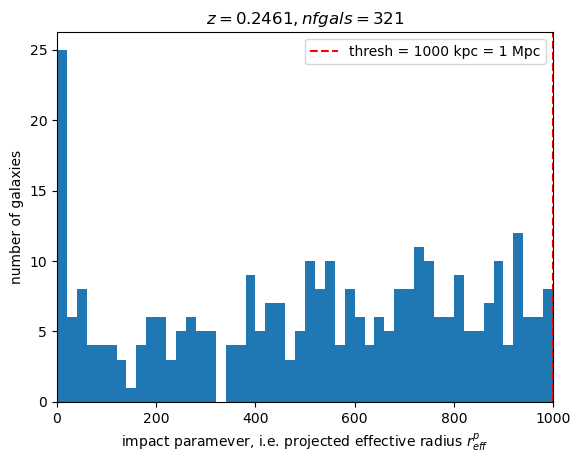

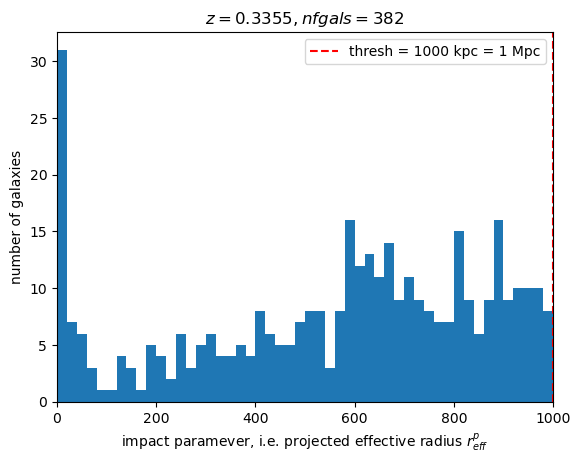

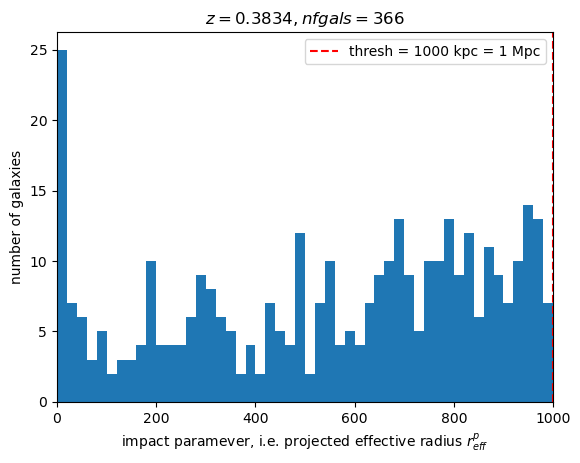

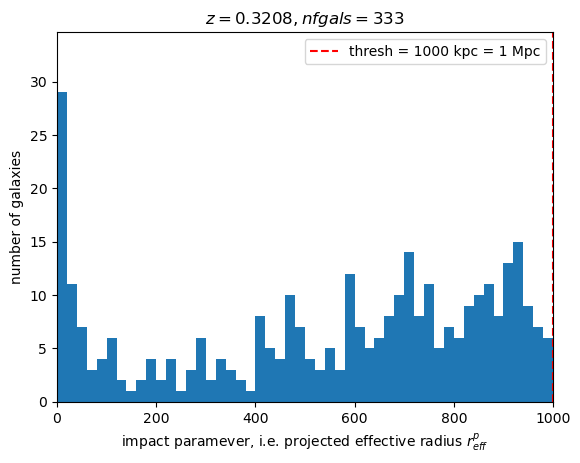

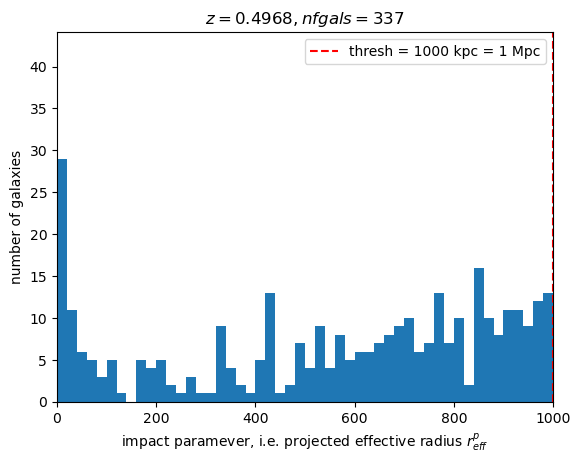

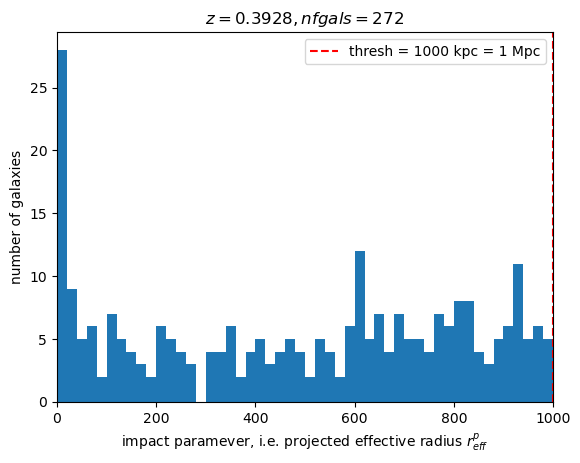

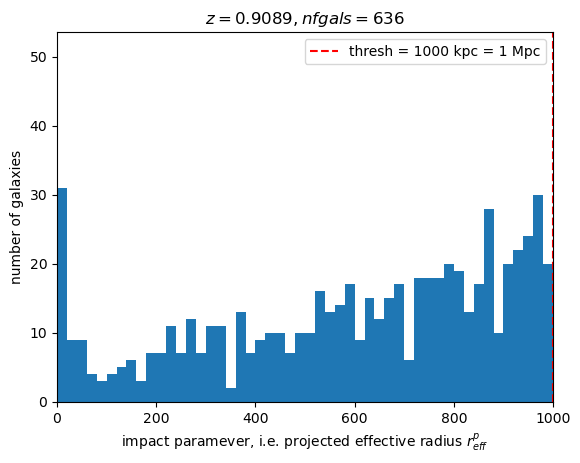

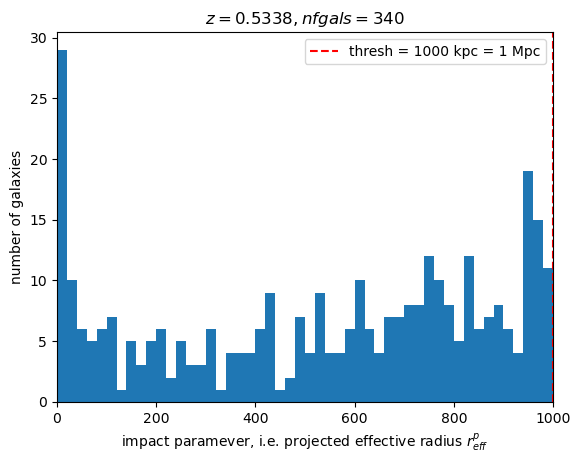

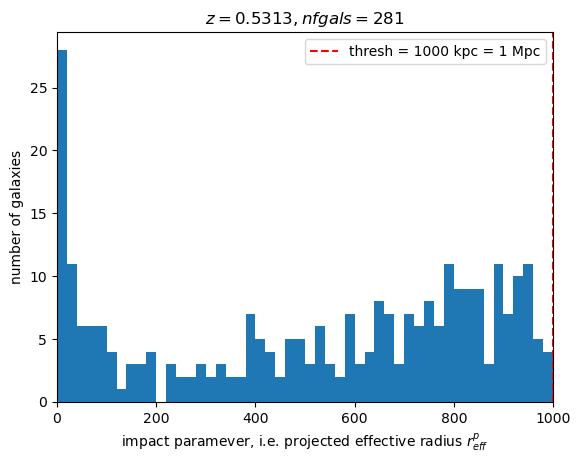

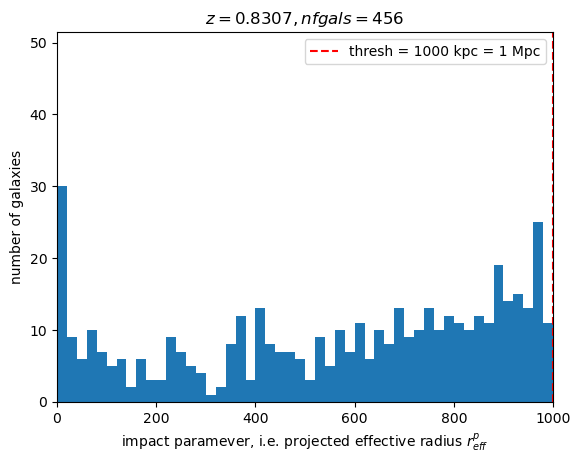

In [55]:
for i in range(10):
    plt.figure(i)
    j, c, k = plt.hist(all_bs[i], 100, range=(0, 2000))
    thresh = 1000
    cond = (0 <= all_bs[i]) & (all_bs[i] < thresh) 
    nfgals = len(all_bs[i][cond])
    
    plt.title(f"$z = {tnew[i]['REDSHIFT_FINAL']:.4f}, nfgals = {nfgals}$")
    plt.axvline(thresh, ls='--', color='red', label='thresh = 1000 kpc = 1 Mpc') 
    plt.xlabel(r'impact paramever, i.e. projected effective radius $r_{eff}^p$') 
    plt.ylabel('number of galaxies')
    plt.xlim([0, 1000])
    plt.legend()
    

In [45]:
# np.loadtxt('impact_parameters.txt', delimiter=',').shape
# pd.read_csv('impact_parameters.csv')
# pd.read_csv('impact_parameters_test1.csv')

In [ ]:
## ALL B'S for ALL supernovae  

In [64]:
# 17 gals with ztrue = 0. 
# np.where(imp_kpc_2 == 0)[0]
# np.where(df['ZTRUE'].values == 0)[0].shape 

array([  239,   393,  4028,  9274, 10886, 13788, 14961, 17316, 17561,
       18201, 19160, 46427, 54411, 57299, 60347, 62514, 73168])

In [ ]:
### 0) plot distribution of b’s currently = 1635 * ~100s foreground gals
# 1. define linspace of vals = (0, 2x, 1000000) where x = hypotenuse of right triangle w sides b & 1000 kpc (1 mpc) 
    # * note: need to recompute the projected r_eff^p (to be linear with right triangle INSTEAD of ARCLENGTH! * 
    

# 2. calc R @ each dl value (i.e. point in that linspace^) 
# 3. calc n_H @ each R value (exp fit)
# 4. integrate! -> i.e. plot on graph n_H vs. R (like in figure?), find area under curve 

# NOTE: we don’t account for halos of any bkg gal, even if halo would be in foreground? 
# (not sure about this conceptually) - (selection bias??) 


In [91]:
# 1. define linspace of vals = (0, 2x, 1000000) where x = hypotenuse of right triangle w sides b & 1000 kpc (1 mpc) 
    # * note: need to recompute the projected r_eff^p (to be linear with right triangle INSTEAD of ARCLENGTH! * 
    
# z, ra, dec of all galaxies
gal_ztrue = df['ZTRUE'].values
gal_ra = df['RA_GAL'].values * u.deg
gal_dec = df['DEC_GAL'].values * u.deg

# angular diameter distances of all galaxies
gal_angdist_all = cosmo.angular_diameter_distance(gal_ztrue)

thresh = 1000        # kpc 
num_fgals = np.full(len(tnew['CID'].data), np.nan)

close_imp_bins = np.load('imp_bins_first500_close.npy')  

def process_chunk(start_idx, end_idx):
    
    all_imp_kpcs2_internal = np.zeros((len(tnew['CID'].data), len(df)))   
    
    for i in tqdm(range(start_idx, end_idx), total=end_idx - start_idx):
        cid = tnew['CID'].data[i]
        z_sn = tnew[i]['REDSHIFT_FINAL']
        ra_sn = tnew[i]['RA'] * u.deg
        dec_sn = tnew[i]['DEC'] * u.deg

        sn_angdist = cosmo.angular_diameter_distance(z_sn)       # actually not needed
        sn_coord = SkyCoord(ra=ra_sn, dec=dec_sn, distance=sn_angdist)

        mask = df['ZTRUE'] <= z_sn
        gal_coords = SkyCoord(ra=gal_ra[mask], dec=gal_dec[mask], distance=gal_angdist_all[mask])

        thetas = sn_coord.separation(gal_coords).radian
        
        #### 2nd way of projection (right triangle, 2D geometry) -- gives smaller values of impact parameter
        imp_kpc_2 = (gal_angdist_all[mask].to(u.kpc) * np.sin(thetas)).value
        imp_kpc_2[imp_kpc_2 == 0] = -1 
        all_imp_kpcs2_internal[i, mask] = imp_kpc_2   

        # then replace the -1 with the *CORRECT* 0 kpc values.
        all_imp_kpcs2_internal[i][all_imp_kpcs2_internal[i] == 0] = -100   # this is BACKGROUND GALAXIES (which aren't counted)  
        all_imp_kpcs2_internal[i][all_imp_kpcs2_internal[i] == -1] = 0     # now, account for the gals that actually have a b of 0

        # Save to file while doing this so it doesn't completely crash
        np.save(f'/pscratch/sd/j/joygong/Dust/ImParams_RT/all_imp_kpcs2_SN_{i}', all_imp_kpcs2_internal[i])
    
        # Get indexes of close galaxies for weighting purposes later. 
        close_gal = (0 <= all_imp_kpcs2_internal[i]) & (all_imp_kpcs2_internal[i] < thresh) 
        np.save(f'/pscratch/sd/j/joygong/Dust/CloseGal_RT/close_gals_SN_{i}', close_gal)   #, overwrite='True')
        
        ### Can calculate, but for our purposes will do later after writing those functions. ### 
#         weights_mag = df['weight'].loc[close_gal]
        
#         # Get weights of impact paramEters of each each CLOSE galaxy 
#         inds_imp = np.digitize(all_imp_kpcs2_internal[i][close_gal], close_imp_bins)
#         weights_imp = (11 - inds_imp) * 0.1

#         ## calculate sum of multiplied weights to get num_fgals per SN 
#         total_weights = weights_imp * weights_mag
#         num_fgals[i] = np.sum(total_weights) 

#         # weight by impact parameter and write to file BEFORE calculating number of galaxies

#         with open(f'new_weighted_num_fgals.txt', 'a', newline='') as f:
#             f.write(str(num_fgals[i]) + ' ')
            

In [97]:
## run just to see what the range of impact parameters is in order for weighting.
chunk_size = 500 
num_chunks = int(np.ceil(len(tnew['CID'].data) / chunk_size)) 

for chunk in range(3, 4):     
    start_idx = chunk * chunk_size 
    end_idx = min((chunk + 1) * chunk_size, len(tnew['CID'].data))  
    process_chunk(start_idx, end_idx)
    
    print(f'Done with chunk {chunk}!') 


100%|██████████| 135/135 [00:33<00:00,  4.06it/s]

Done with chunk 3!


In [110]:
dl = 0.001       # in kpc 
# most accurate way ^ which actually doesn't matter since it's continuous: 
bs_all = np.load('ImParams_RT/all_imp_kpcs2_SN_398.npy')          

cond = (0 <= bs_all) & (bs_all < thresh) 
bs = bs_all[cond]             # projected radius of galaxy to los, r_eff^p, for b < thresh

dls_halfmax = np.sqrt(1000**2 - bs**2)       # full length of dl range = 2*this. 

# FOR EACH GALAXY [ELEMENT IN DLS_HALFMAX], 
    # calculate an array of rs which are the hypotenuse of the triangle with sides b and dl*i where i E [0.001, dls_halfmax]
    
    
rs = np.sqrt(bs**2 + 

# r = np.sqrt(b**2 + (dl*i)**2)  
    

array([1000.        ,  568.17451586,  695.30301243, 1000.        ,
        876.94770373,  619.48757367,  467.26131956,  159.39052175,
        741.83254194,  999.98231378,  652.76102119,  750.99591102,
        279.44606119,  275.46020363,  761.34038756,  261.61968165,
        512.72648483,  999.95524636,  738.11391568, 1000.        ,
        213.10614242,  135.71308234,  599.02203032,  168.5557171 ,
        872.78213593,  499.99874549,  776.65573106,  776.77909066,
        843.23202927,  401.26413178,  820.0199468 ,  927.15130139,
        655.33353396,  286.56082069,  889.59117412,  999.96716363,
        994.13171646,  999.38493617,  605.02968428,  550.54158376,
        108.74658133,  999.78409457,  999.93082437,  999.85318403,
        843.44867505,  965.97516519,  999.99970387,  999.99205924,
        698.35434544,  999.99203663,  999.97161347,  999.85630834,
        999.45558804,  999.89728474,  831.1963695 , 1000.        ,
        988.06149492,  430.57077264,  785.26517381,  792.97065

### test to see what's going on with the impact parameter being -100 for the host galaxy. 
### Let's do host galaxy-SN matching right now! 

It's because galaxy has background redshift compared to supernova. ^ 

In [7]:
df.columns

Index(['Unnamed: 0', 'GALID', 'RA_GAL', 'DEC_GAL', 'ZTRUE', 'ZERR', 'g_obs',
       'r_obs', 'i_obs', 'z_obs', 'a0_Sersic', 'b0_Sersic', 'n0_Sersic',
       'a_rot', 'LOGMASS', 'LOG_SFR', 'a_DLR', 'b_DLR', 'DLR_area',
       'Sersic_area', 'g_obs_auto', 'r_obs_auto', 'i_obs_auto', 'z_obs_auto',
       'obs_gr', 'NBR_LIST', 'LOGSFR_TRUE', 'griz', 'weight'],
      dtype='object')

In [6]:
df

,Unnamed: 0,GALID,RA_GAL,DEC_GAL,ZTRUE,ZERR,g_obs,r_obs,i_obs,z_obs,...,Sersic_area,g_obs_auto,r_obs_auto,i_obs_auto,z_obs_auto,obs_gr,NBR_LIST,LOGSFR_TRUE,griz,weight
0,0,4300000007,52.258174,-28.585640,0.699000,1.552626,22.666263,22.870720,24.456583,24.401214,...,0.135519,27.099511,25.655767,25.484381,25.776878,-0.204457,"102,71,85",0.221817,94.394780,0.8
1,1,4300000011,52.077320,-28.585696,1.433820,0.001000,23.491464,23.569005,24.809463,24.973073,...,0.013589,25.477124,25.434409,25.435946,25.225667,-0.077541,-1,0.765090,96.843005,0.6
2,2,4300000013,52.124443,-28.585687,0.230925,0.668835,22.125786,23.103293,23.058659,23.022337,...,0.016325,24.919264,24.487260,23.883548,23.774843,-0.977507,"38,133",-0.644414,91.310075,0.9
3,3,4300000014,52.186708,-28.585673,0.785695,1.558499,22.414150,21.903005,23.226666,23.243523,...,1.109612,24.743234,24.165644,24.150354,24.301115,0.511145,37,0.610736,90.787344,0.9
4,4,4300000021,52.106567,-28.585666,0.229480,0.001000,23.154393,23.780093,24.567752,24.951861,...,0.088674,25.689114,25.415451,25.141860,25.146109,-0.625700,45,-0.842706,96.454099,0.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4179384,4179384,4200805417,54.076851,-29.447326,1.623660,0.001000,25.649645,25.383804,24.953964,24.206734,...,0.000018,25.825964,25.605411,25.143199,24.449171,0.265841,"4179186,4179233,4179370",2.181574,100.194147,0.3
4179385,4179385,4200805418,54.154377,-29.446147,0.806310,0.952698,25.984977,24.939956,23.787159,23.271939,...,0.454683,27.498314,25.011402,23.849720,23.408727,1.045021,"4179335,4179307,4177801,4177764,4179145,417781...",0.706400,97.984031,0.5
4179386,4179386,4200805420,54.142957,-29.447960,0.854230,0.096713,24.211548,22.786839,21.658322,20.970408,...,1.333792,24.265642,22.884178,21.720228,21.051736,1.424709,"4177766,4177773,4177799,4177749",1.948950,89.627117,1.0
4179387,4179387,4200805423,54.121871,-29.447738,1.205000,0.345354,26.032564,24.135847,23.437828,22.483149,...,0.934578,26.377935,24.198956,23.550686,23.404599,1.896717,"4177777,4177750",1.991040,96.089388,0.7


In [11]:
sn_coords = list(zip(tnew['RA'], tnew['DEC']))
sn_reds = tnew['REDSHIFT_FINAL']

hostgal_coords_fromsn = list(zip(tnew['HOSTGAL_RA'], tnew['HOSTGAL_DEC']))
hostgal_redsfromsn = tnew['HOSTGAL_SPECZ']

In [12]:
np.where(hostgal_redsfromsn == 0)

(array([  32,  106,  498,  719, 1169, 1297]),)

In [13]:
fg_bkgs = np.zeros(1635, dtype='str')

for i in range(1635):
    # print(sn_reds[i], hostgal_redsfromsn[i])
    fg_bkgs[i] = 'f' if hostgal_redsfromsn[i] < sn_reds[i] else 'b' 
    
#     if sn_reds[i] > hostgal_redsfromsn[i]:
        
#         print('hostgal in fg \n')
#     if sn_reds[i] < hostgal_redsfromsn[i]:
#         print('hostgal in bkg \n')
#     if sn_reds[i] == hostgal_redsfromsn[i]:
#         print('eq \n')
    # assert sn_reds[i] <= hostgal_redsfromsn[i]
fg_bkgs

array(['b', 'b', 'b', ..., 'b', 'b', 'b'], dtype='<U1')

In [14]:
np.where(fg_bkgs == 'f') 
## so hostgal ALWAYS IN BACKGROUND OF SN UNLESS PATHOLOGICAL ERROR OF z=0.

### ANOTHER THING I NEED TO DO: 
# * So now we know that all the host galaxies from the sn dataframe are in the background of the sn. 
# * Is the same true for the host galaxies from the gal dataframe? <= depends on the matching. 
#     * (i.e., we need to make sure that they aren't counted in the imp parameter calculation)? 
#         * if so, then we can simply use the ra, dec, z from the sn dataframe in this calculation. 

(array([  32,  106,  498,  719, 1169, 1297]),)

In [13]:
## let's check how close two things are: 
    # (i) the sn redshift & the hostgal redshift from sn dataframe
    # (ii) the hostgal redshift from sn dataframe and the hostgal redshift from gal dataframe. 
    
###### (i) the sn redshift & the hostgal redshift from sn dataframe
for i in range(len(sn_reds)): 
    try:
        assert np.isclose(np.abs(sn_reds[i] - hostgal_redsfromsn[i]), 0, atol=0.002)
    except AssertionError: 
        print('failed for', np.abs(sn_reds[i] - hostgal_redsfromsn[i]), i)   # it's just the ones with hostgal_redsfromsn w/ z=0 

failed for 0.228057 32
failed for 0.169448 106
failed for 0.260479 498
failed for 0.228057 719
failed for 0.326699 1169
failed for 0.318634 1297


In [ ]:
###### (ii) the hostgal redshift from sn dataframe and the hostgal redshift from gal dataframe. 

In [88]:
_ = []

for j in range(6): 
    _.append(ind[np.where(fg_bkgs == 'f')[0][j]][0][0])



In [98]:
df['ZTRUE'][np.array(_)]

1553801    0.228963
994084     0.170264
1071478    0.261361
1553801    0.228963
1190407    0.327636
1150269    0.319562
Name: ZTRUE, dtype: float64

In [99]:
tnew['REDSHIFT_FINAL'][np.where(fg_bkgs == 'f')] 


1553801   -0.000906
994084    -0.000816
1071478   -0.000882
1553801   -0.000906
1190407   -0.000937
1150269   -0.000928
Name: ZTRUE, dtype: float64

In [114]:
for i in range(len((tnew['RA'] - tnew['HOSTGAL_RA']).value)): 
    try: 
        assert np.isclose((tnew['RA'] - tnew['HOSTGAL_RA']).value[i], 0, atol=0.002)
    except AssertionError: 
        print((tnew['RA'] - tnew['HOSTGAL_RA']).value[i], i)
    

-0.004294000000001574 263
-0.0022670000000033497 594
-0.002186999999999273 1442
-0.005378999999997802 1484


In [115]:
for i in range(len((tnew['DEC'] - tnew['HOSTGAL_DEC']).value)): 
    try: 
        assert np.isclose((tnew['DEC'] - tnew['HOSTGAL_DEC']).value[i], 0, atol=0.002)
    except AssertionError: 
        print((tnew['DEC'] - tnew['HOSTGAL_DEC']).value[i], i)

0.0031639999999999446 1442
-0.015193999999997487 1484


In [121]:
### (2) with sn and helen galaxy matching (less precise since im doing it and work hasn't been done): 
    # use this as last resort after doing sn galaxy and helen galaxy matching. 
ra_sn_cond = [np.isclose(df['RA_GAL'].values, tnew[i]['RA'], atol=0.00005) for i in range(len(tnew))]    
ra_sn_ind = [np.where(ra_sn_cond[i]) for i in range(len(ra_sn_cond))]
dec_sn_cond = [np.isclose(df['DEC_GAL'].values, tnew[i]['DEC'], atol=0.00005) for i in range(len(tnew))]
dec_sn_ind = [np.where(dec_sn_cond[i]) for i in range(len(dec_sn_cond))]

# ind = [np.where(ra_sn_cond[i] & dec_sn_cond[i]) for i in range(len(tnew))]
# ind

In [138]:
### (1) original host galaxy from sn dataframe - galaxy from helen dataframe matching 
ra_cond = [np.isclose(df['RA_GAL'].values, tnew[i]['HOSTGAL_RA'], atol=0.0005) for i in range(len(tnew))]         # second corresponds to sn 
# assert [np.sum(ra_cond[i]) > 0 for i in range(len(tnew))]
dec_cond = [np.isclose(df['DEC_GAL'].values, tnew[i]['HOSTGAL_DEC'], atol=0.0005) for i in range(len(tnew))]
# assert [np.sum(dec_cond[i]) > 0 for i in range(len(tnew))]
ind = [np.where(ra_cond[i] & dec_cond[i])[0] for i in range(len(tnew))]
ind

# with open('sngal_helengal_matches.txt', 'w') as f:
    # for line in ind:
    #     f.write(f"{line}\n")

[array([2028493]),
 array([1820500]),
 array([1975227]),
 array([843868]),
 array([847444, 847591]),
 array([567031]),
 array([503750]),
 array([721379]),
 array([816687]),
 array([865606]),
 array([871821]),
 array([3062762]),
 array([2490870]),
 array([2526367]),
 array([2402295]),
 array([2738243]),
 array([785753]),
 array([1359569]),
 array([404257]),
 array([105818]),
 array([3752812]),
 array([3685477]),
 array([3503695]),
 array([3666688]),
 array([3555558]),
 array([3732065]),
 array([3403790]),
 array([3513632]),
 array([3607590]),
 array([3252339]),
 array([3553575]),
 array([1588176]),
 array([1553801]),
 array([1624625]),
 array([1410211]),
 array([1763761]),
 array([1754364]),
 array([], dtype=int64),
 array([3820886]),
 array([3604491]),
 array([3292905]),
 array([1219416]),
 array([1188953]),
 array([1261469]),
 array([1407155]),
 array([1691154]),
 array([1756338]),
 array([2535425]),
 array([2261872]),
 array([2375103]),
 array([2668867]),
 array([2930460]),
 array([7

In [127]:
# (iii) increase bounds for ra, dec search for 0 and then check redshifts again.  (run for 0.0008 first) 
## do it for all noinds but ONLY APPEND to NOINDS_INDS if that entry is empty.

noinds_inds_master = [[] for _ in range(len(ind))]
noinds_inds_local = [[] for _ in range(len(noinds[0]))]

for atol in np.arange(0.0008, 0.004, 0.0001): 

    ra_cond_2 = [np.isclose(df['RA_GAL'].values, tnew[i]['HOSTGAL_RA'], atol=atol) for i in noinds]
    dec_cond_2 = [np.isclose(df['DEC_GAL'].values, tnew[i]['HOSTGAL_DEC'], atol=atol) for i in noinds]

    ind_2 = [np.where(ra_cond_2[i] & dec_cond_2[i])[0] for i in range(len(noinds[0]))]

    for j in range(len(noinds)):  # j is from 0 to 76
        if (len(noinds_inds_local[j]) == 0) & (len(ind_2[j]) > 0): 
            noinds_inds_master[noinds[j]] = ind_2[j]
            noinds_inds_local[j] = ind_2[j]
            
noinds_inds_local

In [144]:
for j in range(len(noinds[0])): 
    ind[noinds[j]] = noinds_inds_local[j]

In [152]:
finalnoinds = np.where([len(ind[j]) == 0 for j in range(len(ind))])[0]
finalnoinds
# np.where([len(noinds_inds_local[j]) == 0 for j in range(len(noinds_inds_local))])

finalnoinds_inds_local = [[] for _ in range(len(finalnoinds))]

for atol in np.arange(0.004, 0.02, 0.0005): 

    ra_cond_3 = [np.isclose(df['RA_GAL'].values, tnew[i]['HOSTGAL_RA'], atol=atol) for i in finalnoinds]
    dec_cond_3 = [np.isclose(df['DEC_GAL'].values, tnew[i]['HOSTGAL_DEC'], atol=atol) for i in finalnoinds]

    ind_3 = [np.where(ra_cond_3[i] & dec_cond_3[i])[0] for i in range(len(finalnoinds))]

    for j in range(len(finalnoinds)):  # j is from 0 to 3
        if (len(finalnoinds_inds_local[j]) == 0) & (len(ind_3[j]) > 0): 
            finalnoinds_inds_local[j] = ind_3[j]
            
finalnoinds_inds_local

[array([3839218]), array([3402736]), array([3072445]), array([3623685])]

In [155]:
for j in range(len(finalnoinds)): 
    ind[finalnoinds[j]] = finalnoinds_inds_local[j]

In [160]:
## now inds is all populated! 
###### SAVE A DATAFRAME / FILE ### 
np.savez('hostgal_inds', *ind)

# np.load('hostgal_inds.npz')['arr_0']

In [231]:
#run this after

# (i) check redshifts diffs in gals (sn and helen) and pick to minimize. 

sn_is = np.arange(0, 1635, 1) 
hostgal_big_is = np.empty_like(sn_is)

z_diffs = []
for i, big_ind in enumerate(ind): 
    abs_diff = np.array(np.abs(df['ZTRUE'].values[big_ind] - tnew[i]['HOSTGAL_SPECZ']))     # except for the ones where specz = 0 
    # assert that z diffs are < 0.001 ,,, 
    
    if len(big_ind) == 1: 
        hostgal_big_is[i] = big_ind[0]
    if (len(big_ind) != 0) & (len(big_ind) != 1):       # 2 or 3 galaxies, pick the one with minimum redshift difference. 
        good_ind = big_ind[np.argmin(abs_diff)]
        hostgal_big_is[i] = good_ind
        
    z_diffs.append(abs_diff)

In [15]:
np.load('hostgal_UNIQUE_ind.npy')

array([2028493, 1820500, 1975227, ..., 1888847, 4142086, 2027791])

In [267]:
failed_z_diffs = []

for i in range(len(tnew)):
    try: 
        assert np.isclose(df['ZTRUE'].values[hostgal_big_is[i]] - tnew[i]['HOSTGAL_SPECZ'], 0, atol=0.02)
    except AssertionError: 
        print('failed for', np.abs(df['ZTRUE'].values[hostgal_big_is[i]] - tnew[i]['HOSTGAL_SPECZ']), i)
        failed_z_diffs.append(i)


failed for 0.228963 32
failed for 0.36562502098083494 37
failed for 0.14716500114440922 49
failed for 0.3405549918460846 67
failed for 0.5446999974250792 95
failed for 0.170264 106
failed for 0.021072003910064696 117
failed for 2.9960499893188475 118
failed for 0.20393998750686648 122
failed for 0.2698999935150147 149
failed for 1.9909999954700468 190
failed for 0.18217000352859497 206
failed for 3.146450022315979 240
failed for 0.13905998292922972 249
failed for 0.05362498044967645 310
failed for 0.8887999878406525 318
failed for 1.2066000208854675 321
failed for 1.1790000046491622 337
failed for 0.8042849930858611 346
failed for 0.19487999146461488 367
failed for 0.34347499928474423 428
failed for 2.131839997615814 433
failed for 0.2043430126838684 434
failed for 0.08156000629425048 454
failed for 0.15835799494552616 478
failed for 0.261361 498
failed for 0.1759200000476837 514
failed for 0.2146500129699706 522
failed for 1.994349985361099 523
failed for 0.11323999957084666 569
faile

In [268]:
## another final z_diffs

final_z_diffs = np.zeros(1635)
for i, big_ind in enumerate(hostgal_big_is): 
    abs_diff = np.array(np.abs(df['ZTRUE'].values[big_ind] - tnew[i]['HOSTGAL_SPECZ'])) 
    
    final_z_diffs[i] = abs_diff

(array([1.591e+03, 1.700e+01, 7.000e+00, 3.000e+00, 3.000e+00, 6.000e+00,
        1.000e+00, 1.000e+00, 5.000e+00, 1.000e+00]),
 array([2.86102309e-10, 3.85280000e-01, 7.70559999e-01, 1.15584000e+00,
        1.54112000e+00, 1.92640000e+00, 2.31168000e+00, 2.69696000e+00,
        3.08224000e+00, 3.46752000e+00, 3.85279999e+00]),
 <BarContainer object of 10 artists>)

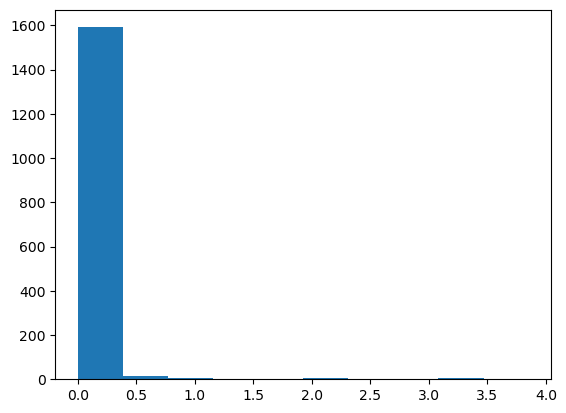

In [269]:
plt.hist(final_z_diffs)

In [270]:
np.where(tnew['HOSTGAL_SPECZ'] == 0)[0]
np.array(failed_z_diffs).shape
# 98 - 6 remaining that don't have redshift matches... 

(98,)

In [255]:
nozs_helengal = df.loc[df['ZTRUE'] == 0].index.values
[np.where(hostgal_big_is == nozs_helengal[i]) for i in range(len(nozs_helengal))]    
# no intersection, so none of the galaxies in helen's dataframe with redshift 0 are hosts. 

In [258]:
nozmatch = np.setxor1d(np.array(failed_z_diffs), np.where(tnew['HOSTGAL_SPECZ'] == 0)[0])
nozmatch     # 92 for 0.02 z threshold 

array([  37,   49,   67,   95,  117,  118,  122,  149,  190,  206,  240,
        249,  310,  318,  321,  337,  346,  367,  428,  433,  434,  454,
        478,  514,  522,  523,  569,  588,  625,  639,  654,  656,  685,
        730,  748,  808,  811,  821,  858,  887,  896,  913,  925,  936,
        939,  985, 1006, 1017, 1029, 1044, 1046, 1060, 1064, 1065, 1076,
       1101, 1103, 1161, 1213, 1215, 1216, 1219, 1265, 1307, 1330, 1348,
       1356, 1390, 1394, 1403, 1426, 1439, 1440, 1444, 1461, 1472, 1477,
       1484, 1497, 1498, 1505, 1510, 1539, 1540, 1564, 1569, 1581, 1588,
       1596, 1598, 1609, 1616])

In [542]:
np.load('nozmatch.npy')

array([  37,   49,   67,   95,  117,  118,  122,  149,  190,  206,  240,
        249,  310,  318,  321,  337,  346,  367,  428,  433,  434,  454,
        478,  514,  522,  523,  569,  588,  625,  639,  654,  656,  685,
        730,  748,  808,  811,  821,  858,  887,  896,  913,  925,  936,
        939,  985, 1006, 1017, 1029, 1044, 1046, 1060, 1064, 1065, 1076,
       1101, 1103, 1161, 1213, 1215, 1216, 1219, 1265, 1307, 1330, 1348,
       1356, 1390, 1394, 1403, 1426, 1439, 1440, 1444, 1461, 1472, 1477,
       1484, 1497, 1498, 1505, 1510, 1539, 1540, 1564, 1569, 1581, 1588,
       1596, 1598, 1609, 1616])

In [261]:
np.abs(tnew['HOSTGAL_SPECZ'][nozmatch].value - df['ZTRUE'][hostgal_big_is[nozmatch]].values)

array([0.36562502, 0.147165  , 0.34055499, 0.5447    , 0.021072  ,
       2.99604999, 0.20393999, 0.26989999, 1.991     , 0.18217   ,
       3.14645002, 0.13905998, 0.05362498, 0.88879999, 1.20660002,
       1.179     , 0.80428499, 0.19487999, 0.343475  , 2.13184   ,
       0.20434301, 0.08156001, 0.15835799, 0.17592   , 0.21465001,
       1.99434999, 0.11324   , 0.27143999, 0.24666   , 0.35080001,
       0.72025001, 0.32991   , 0.07959401, 1.934585  , 0.8996    ,
       0.18710002, 0.84089999, 0.7062    , 0.17050002, 0.58324501,
       1.71924998, 0.51795   , 0.74595501, 0.28804001, 0.63025005,
       0.09735001, 1.00936   , 0.46348002, 1.33565   , 2.54122501,
       0.63991999, 0.60792499, 0.35001999, 2.14259999, 2.09878501,
       3.12425001, 0.22992   , 0.33858001, 1.8628    , 0.96925   ,
       3.20020001, 0.158     , 0.07822499, 0.29379999, 0.03349598,
       0.11129   , 0.26271002, 0.05034001, 0.20232899, 0.34699   ,
       0.943255  , 3.2665    , 0.198512  , 0.64593698, 0.55776

## Recalculate impact parameters: 1) with and 2) without host galaxy. 
* Get rid of the SN that don't have matches in Helen's galaxy catalog. 
* Get rid of the galaxies 
* [If this data does come in it would be helpful.]

In [ ]:
* 0) * (i) get rid of the SN without matches. 
    * (ii) get rid of the galaxies in Helen dataframe with redshift 0 

* NOT Radius of the sun, but radius at which the sun rotates around the center of the galaxy
    * r_sun = 8 kpc ish
    * ^ degenerate w/ choice of R_n

* typical hydrogen column density that can be detectable: 10^16 / cm^2 
    * this will be smaller, maybe ^14, ^10
* hydrogen to dust mass ratio number
* what is the mean number of galaxies 
* reddening to column desnity conversion
    * 0.05 (0.03) mag for A_V —> ~ 10^18

* weight the n0 by the brightness, or mass 
    * let’s do mass since brightness alr accounted for in other weight 
* R_n is related to size of galaxy
    * a0_sersic, b0_sersic 
* n_0 at R_n (n_0 proportional to the amount of gas / mass in galaxy), and R_n
    * logmass -> gal_mass 
    

In [ ]:
Make a plot: 
* 1) with the host galaxy contribution (you have no clue where the supernova is in the host galaxy, so just count the contribution from the ENTIRE host) 
    * this might actually make a difference because host galaxy would contribute more???  
* 2) without the host galaxy contirbution


In [1]:
hostgal_big_is = np.load('hostgal_UNIQUE_ind.npy')

NameError: name 'np' is not defined

In [ ]:
* 0) * (i) get rid of the SN without matches. 
    * (ii) get rid of the galaxies in Helen dataframe with redshift 0 

In [277]:
df[df['ZTRUE'] == 0]

,Unnamed: 0,GALID,RA_GAL,DEC_GAL,ZTRUE,ZERR,g_obs,r_obs,i_obs,z_obs,...,Sersic_area,g_obs_auto,r_obs_auto,i_obs_auto,z_obs_auto,obs_gr,NBR_LIST,LOGSFR_TRUE,griz,weight
9636,9636,4300024070,53.008206,-27.902666,0.0,0.001,20.310504,19.137324,19.214407,19.453966,...,0.021719,21.886285,21.439565,21.389505,21.359590,1.173180,"9346,9416,9210",1.331333,78.116201,1.0
15425,15425,4300038868,53.023254,-27.777752,0.0,0.001,22.864724,23.137214,21.888198,21.667358,...,0.545557,26.064047,24.618490,23.856806,23.809938,-0.272490,"15259,15236",1.433584,89.557494,1.0
198599,198599,4300503837,53.007449,-27.738007,0.0,0.001,22.831386,21.490086,20.375297,19.949617,...,0.000709,24.023305,22.683281,21.537738,21.030042,1.341300,"198463,198597",1.965477,84.646386,1.0
478669,478669,4301209482,53.185074,-27.956800,0.0,0.001,23.434720,22.569740,21.970322,21.450131,...,0.149724,25.449550,24.287347,23.349204,23.032971,0.864980,-1,1.818456,89.424913,1.0
559077,559077,2300162835,36.422979,-4.808334,0.0,0.001,22.422495,21.774721,21.495284,21.304711,...,0.084733,22.907341,22.252621,21.906140,21.691134,0.647774,"559199,559032,559174,558978,559001,558995,559162",0.793538,86.997211,1.0
703135,703135,2300491331,36.530624,-4.330487,0.0,0.001,25.426276,24.161399,24.918792,24.249455,...,0.203365,25.847916,25.597881,25.340142,25.005155,1.264877,"703226,703147,703192,703134,703201,703214,7030...",3.395953,98.755922,0.4
757775,757775,2300622763,36.504719,-5.020115,0.0,0.001,25.000677,24.685170,24.044028,23.104835,...,0.001422,25.615771,25.207407,24.614379,24.986149,0.315507,"757895,757770,757668,757670,757904",3.429293,96.834710,0.6
870447,870447,2300874183,36.473677,-4.484332,0.0,0.001,24.320176,24.035583,23.723224,23.338653,...,0.059833,24.727631,24.619409,24.091136,23.827391,0.284593,"870456,870548,870658,870409,870481,870476,8705...",1.556623,95.417636,0.7
880630,880630,2300896527,36.637959,-4.112335,-0.0,0.001,18.422459,17.694135,17.463956,17.480613,...,0.033720,19.748865,19.304467,18.998469,19.061609,0.728324,-1,1.771330,71.061163,1.0
914887,914887,2300975651,35.973871,-4.747283,-0.0,0.001,19.335838,19.124593,18.088749,19.437161,...,1.917992,20.031558,19.285150,19.131956,19.541599,0.211245,"914766,914755,914558",1.528409,75.986341,1.0


In [16]:
### 0) get rid of the galaxies in Helen dataframe with redshift 0, and also get rid of the SN without matches. 
# going to redo this 
nozmatch = np.load('nozmatch.npy') 

# dropped_df = df.drop(np.where((gal_angdist_all == 0) == True)[0])      # or where df[df['ZTRUE'] == 0]
dropped_df = df.drop(np.where(df['ZTRUE'] == 0)[0])
dropped_df
dropped_tnew = tnew[np.setdiff1d(np.arange(0, 1635, 1), nozmatch)]

In [17]:
## for all galaxies 
new_dropped_df = dropped_df.drop(columns=['Unnamed: 0'])
new_dropped_df = new_dropped_df.reset_index()
new_dropped_df = new_dropped_df.rename(columns={'index': 'old_index'})
new_dropped_df

,old_index,GALID,RA_GAL,DEC_GAL,ZTRUE,ZERR,g_obs,r_obs,i_obs,z_obs,...,Sersic_area,g_obs_auto,r_obs_auto,i_obs_auto,z_obs_auto,obs_gr,NBR_LIST,LOGSFR_TRUE,griz,weight
0,0,4300000007,52.258174,-28.585640,0.699000,1.552626,22.666263,22.870720,24.456583,24.401214,...,0.135519,27.099511,25.655767,25.484381,25.776878,-0.204457,"102,71,85",0.221817,94.394780,0.8
1,1,4300000011,52.077320,-28.585696,1.433820,0.001000,23.491464,23.569005,24.809463,24.973073,...,0.013589,25.477124,25.434409,25.435946,25.225667,-0.077541,-1,0.765090,96.843005,0.6
2,2,4300000013,52.124443,-28.585687,0.230925,0.668835,22.125786,23.103293,23.058659,23.022337,...,0.016325,24.919264,24.487260,23.883548,23.774843,-0.977507,"38,133",-0.644414,91.310075,0.9
3,3,4300000014,52.186708,-28.585673,0.785695,1.558499,22.414150,21.903005,23.226666,23.243523,...,1.109612,24.743234,24.165644,24.150354,24.301115,0.511145,37,0.610736,90.787344,0.9
4,4,4300000021,52.106567,-28.585666,0.229480,0.001000,23.154393,23.780093,24.567752,24.951861,...,0.088674,25.689114,25.415451,25.141860,25.146109,-0.625700,45,-0.842706,96.454099,0.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4179367,4179384,4200805417,54.076851,-29.447326,1.623660,0.001000,25.649645,25.383804,24.953964,24.206734,...,0.000018,25.825964,25.605411,25.143199,24.449171,0.265841,"4179186,4179233,4179370",2.181574,100.194147,0.3
4179368,4179385,4200805418,54.154377,-29.446147,0.806310,0.952698,25.984977,24.939956,23.787159,23.271939,...,0.454683,27.498314,25.011402,23.849720,23.408727,1.045021,"4179335,4179307,4177801,4177764,4179145,417781...",0.706400,97.984031,0.5
4179369,4179386,4200805420,54.142957,-29.447960,0.854230,0.096713,24.211548,22.786839,21.658322,20.970408,...,1.333792,24.265642,22.884178,21.720228,21.051736,1.424709,"4177766,4177773,4177799,4177749",1.948950,89.627117,1.0
4179370,4179387,4200805423,54.121871,-29.447738,1.205000,0.345354,26.032564,24.135847,23.437828,22.483149,...,0.934578,26.377935,24.198956,23.550686,23.404599,1.896717,"4177777,4177750",1.991040,96.089388,0.7


In [17]:
df[df['GALID'] == dropped_hostgal_big_is_galids[i] for i in range(len(dropped_hostgal_big_is_galids))]

SyntaxError: invalid syntax (3363912709.py, line 1)

In [21]:
hostgal_big_is_galids = df.loc[hostgal_big_is]['GALID'].values  # hostgal_big_is gives the index of the hostgal in the original helen dataframe
dropped_hostgal_big_is_galids = hostgal_big_is_galids[np.setdiff1d(np.arange(0, 1635, 1), nozmatch)]
dropped_hostgal_big_is_galids
# this above is me trying to do the "correct" way ^ 

# actually this works because the dataframe retains the original index due to an extra column <- sketchy, just make a new arr
dropped_hostgal_big_is = hostgal_big_is[np.setdiff1d(np.arange(0, 1635, 1), nozmatch)]
dropped_hosts = df.loc[dropped_hostgal_big_is]

# dropped_df[dropped_df['GALID'] == dropped_hostgal_big_is_galids]#  
# dropped_hostgal_big_is = hostgal_big_is[np.setdiff1d(np.arange(0, 1635, 1), nozmatch)]
# dropped_hostgal_big_is  
# < - this gets all the indices of the dropped df wrong though, since it corresponds to the galaxies in the initial df
# ^ use the galids in the original df instead

In [22]:
new_dropped_hosts = dropped_hosts.drop(columns=['Unnamed: 0'])
new_dropped_hosts = new_dropped_hosts.reset_index()    ## index column is the ORIGINAL INDEX IN THE UNDROPPED UNTOUCHED DF 
# df.to_csv('new_dropped_hosts')
# new_dropped_hosts = new_dropped_hosts.rename(columns={'index': 'old_index'})
new_dropped_hosts = new_dropped_hosts.rename(columns={'index': 'old_index'})
new_dropped_hosts 

,old_index,GALID,RA_GAL,DEC_GAL,ZTRUE,ZERR,g_obs,r_obs,i_obs,z_obs,...,Sersic_area,g_obs_auto,r_obs_auto,i_obs_auto,z_obs_auto,obs_gr,NBR_LIST,LOGSFR_TRUE,griz,weight
0,2028493,4100472592,54.647325,-26.401075,0.246510,0.001000,20.558913,20.043122,19.758621,19.674982,...,0.201154,20.654821,20.054606,19.772133,19.690190,0.515791,"2028292,2028458,2028470,2028484,2028423",0.850371,80.035638,1.0
1,1820500,4100079513,53.726236,-27.622179,0.336210,0.001000,19.373273,18.752263,18.566151,18.222731,...,0.947264,19.356433,18.655833,18.433097,18.048661,0.621010,1820455,1.784145,74.914418,1.0
2,1975227,4100373083,54.836542,-26.640205,0.383880,0.001000,22.987223,21.884973,21.497041,21.192465,...,0.250076,23.101433,22.027464,21.672947,21.370653,1.102250,"1975203,1975181,1975353,1975128,1976018,197522...",0.543834,87.561702,1.0
3,843868,2300813852,36.019243,-5.015785,0.321840,0.001000,19.912170,18.464601,17.966664,17.663244,...,2.204251,19.990944,18.548226,18.037371,17.715301,1.447569,-1,1.378371,74.006679,1.0
4,847444,2300821684,36.113870,-4.943922,0.497970,0.001000,23.257735,21.603039,21.029541,20.511257,...,1.051976,23.221373,21.518795,20.950073,20.451007,1.654696,"847591,847222,847485,847067",1.119820,86.401572,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1538,657102,2300387914,35.975497,-3.851290,0.345453,0.000053,21.036343,19.598830,19.180661,18.844690,...,0.319947,21.226086,19.787854,19.258433,18.905645,1.437513,"656586,656620",1.065752,78.660524,1.0
1539,210451,4300534298,53.027475,-27.998611,1.020000,0.001000,24.870839,23.984685,23.201645,22.539578,...,0.032093,25.125324,24.301786,23.406498,22.658351,0.886154,"210685,210453,210561,210601",2.179339,94.596747,0.8
1540,1888847,4100213157,54.209708,-27.262341,0.688910,0.001000,23.567168,22.708640,22.131204,21.930777,...,0.875692,23.607740,22.678899,22.154298,21.965915,0.858528,-1,1.063998,90.337789,0.9
1541,4142086,4200734883,54.473477,-28.942285,0.611940,0.001000,22.853870,21.216939,20.457912,20.012660,...,0.777451,22.866130,21.246804,20.478898,20.036290,1.636931,"4141986,4142445,4142629",1.639667,84.541381,1.0


In [14]:
gal_ztrue = new_dropped_df['ZTRUE'].values
gal_ra = new_dropped_df['RA_GAL'].values * u.deg
gal_dec = new_dropped_df['DEC_GAL'].values * u.deg
gal_angdist_all = cosmo.angular_diameter_distance(gal_ztrue)

num_fgals = np.full(len(dropped_tnew['CID'].data), np.nan)

close_imp_bins = np.load('imp_bins_first500_close.npy') 


all_imp_kpcs2_internal = np.zeros((len(dropped_tnew['CID'].data), len(new_dropped_df)))   
    
start_idx = 30
end_idx = 31

host = True
for i in tqdm(range(start_idx, end_idx), total=end_idx - start_idx):
    cid = dropped_tnew['CID'].data[i]
    z_sn = dropped_tnew[i]['REDSHIFT_FINAL']
    ra_sn = dropped_tnew[i]['RA'] * u.deg
    dec_sn = dropped_tnew[i]['DEC'] * u.deg

    sn_angdist = cosmo.angular_diameter_distance(z_sn)       # actually not needed
    sn_coord = SkyCoord(ra=ra_sn, dec=dec_sn, distance=sn_angdist)

    mask = (new_dropped_df['ZTRUE'] <= z_sn)     # len 4179372

    # host = True
    hostgal_match = np.where(new_dropped_df['GALID'] == dropped_hostgal_big_is_galids[i])[0]   
    ### ^ NOTE ON THIS! IT IS THE ROW NUMBER IN THE DROPPED DF, BUT WILL FAIL WITH .LOC DUE TO THE EXTRA COLUMN OF THE ORIGINAL DF INDEX ###. 
    ### ALSO ANOTHER NOTE: (in general) loc uses the label of the dataframe to locate row, while iloc uses the actual number index.
    
    # assertion here for sn, hostgal_fromsn, and hostgal_fromgal ra, dec, redshifts. 
    assert np.isclose(gal_ra.value[hostgal_match][0], dropped_tnew[i]['HOSTGAL_RA'], 0.002)
    assert np.isclose(gal_dec.value[hostgal_match][0], dropped_tnew[i]['HOSTGAL_DEC'], 0.002)

    # assertion will fail for the specz's for hostgal from sn = 0 (pathological) 
    dropped_specz_0 = np.where(dropped_tnew['HOSTGAL_SPECZ'] == 0)[0]      # <-  indices changed from tnew
    if np.isin(i, dropped_specz_0) == False: 
        assert np.isclose(gal_ztrue[hostgal_match][0], dropped_tnew[i]['HOSTGAL_SPECZ'], 0.02) 

    if host == False:   
        mask[hostgal_match] = False

    if host == True: 
        mask[hostgal_match] = True

    gal_coords = SkyCoord(ra=gal_ra[mask], dec=gal_dec[mask], distance=gal_angdist_all[mask])

    thetas = sn_coord.separation(gal_coords).radian

    #### 2nd way of projection (right triangle, 2D geometry) -- gives smaller values of impact parameter
    imp_kpc_2 = (gal_angdist_all[mask].to(u.kpc) * np.sin(thetas)).value
    imp_kpc_2[imp_kpc_2 == 0] = -1 
    all_imp_kpcs2_internal[i, mask] = imp_kpc_2   

    # then replace the -1 with the *CORRECT* 0 kpc values.
    all_imp_kpcs2_internal[i][all_imp_kpcs2_internal[i] == 0] = -100   # this is BACKGROUND GALAXIES (which aren't counted)  
    all_imp_kpcs2_internal[i][all_imp_kpcs2_internal[i] == -1] = 0     # now, account for the gals that actually have a b of 0



KeyboardInterrupt



# THIS IS THE GOOD FINAL FUNCTION FOR CALCULATING PROJECTED EFFECTIVE RADIUS (IMPACT PARAMETER). 

In [142]:
##### pull this into a function to specify (1) with or (2) without host galaxy contribution. 

import os

# sn index number i (from 0 to 1543 now) 
# dropped sn: 1543, dropped_df: 4179372

# z, ra, dec of all galaxies
gal_ztrue = new_dropped_df['ZTRUE'].values
gal_ra = new_dropped_df['RA_GAL'].values * u.deg
gal_dec = new_dropped_df['DEC_GAL'].values * u.deg
gal_angdist_all = cosmo.angular_diameter_distance(gal_ztrue)

num_fgals = np.full(len(dropped_tnew['CID'].data), np.nan)

close_imp_bins = np.load('imp_bins_first500_close.npy') 

thresh = 1000      # in kpc, REDUCE THE SEARCH RADIUS! 

def process_chunk_dropped(start_idx, end_idx, host=False):
    
    all_imp_kpcs2_internal = np.zeros((len(dropped_tnew['CID'].data), len(dropped_df)))   
    
    for i in tqdm(range(start_idx, end_idx), total=end_idx - start_idx):
        cid = dropped_tnew['CID'].data[i]
        z_sn = dropped_tnew[i]['REDSHIFT_FINAL']
        ra_sn = dropped_tnew[i]['RA'] * u.deg
        dec_sn = dropped_tnew[i]['DEC'] * u.deg
        
        sn_angdist = cosmo.angular_diameter_distance(z_sn)       # actually not needed
        sn_coord = SkyCoord(ra=ra_sn, dec=dec_sn, distance=sn_angdist)

        mask = (new_dropped_df['ZTRUE'] <= z_sn)     # len 4179372

        hostgal_match = np.where(new_dropped_df['GALID'] == dropped_hostgal_big_is_galids[i])[0]   
        ### ^ NOTE ON THIS! IT IS THE ROW NUMBER IN THE DROPPED DF, BUT WILL FAIL WITH .LOC DUE TO THE EXTRA COLUMN OF THE ORIGINAL DF INDEX ###. 
        ### ALSO ANOTHER NOTE: (in general) loc uses the label of the dataframe to locate row, while iloc uses the actual number index.

        # assertion here for sn, hostgal_fromsn, and hostgal_fromgal ra, dec, redshifts. 
        assert np.isclose(gal_ra.value[hostgal_match][0], dropped_tnew[i]['HOSTGAL_RA'], 0.002)
        assert np.isclose(gal_dec.value[hostgal_match][0], dropped_tnew[i]['HOSTGAL_DEC'], 0.002)

        # assertion will fail for the specz's for hostgal from sn = 0 (pathological) 
        dropped_specz_0 = np.where(dropped_tnew['HOSTGAL_SPECZ'] == 0)[0]      # <-  indices changed from tnew
        if np.isin(i, dropped_specz_0) == False: 
            assert np.isclose(gal_ztrue[hostgal_match][0], dropped_tnew[i]['HOSTGAL_SPECZ'], atol=0.02) 

        if host == False:   
            mask[hostgal_match] = False

        if host == True: 
            mask[hostgal_match] = True

        gal_coords = SkyCoord(ra=gal_ra[mask], dec=gal_dec[mask], distance=gal_angdist_all[mask])

        thetas = sn_coord.separation(gal_coords).radian
        

        #### 2nd way of projection (right triangle, 2D geometry) -- gives smaller values of impact parameter
        imp_kpc_2 = (gal_angdist_all[mask].to(u.kpc) * np.sin(thetas)).value
        imp_kpc_2[imp_kpc_2 == 0] = -1 
        all_imp_kpcs2_internal[i, mask] = imp_kpc_2   

        # then replace the -1 with the *CORRECT* 0 kpc values.
        all_imp_kpcs2_internal[i][all_imp_kpcs2_internal[i] == 0] = -100   # this is BACKGROUND GALAXIES (which aren't counted)  
        all_imp_kpcs2_internal[i][all_imp_kpcs2_internal[i] == -1] = 0     # now, account for the gals that actually have a b of 0

        
        # Save to file while doing this so it doesn't completely crash
        if host == False: 
            imp_name = 'ImParams_RT_no_host'
            gal_name = 'CloseGal_RT_no_host'
        if host == True: 
            imp_name = 'ImParams_RT_host'
            gal_name = 'CloseGal_RT_host'
            
        if os.path.exists(f'{imp_name}') == False: 
            os.system(f'mkdir {imp_name}')
        np.save(f'/pscratch/sd/j/joygong/Dust/{imp_name}/all_imp_kpcs2_SN_{i}', all_imp_kpcs2_internal[i])
    
        # Get indexes of close galaxies for weighting purposes later. 
        close_gal = (0 <= all_imp_kpcs2_internal[i]) & (all_imp_kpcs2_internal[i] < thresh) 
        
        if os.path.exists(f'{gal_name}') == False: 
            os.system(f'mkdir {gal_name}')
        np.save(f'/pscratch/sd/j/joygong/Dust/{gal_name}/close_gals_SN_{i}', close_gal)   #, overwrite='True')
        
        if os.path.exists('Dropped_HostGal_Match') == False: 
            os.system('mkdir Dropped_HostGal_Match')
        np.save(f'/pscratch/sd/j/joygong/Dust/Dropped_HostGal_Match/hostgal_match_{i}', np.array(hostgal_match))   #, overwrite='True')
        

In [150]:
## run just to see what the range of impact parameters is in order for weighting.
chunk_size = 500 
num_chunks = int(np.ceil(len(dropped_tnew['CID'].data) / chunk_size)) 

for chunk in range(3, 4):     
    start_idx = chunk * chunk_size 
    end_idx = min((chunk + 1) * chunk_size, len(dropped_tnew['CID'].data))  
    process_chunk_dropped(start_idx, end_idx, host=False)
    
    print(f'Done with chunk {chunk}!') 


100%|██████████| 43/43 [00:09<00:00,  4.38it/s]


Done with chunk 3!


In [133]:
for i in range(1543): 
    try: 
        assert np.isclose(gal_ztrue[new_host_indices][i], dropped_tnew['HOSTGAL_SPECZ'].value[i], atol=0.02)
    except AssertionError:
        print(i, np.abs(gal_ztrue[new_host_indices][i] - dropped_tnew['HOSTGAL_SPECZ'].value[i]))


32 0.228963
102 0.170264
475 0.261361
686 0.228963
1111 0.327636
1234 0.319562


In [ ]:
from astropy import units as u
from astropy import constants as c

# define function to calculate R value [choose step size along LOS], assume outer radius of 1 Mpc (1000 kpc) 
""" average midplane volume densities as a function of R: 
3.1.3. Midplane and surface density distribution. Taking the warp into account it is possible
to derive the average Hi volume density n0(R) at midplane (Figure 4). The radial distribution is
approximately exponential for 7  R  35 kpc; n(R, z0) ∼ n0 · e−(R−R)/Rn with n0 = 0.9 cm−3
and Rn = 3.15 kpc. There are systematic differences between the northern and southern parts of
the disk in the azimuth ranges of 0◦ <φ< 180◦ and 180◦ <φ< 360◦, which has been known
for a long time (e.g., Kerr 1962). For radii in excess of R = 15 kpc, the dominant fraction of the
neutral gas is located in the Southern Hemisphere. A similar trend n(R) ≈ e−0.3R was found by
Strasser & Taylor (2004) from CGPS data with R  20 kpc """
""" approx exponential for 7 <~ R <~ 35 kpc: n(R, z0) ~ n0 * e ^ -(R - R_sun) / R_n 
n0 = 0.9 cm^-3, R_n = 3.15 kpc. """
""" maybe now, let R_sun ==> (nvm sun is not at the center of our gal...) (M_gal / M_milky) * R_sun <-- NVM 
"""
# dl = 0.001       # in kpc 
# # most accurate way ^ which actually doesn't matter since it's continuous: 
# bs_all = np.load('ImParams_RT/all_imp_kpcs2_SN_398.npy')
# bs = k[k >= 0]             # projected radius of galaxy to los, r_eff^p, for b < thresh

# for b in range(
# dl_halfmax = 1000**2 - b**2 

# r = np.sqrt(b**2 + (dl*i)**2)    


### 0) plot distribution of b’s currently = 1635 * ~100s foreground gals
# 1. define linspace of vals = (0, 2x, 1000000) where x = hypotenuse of right triangle w sides b & 1000 kpc (1 mpc) 
    # * note: need to recompute the projected r_eff^p (to be linear with right triangle INSTEAD of ARCLENGTH! * 
    
# 2. calc R @ each dl value (i.e. point in that linspace^) 
    # couldn't i just assume all values from b to 1000 kpc are valid since it's continuous anyway.. 
    
# 3. calc n_H @ each R value (exp fit)

# 4. integrate! -> i.e. plot on graph n_H vs. R (like in figure?), find area under curve 

# NOTE: we don’t account for halos of any bkg gal, even if halo would be in foreground? 
# (not sure about this conceptually) - (selection bias??) 


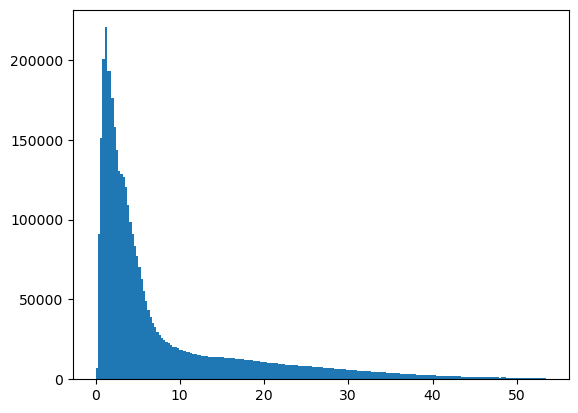

In [34]:
a, d, c = plt.hist(np.exp(new_dropped_df['LOG_SFR']), bins=200)

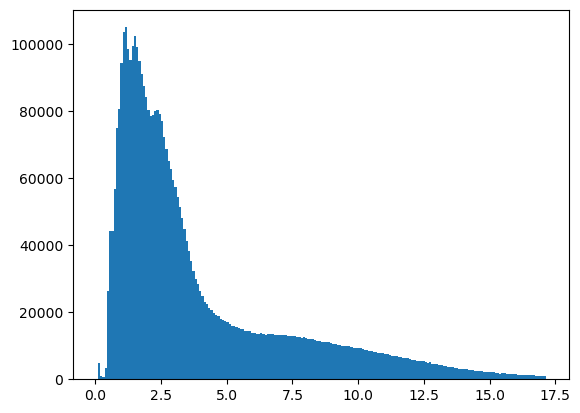

In [23]:
a, d, c = plt.hist(np.exp(new_dropped_df['LOG_SFR'])**(1/1.4), bins=200)


In [25]:
import scipy.integrate as sci

# half light radius R_e (from Helen's paper), in sersic profile 
# half light radius of milky way = 5.75 ± 0.38 kpc, from https://arxiv.org/html/2406.05604v1#:~:text=With%20the%20luminosity%20surface%20density,of%205.75%20%C2%B1%200.38%20kpc.
R_e = np.sqrt(new_dropped_df['a0_Sersic'] * new_dropped_df['b0_Sersic'])
R_e_weights = R_e / np.median(R_e)     # note milky way is medium-sized galaxy, but unsure what units the ab are in helen's df
    
# re-weight brightness according to median (assuming MW is average brightness)
mag_weights = 1 / (new_dropped_df['griz'] / new_dropped_df['griz'].median())    # 1 / because lower value = brighter 
    
# sfr weights 
sfr = np.exp(new_dropped_df['LOG_SFR'])
sfr_ks = np.exp(new_dropped_df['LOG_SFR'])**(1/1.4)
## note milky way is actually fairly high (6-7 / yr); is a spiral too
# mw_sfr = np.digitize(6.5, d) ## --> 25; assign weight of 1

mw_sfr_ks = np.digitize(6.5**(1/1.4), d)
# sfr_binsize = 1 / (mw_sfr)
sfr_binsize = 1 / (mw_sfr_ks)
# sfr_weights = np.digitize(sfr, d, right=False) * sfr_binsize 
sfr_weights = np.digitize(sfr_ks, d, right=False) * sfr_binsize 


# define function to calculate n_H value
def n_H(R, mag_weight, R_e_weight, sfr_weight): 
    """ 
    Average midplane volumn density as a function of R
    input: R, mag_weight (brightness weighting), R_e_weight (effective radius weighting) 
    output: n_H at radius R
    fiducial values for Milky Way: n(R, z0) ∼ n0 · e−(R−R_sun)/Rn with n0 = 0.9 cm−3 and Rn = 3.15 kpc.
    """ 
    # R_sun = (c.R_sun).to(u.kpc)               # NOTE: R_sun is NOT the radius of the sun, but the radius of sun from center of galaxy
    R_sun = 8.0                               # sun is ~8 kpc from center of mw                  
    n0_fid = 0.9                              # cm^-3 
    n0 = n0_fid * mag_weight * sfr_weight     # n_0 at R_n (n_0 proportional to the amount of gas / mass in galaxy) -> brightness
    R_n_fid = 3.15                            # kpc
    R_n = R_n_fid * R_e_weight                # R_n scaled by size of galaxy: a0_sersic, b0_sersic 
    
    return n0 * np.exp(-(R - R_sun)/R_n)      # R_sun in kpc, n0 (and n_H) in cm^-3 


# numerically integrate. [choose step size] (might be wayyy too slow esp for every galaxy) 
def num_integral(ys, xs): 
    """
    input: array of Rs (x-axis), array of n_Hs (y-axis)
    output: integral of n_H from R_min to R_max 
    """ 
    return sci.cumtrapz(ys, xs)
    ## make sure to do b -> 1000, and then *2
    
# analytical integral 
def ana_integral(R_min, R_max, mag_weight, R_e_weight, sfr_weight): 
    """ 
    Column density = integrated number density n_H
    inputs: R_min (cm), R_max (cm), mag_weight, R_e_weight 
    NOTE! All distance units need to be in cm 
    """ 
    R_sun = (8.0*u.kpc).to(u.cm).value        # sun is ~8 kpc from center of mw                  
    n0_fid = 0.9                              # cm^-3 
    n0 = n0_fid * mag_weight * sfr_weight     # n_0 at R_n (n_0 proportional to the amount of gas / mass in galaxy) -> brightness
    R_n_fid = (3.15*u.kpc).to(u.cm).value     # in cm (converted from kpc)
    R_n = R_n_fid * R_e_weight                # R_n scaled by size of galaxy: a0_sersic, b0_sersic 
    
    def indef(R): 
        return -n0 * R_n * np.exp(-(R - R_sun)/R_n)
    
    return indef(R_max) - indef(R_min)
    

In [26]:
## for every supernova: 
    ## do for all close foreground galaxies, then sum 

## selection based on z confidence 
z_ratio = new_dropped_df['ZERR']/new_dropped_df['ZTRUE']
z_sn_gr5 = z_ratio[z_ratio<0.2]
z_sn_gr5_cond = (z_ratio<0.2)
high_nh = np.array([3454528, 4004537])

def summed_column_density(i, host=False, high=False): 
    """
    input: i (SN index)
    output: summed column density of all close foreground galaxies to SN 
    """
    thresh = 1000        # kpc 
    
    if host == False: 
        imp_name = 'ImParams_RT_no_host'
        close_gal_name = 'CloseGal_RT_no_host'
    if host == True: 
        imp_name = 'ImParams_RT_host'
        close_gal_name = 'CloseGal_RT_host'
        
    all_imps = np.load(f'/pscratch/sd/j/joygong/Dust/{imp_name}/all_imp_kpcs2_SN_{i}.npy')
    close_gs = np.load(f'/pscratch/sd/j/joygong/Dust/{close_gal_name}/close_gals_SN_{i}.npy')
    hostgal = np.load(f'/pscratch/sd/j/joygong/Dust/Dropped_HostGal_Match/hostgal_match_{i}.npy')

        
    ## add in good z selection here 
    cond = (close_gs) & (z_sn_gr5_cond)
    if high == False: 
        if (cond[high_nh[0]] == True) or (cond[high_nh[1]] == True): 
            cond[high_nh[0]] = False
            cond[high_nh[1]] = False
    
    close_imps = all_imps[cond]
    close_mag_weights = mag_weights.values[cond]
    close_R_e_weights = R_e_weights.values[cond]
    close_sfr_weights = sfr_weights[cond]
    
    col_dens = np.zeros(len(close_imps))
    
    for i in range(len(col_dens)): 
        col_dens[i] = 2 * ana_integral((close_imps[i]*u.kpc).to(u.cm).value, (thresh*u.kpc).to(u.cm).value, close_mag_weights[i], close_R_e_weights[i], close_sfr_weights[i])

    ### sum over all contributions 
    col_sum = np.sum(col_dens)

    return col_sum, col_dens, close_imps, (close_gs) & (z_sn_gr5_cond)
    

In [179]:
### save the individual arrays for n_h contribution for EACH SN & the (close_gs) & (z_sn_gr5_cond) for EACH SN
all_nh_sn = [[] for _ in range(len(dropped_tnew))]
all_close_cond_sn = [[] for _ in range(len(dropped_tnew))]

for i in tqdm(range(len(dropped_tnew))): 
    res = summed_column_density(i, host=False)
    all_nh_sn[i] = res[1]
    all_close_cond_sn[i] = np.where(res[-1] == True)[0]
    

100%|██████████| 1543/1543 [01:43<00:00, 14.96it/s]


In [180]:
## a) histogram the n_h from each galaxy contribution (or plot contribution vs. galaxy #) for each sn
    # b) have it be additive. ==> essentially like a weighted histogram 
   
all_gal_ids = np.arange(len(new_dropped_df))

## for each i 
all_gal_nhs = np.zeros((len(dropped_tnew), len(new_dropped_df)))

for i in range(len(dropped_tnew)): 
    all_gal_nhs[i][all_close_cond_sn[i]] = all_nh_sn[i]
all_gal_nhs

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [181]:
nh_contrs = np.sum(all_gal_nhs, axis=0)
np.argmax(nh_contrs), np.argmin(nh_contrs)

(3454528, 0)

In [182]:
np.argsort(nh_contrs)[::-1], nh_contrs[np.argsort(nh_contrs)[::-1]]

(array([3454528, 4004537, 4108727, ..., 2783261, 2783260,       0]),
 array([2.06404838e+61, 1.58041921e+52, 3.13646765e+25, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]))

In [183]:
## so it's just really the first two that are contributing the MOST
new_dropped_df.iloc[np.argsort(nh_contrs)[::-1][:2]]

,old_index,GALID,RA_GAL,DEC_GAL,ZTRUE,ZERR,g_obs,r_obs,i_obs,z_obs,...,Sersic_area,g_obs_auto,r_obs_auto,i_obs_auto,z_obs_auto,obs_gr,NBR_LIST,LOGSFR_TRUE,griz,weight
3454528,3454545,1100125221,7.369556,-43.386741,0.02045,0.001,24.400555,24.736023,24.897564,24.488101,...,0.000023,25.211275,24.950105,25.127133,24.730109,-0.335468,"3454520,3454592,3454593,3454622,3454440",-3.263482,98.522243,0.5
4004537,4004554,4200455588,54.563138,-28.710642,0.02045,0.001,24.223502,24.378094,24.680518,23.968685,...,0.000011,24.559842,24.511212,24.885483,24.414812,-0.154592,"4004544,4004560,4004509,4004573,4004637,400452...",-2.937339,97.250799,0.6


In [185]:
high_nh = np.argsort(nh_contrs)[::-1][:2]
high_nh

array([3454528, 4004537])

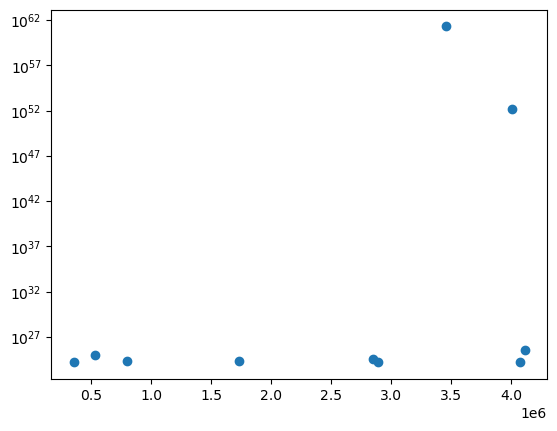

In [184]:
plt.plot(np.argsort(nh_contrs)[::-1][:10], nh_contrs[np.argsort(nh_contrs)[::-1]][:10], 'o')
plt.yscale('log')

Text(0, 0.5, 'n_h contribution')

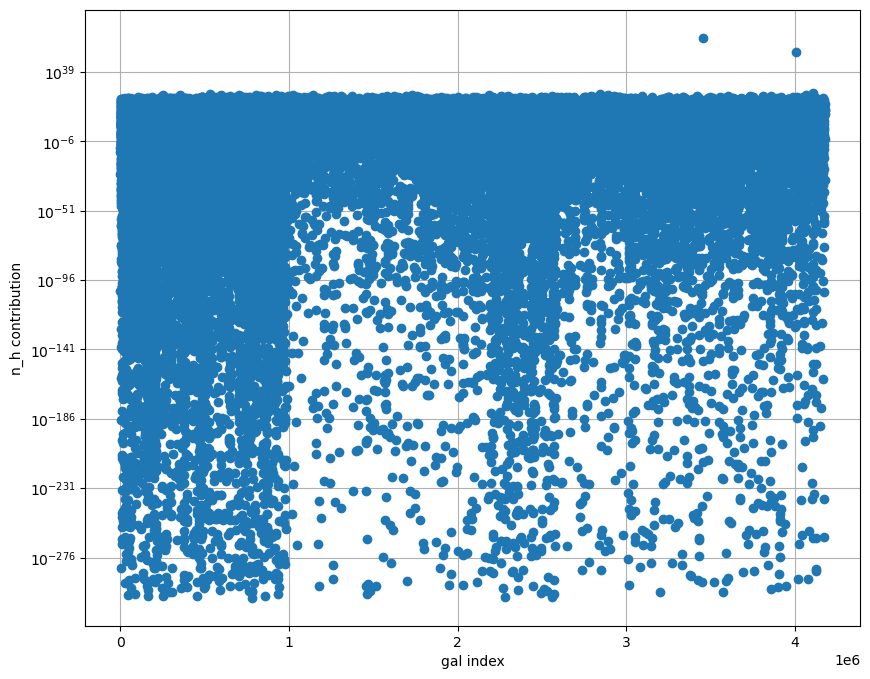

In [214]:
### b) additive => 
plt.figure(figsize=(10, 8))
plt.plot(all_gal_ids, np.sum(all_gal_nhs, axis=0), 'o')
plt.grid()
plt.yscale('log')
plt.xlabel('gal index') 
plt.ylabel('n_h contribution')

Text(0, 0.5, 'n_h contribution')

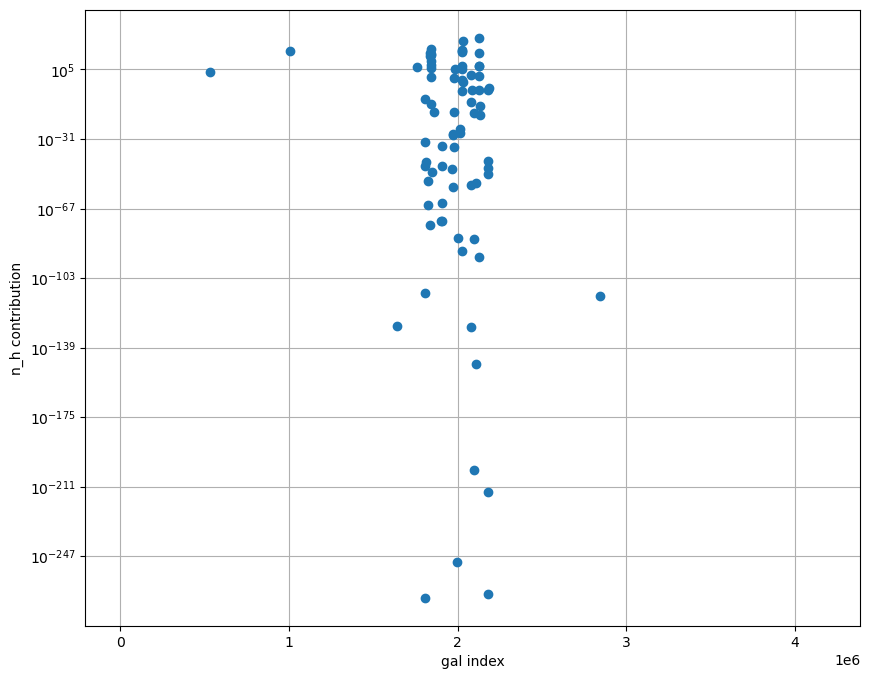

In [121]:
plt.figure(figsize=(10, 8))
plt.plot(all_gal_ids, all_gal_nh, 'o')
plt.grid()
plt.yscale('log')
plt.xlabel('gal index') 
plt.ylabel('n_h contribution')

In [242]:
#### RERUN without the contributions of high_nh = array([3454528, 4004537])

sn_col_dens_no_host = np.zeros(len(dropped_tnew))

for i in tqdm(range(len(dropped_tnew))): 
    sn_col_dens_no_host[i] = summed_column_density(i, host=False, high=False)[0]
    
np.save('sn_col_dens_host_sfr_z_14_no_high_nh', sn_col_dens_no_host)

100%|██████████| 1543/1543 [01:35<00:00, 16.09it/s]


In [ ]:
### NOW, DO IT WITH HOST to see if host contribution huge
    # save the individual arrays for n_h contribution for EACH SN & the (close_gs) & (z_sn_gr5_cond) for EACH SN

all_nh_sn = [[] for _ in range(len(dropped_tnew))]
all_close_cond_sn = [[] for _ in range(len(dropped_tnew))]

for i in tqdm(range(len(dropped_tnew))): 
    res = summed_column_density(i, host=True)
    all_nh_sn[i] = res[1]
    all_close_cond_sn[i] = np.where(res[-1] == True)[0]
        
    

#### This is original analysis/calculation

In [55]:
# WITH HOST 
sn_col_dens_host = np.zeros(len(dropped_tnew))

for i in tqdm(range(len(dropped_tnew))): 
    sn_col_dens_host[i] = summed_column_density(i, host=True)[0]
    

100%|██████████| 1543/1543 [01:28<00:00, 17.50it/s]


In [56]:
# WITHOUT HOST 
sn_col_dens_no_host = np.zeros(len(dropped_tnew))

for i in tqdm(range(len(dropped_tnew))): 
    sn_col_dens_no_host[i] = summed_column_density(i, host=False)[0]

100%|██████████| 1543/1543 [01:29<00:00, 17.19it/s]


#### And with the superlinear 1.4 relation with S/N of z > 5

In [65]:
# #### superlinear relation between sfr and gas 
np.save('sn_col_dens_host_sfr_z_14', sn_col_dens_host)
np.save('sn_col_dens_no_host_sfr_z_14', sn_col_dens_no_host)

In [25]:
sn_col_dens_host = np.load('sn_col_dens_host_sfr_z_14.npy')
sn_col_dens_no_host = np.load('sn_col_dens_no_host_sfr_z_14.npy')

In [23]:
np.save('sn_col_dens_host_sfr_z', sn_col_dens_host)
np.save('sn_col_dens_no_host_sfr_z', sn_col_dens_no_host)

sn_col_dens_host = np.load('sn_col_dens_host_sfr_z.npy')
sn_col_dens_no_host = np.load('sn_col_dens_no_host_sfr_z.npy')
        
##### previous iterations
# np.save('sn_col_dens_host_sfr', sn_col_dens_host)
# np.save('sn_col_dens_no_host_sfr', sn_col_dens_no_host)

# np.save('sn_col_dens_host', sn_col_dens_host)
# np.save('sn_col_dens_no_host', sn_col_dens_no_host)

# sn_col_dens_host = np.load('sn_col_dens_host.npy')
# sn_col_dens_no_host = np.load('sn_col_dens_no_host.npy')

# sn_col_dens_host = np.load('sn_col_dens_host_sfr.npy')
# sn_col_dens_no_host = np.load('sn_col_dens_no_host_sfr.npy')

NameError: name 'sn_col_dens_host' is not defined

In [29]:
dropped_colors = colors[np.setdiff1d(np.arange(0, 1635, 1), nozmatch)]
dropped_x1s = x1s[np.setdiff1d(np.arange(0, 1635, 1), nozmatch)]


In [16]:
dropped_colors = colors[np.setdiff1d(np.arange(0, 1635, 1), nozmatch)]

plt.figure(figsize=(8, 8))
plt.scatter(dropped_colors, sn_col_dens_host, alpha=0.5, color='blue', label='host')
plt.ylim(1e23, 1e25)
plt.yscale('log')
plt.grid()
plt.xlabel('SALT color $c$')
plt.ylabel('$\sum$ Column Density of Close Foreground Galaxies')
plt.title('with host')

NameError: name 'sn_col_dens_host' is not defined

<Figure size 800x800 with 0 Axes>

Text(0.5, 1.0, 'no host')

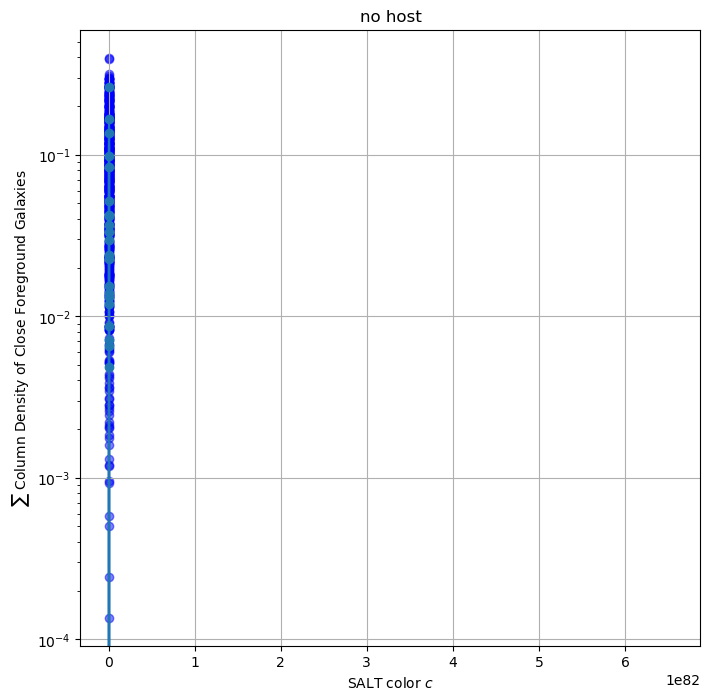

In [86]:
plt.figure(figsize=(8, 8))
# plt.scatter(dropped_colors, sn_col_dens_no_host, alpha=0.5, color='blue', label='host')
plt.scatter(sn_col_dens_no_host, dropped_colors, alpha=0.5, color='blue', label='host')
# plt.scatter(cmeans, nohostmeans, color='red', label='means')
plt.errorbar(nohostmeans, cmeans, c_stds, fmt='o')
# plt.ylim(1e23, 1e25)
plt.yscale('log')
plt.grid()
plt.xlabel('SALT color $c$')
plt.ylabel('$\sum$ Column Density of Close Foreground Galaxies')
plt.title('no host')

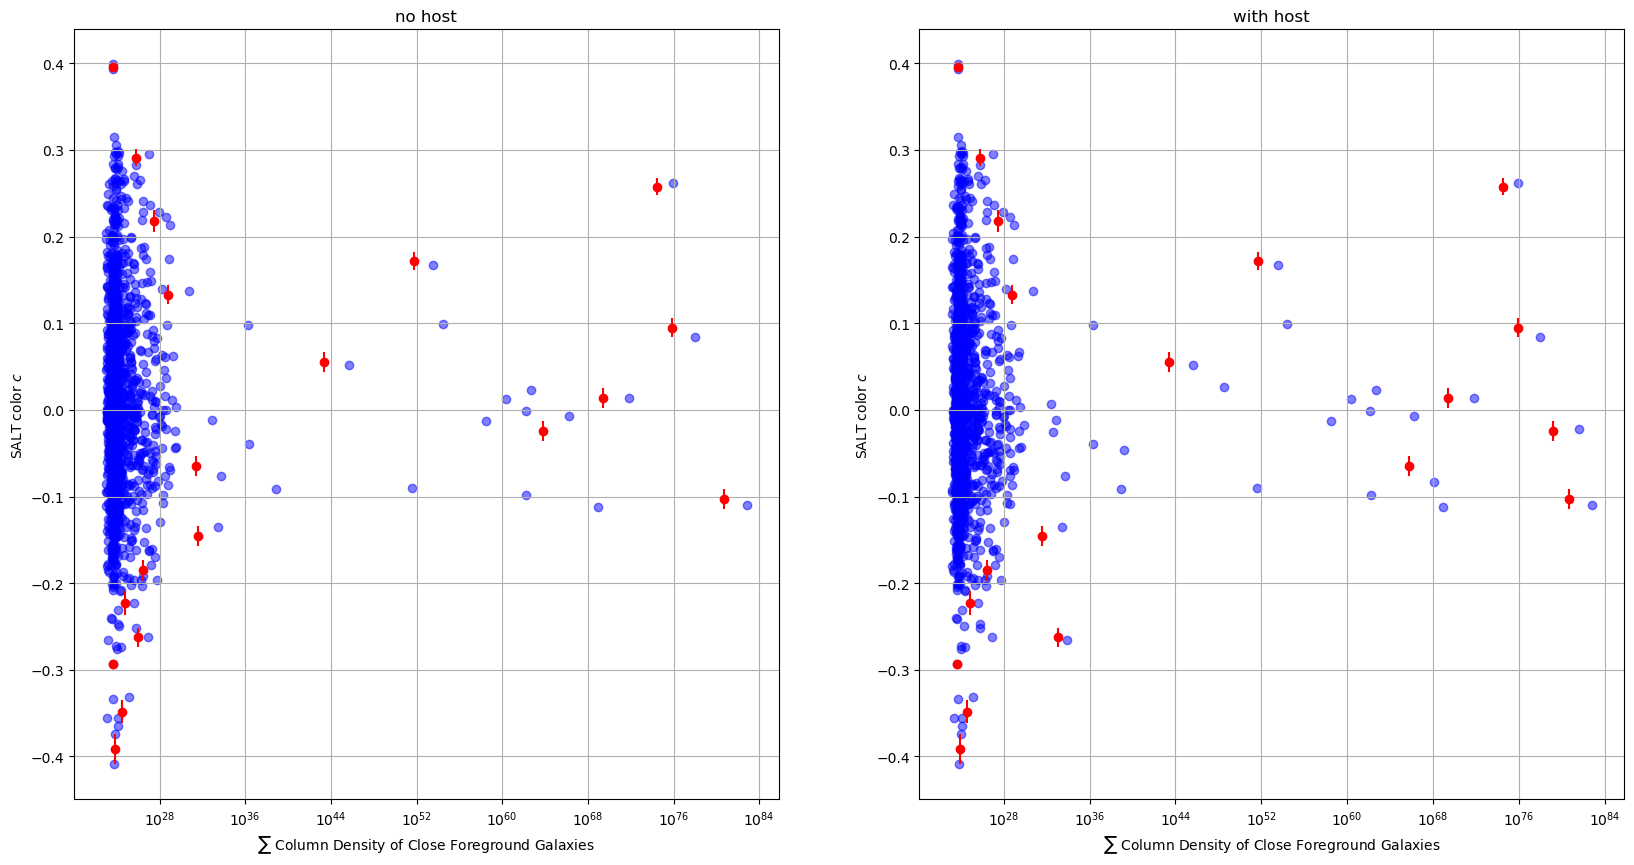

In [154]:
fig, axes = plt.subplots(1, 2, figsize=(20, 10))
axes[0].scatter(sn_col_dens_no_host, dropped_colors, alpha=0.5, color='blue', label='no_host')
axes[1].scatter(sn_col_dens_host, dropped_colors, alpha=0.5, color='blue', label='host')

axes[0].errorbar(nohostmeans, cmeans, yerr=c_stds, fmt='ro')
axes[1].errorbar(hostmeans, cmeans, yerr=c_stds, fmt='ro')

for i in range(0, 2): 
    # axes[i].set_xlim(1e23, 1e26)
    axes[i].set_xscale('log')
    axes[i].grid()
    axes[i].set_ylabel('SALT color $c$')
    axes[i].set_xlabel('$\sum$ Column Density of Close Foreground Galaxies')
    if i == 0: 
        axes[i].set_title('no host')
    else: 
        axes[i].set_title('with host')

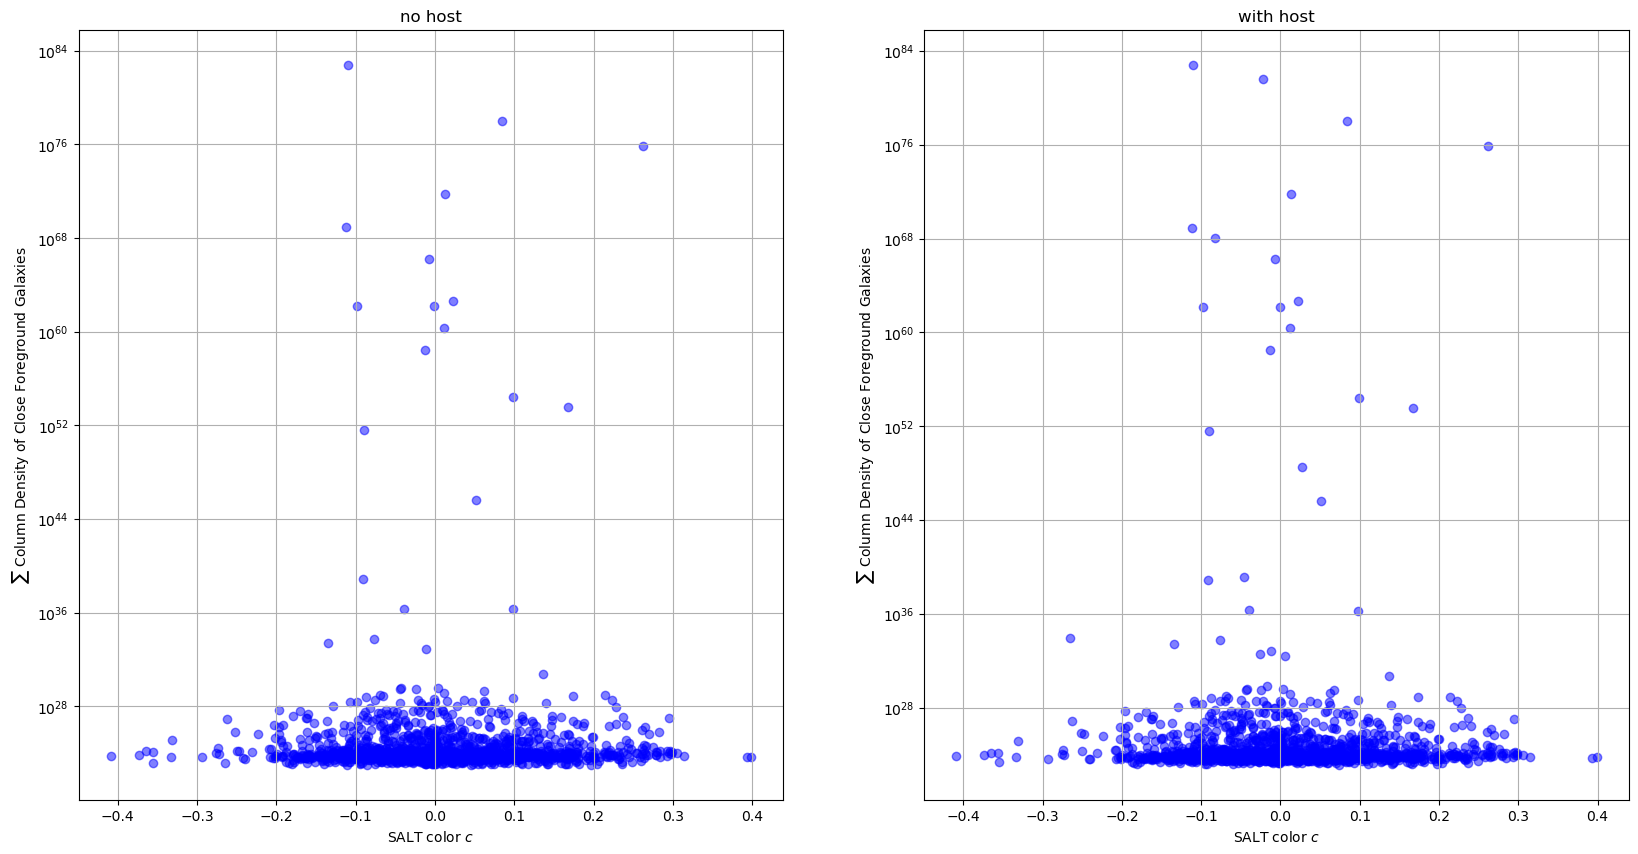

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(20, 10))
axes[0].scatter(dropped_colors, sn_col_dens_no_host, alpha=0.5, color='blue', label='no_host')
axes[1].scatter(dropped_colors, sn_col_dens_host, alpha=0.5, color='blue', label='host')

for i in range(0, 2): 
    # axes[i].set_ylim(1e23, 1e25)
    axes[i].set_yscale('log')
    axes[i].grid()
    axes[i].set_xlabel('SALT color $c$')
    axes[i].set_ylabel('$\sum$ Column Density of Close Foreground Galaxies')
    if i == 0: 
        axes[i].set_title('no host')
    else: 
        axes[i].set_title('with host')

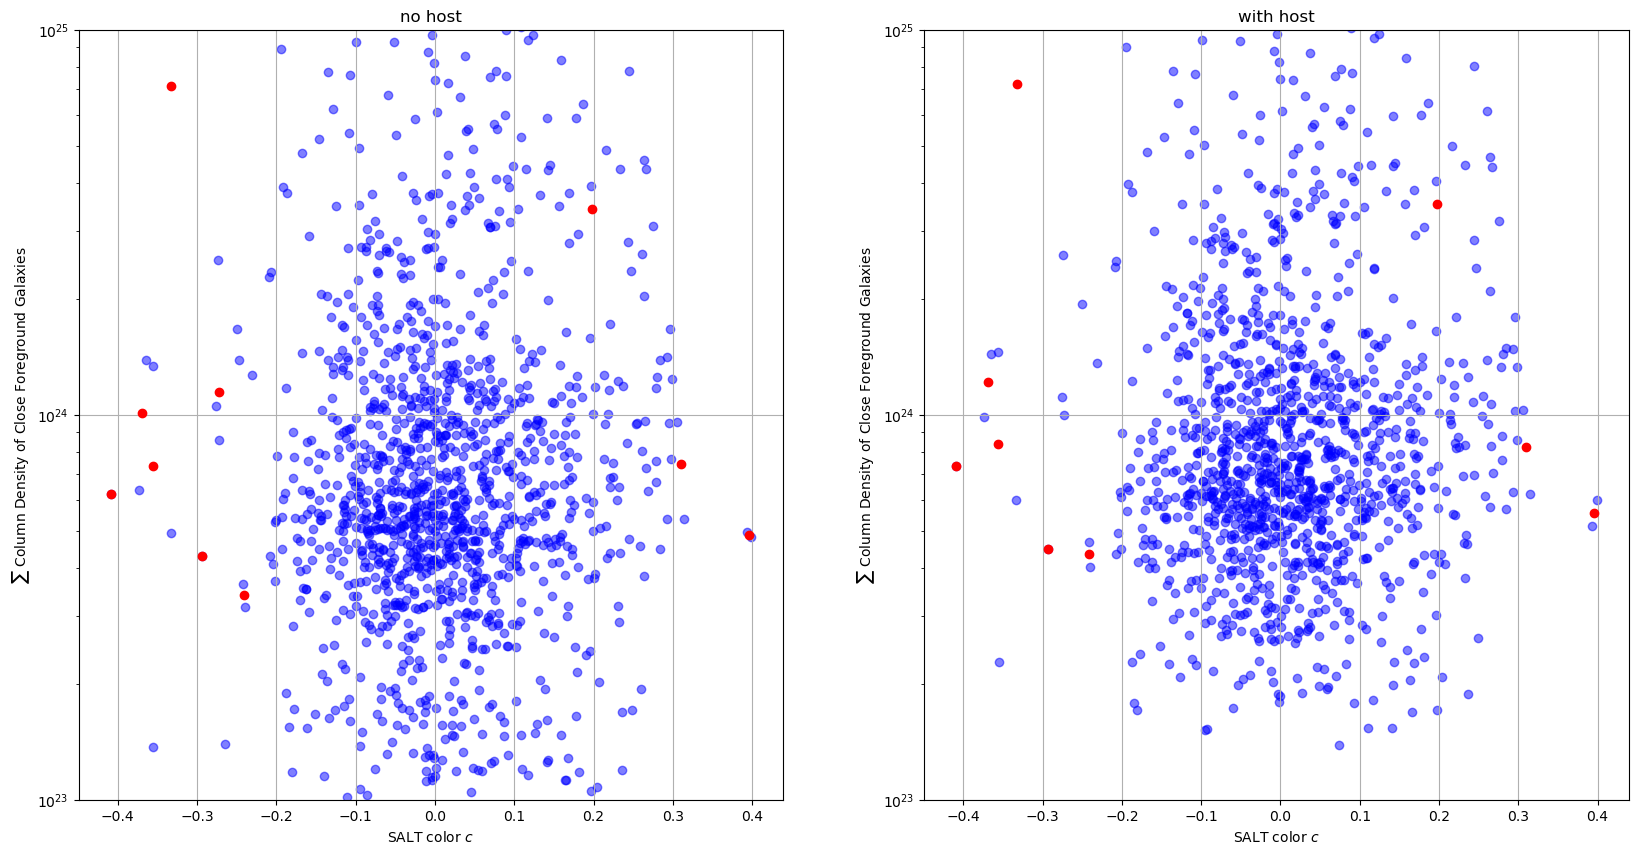

In [130]:
fig, axes = plt.subplots(1, 2, figsize=(20, 10))
axes[0].scatter(dropped_colors, sn_col_dens_no_host, alpha=0.5, color='blue', label='no_host')
axes[0].plot(cmeans, nohostmeans, 'ro')
axes[1].scatter(dropped_colors, sn_col_dens_host, alpha=0.5, color='blue', label='host')
axes[1].plot(cmeans, hostmeans, 'ro')

for i in range(0, 2): 
    axes[i].set_ylim(1e23, 1e25)
    axes[i].set_yscale('log')
    axes[i].grid()
    axes[i].set_xlabel('SALT color $c$')
    axes[i].set_ylabel('$\sum$ Column Density of Close Foreground Galaxies')
    if i == 0: 
        axes[i].set_title('no host')
    else: 
        axes[i].set_title('with host')

plt.savefig('col_dens_nohost_host.png')

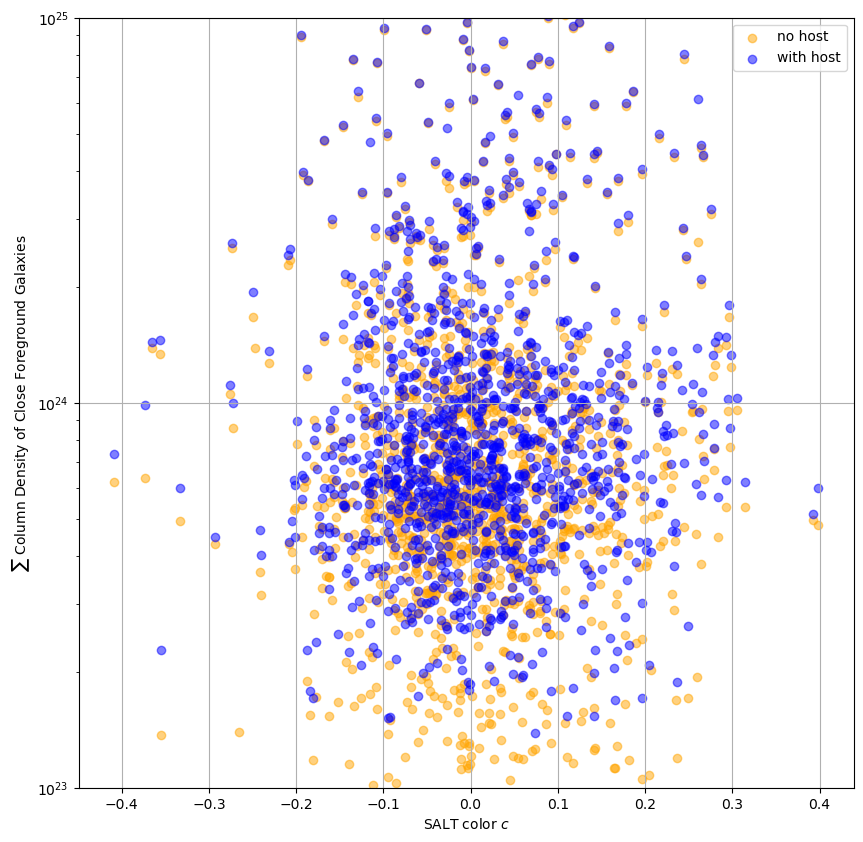

In [23]:
plt.figure(figsize=(10, 10))
plt.scatter(dropped_colors, sn_col_dens_no_host, alpha=0.5, color='orange', label='no host')
plt.scatter(dropped_colors, sn_col_dens_host, alpha=0.5, color='blue', label='with host')


# plt.ylim(0, 500)
# plt.xlim(-0.1, 0.1)
plt.ylim(1e23, 1e25)
plt.yscale('log')
plt.xlabel('SALT color $c$')
plt.ylabel('$\sum$ Column Density of Close Foreground Galaxies')
plt.legend()
plt.grid()

plt.savefig('col_dens_2on1.png')

# plt.title('Dust-Color Correlation, Host Galaxy Included')
# plt.title('Host Galaxy Included')

In [33]:
plt.figure(figsize=(8, 8))
plt.scatter(dropped_colors, sn_col_dens_no_host)
plt.ylim(0, 1000)
plt.xlabel('SALT color $c$')
plt.ylabel('Summed column density of close foreground galaxies')
plt.title('Dust-Color Correlation, Host Galaxy Not Included')

NameError: name 'sn_col_dens_no_host' is not defined

<Figure size 800x800 with 0 Axes>

In [ ]:
Don’t be so sure!  Reverse the axes (NH vs c) and calculate statistics in bins of color. 
Overplot NH vs mean color and error in the mean (and RMS).

In [ ]:
### bin in colors
# for each color bin: 
N_H vs. mean color w/ std (+/- sigma?) & RMS (1 value)



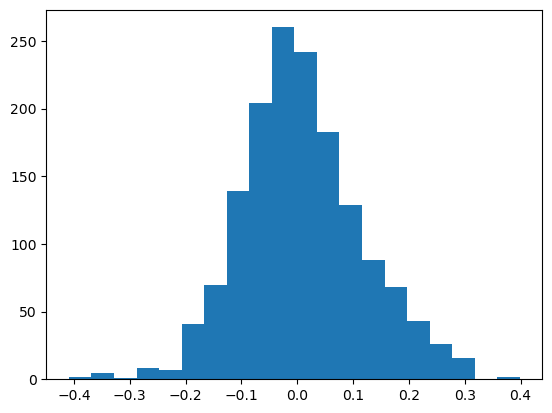

In [137]:
n, b, c = plt.hist(dropped_colors, bins=20)

In [120]:
bins = np.linspace(np.log10(1e23), np.log10(1e25), 20)
bins = np.power(10, bins)
bins

array([1.00000000e+23, 1.27427499e+23, 1.62377674e+23, 2.06913808e+23,
       2.63665090e+23, 3.35981829e+23, 4.28133240e+23, 5.45559478e+23,
       6.95192796e+23, 8.85866790e+23, 1.12883789e+24, 1.43844989e+24,
       1.83298071e+24, 2.33572147e+24, 2.97635144e+24, 3.79269019e+24,
       4.83293024e+24, 6.15848211e+24, 7.84759970e+24, 1.00000000e+25])

In [66]:
sn_col_dens_no_host.min(), sn_col_dens_no_host.max()

(8471175469.641228, 2.0640483846809628e+61)

Text(0, 0.5, 'number of sn')

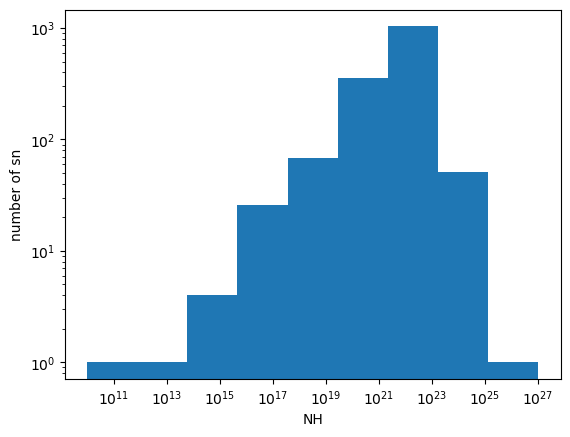

In [246]:
# bins = np.logspace(np.log10(1e23),np.log10(1e83), 200)
# bins = np.linspace(1e23, 1e25, 200)

# bins = np.linspace(1e23, 1e25, 30)

bins = np.linspace(np.log10(1e10), np.log10(1e27), 10)
# bins = np.linspace(np.log10(sn_col_dens_no_host.min()), np.log10(sn_col_dens_no_host.max()), 50)

bins = np.power(10, bins)

n, b, c = plt.hist(sn_col_dens_no_host, bins=bins, log=True)
plt.xscale('log') 
plt.xlabel('NH')
plt.ylabel('number of sn')

In [27]:
colors

array([-0.129846 ,  0.0314576,  0.10942  , ..., -0.0651147, -0.0962991,
       -0.0807827])

In [247]:
dropped_x1s, dropped_colors

(array([ 0.14373,  0.41085,  0.73028, ...,  0.33208, -2.12987, -1.04566]),
 array([-0.129846 ,  0.0314576,  0.10942  , ..., -0.0651147, -0.0962991,
        -0.0807827]))

In [248]:
## only do it based on the middle graph (too lazy to apply c corrections w/ x1 variance) 
dropped_colors

bias_cneg = np.load('c < -0.1_|x1| < 0.40.npz')['dcmeans']
bias_cneut = np.load('|c| < 0.1_|x1| < 0.40.npz')['dcmeans']
bias_cpos = np.load('c > 0.1_|x1| < 0.40.npz')['dcmeans']
zbins = np.load('zbins.npy')

## assign color bias value to EACH SN in dropped_colors based on: 1) its color 2) its redshift
cconds = [(dropped_colors < -0.1), (np.abs(dropped_colors) < 0.1), (dropped_colors > 0.1)]
dropped_reds = dropped_tnew['REDSHIFT_FINAL'].value
biases = [bias_cneg, bias_cneut, bias_cpos]

c_biases = [[] for i in range(len(cconds))]

for i, ccond in enumerate(cconds): 
    u = np.digitize(dropped_reds[ccond], zbins)  
    c_biases[i] = biases[i][u - 1]
    
# c_biases

Text(0.5, 0, '$\\delta c$')

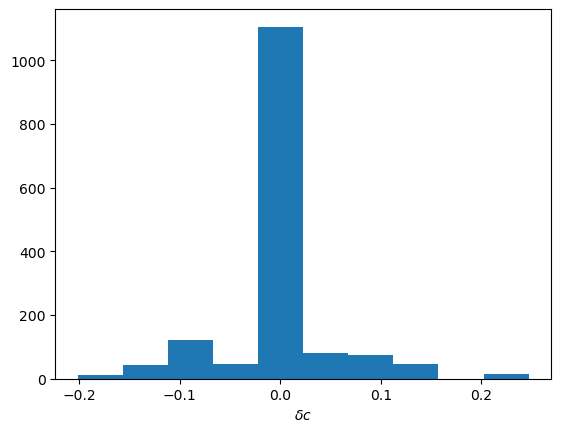

In [28]:
plt.hist(sorted_c_biases, bins=10)
plt.xlabel(r'$\delta c$')

In [249]:
sorted_c_biases = np.zeros(len(dropped_colors))
indices_cconds = [np.where(cconds[i] == True) for i in range(len(cconds))]

for i in range(len(cconds)): 
    for j in range(len(c_biases[i])): 
        sorted_c_biases[indices_cconds[i][0][j]] = c_biases[i][j]

dropped_colors = colors[np.setdiff1d(np.arange(0, 1635, 1), nozmatch)]
biascor_dropped_colors = dropped_colors - sorted_c_biases

In [250]:
no_host_bins = [[] for _ in range(len(b) - 1)]

for i in range(len(b)-1): 
    no_host_bin = sn_col_dens_no_host[(b[i] <= sn_col_dens_no_host) & (sn_col_dens_no_host <= b[i+1])]
    no_host_bins[i] = no_host_bin

    
# dropped_colors = colors[np.setdiff1d(np.arange(0, 1635, 1), nozmatch)]

cbins = [[] for _ in range(len(b) - 1)]

for i in range(len(b)-1): 
    cbin = biascor_dropped_colors[(b[i] <= sn_col_dens_no_host) & (sn_col_dens_no_host <= b[i+1])]
    cbins[i] = cbin

Text(0, 0.5, 'bias-corrected $c$')

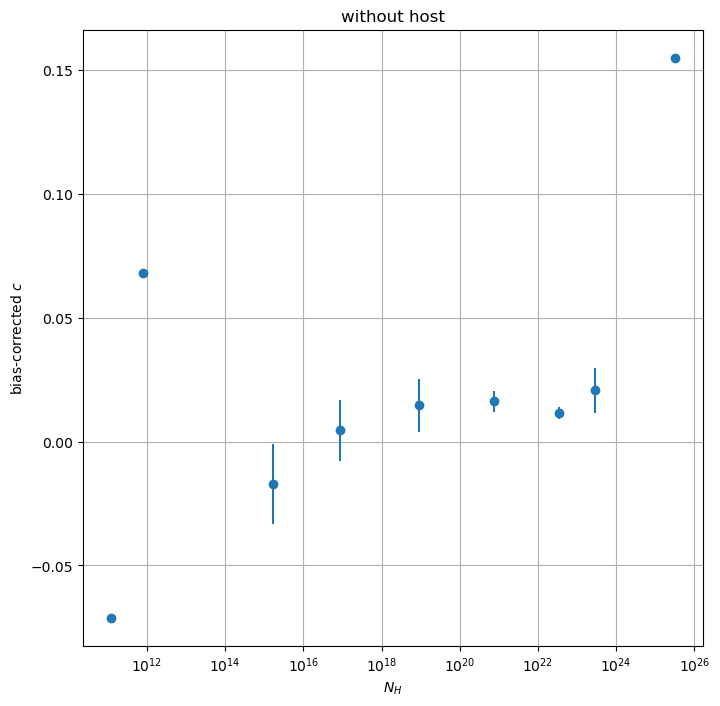

In [254]:
cmeans = [cbins[i][~np.isnan(cbins[i])].mean() for i in range(len(cbins))]                        # mask the nans 
nohostmeans = [no_host_bins[i][~np.isnan(cbins[i])].mean() for i in range(len(no_host_bins))]     # also mask the nans 

c_stds = [np.std(cbins[i][~np.isnan(cbins[i])]) for i in range(len(cbins))]
nohost_stds = [np.std(no_host_bins[i][~np.isnan(cbins[i])]) for i in range(len(no_host_bins))]

nohost_rms = [np.sqrt(np.sum((no_host_bins[i][~np.isnan(cbins[i])] - nohostmeans[i])**2) / len(no_host_bins[i][~np.isnan(cbins[i])])) for i in range(len(no_host_bins))]
rms_color = [np.sqrt(np.sum((cbins[i][~np.isnan(cbins[i])] - cmeans[i])**2) / len(cbins[i][~np.isnan(cbins[i])])) for i in range(len(cbins))]

errmean_color = [rms_color[i] / np.sqrt(len(cbins[i])) for i in range(len(cbins))]

plt.figure(figsize=(8,8))
plt.errorbar(nohostmeans, cmeans, errmean_color, fmt='o')
# plt.ylim(1e19, 1e30)
# plt.yscale('log')
plt.xscale('log')
plt.grid()
plt.title('without host')
plt.xlabel('$N_H$')
plt.ylabel('bias-corrected $c$')
# plt.xlim(1e24, 1e25)

In [85]:
### adpative binning to more clearly see what's going on in the middle

sn_col_dens_no_host_sorted = sn_col_dens_no_host[np.argsort(sn_col_dens_no_host)]
bin_size = 100
bins_nohost = [sn_col_dens_no_host_sorted[i:i + bin_size] for i in range(0, len(sn_col_dens_no_host_sorted), bin_size)]


biascor_dropped_colors_sorted = biascor_dropped_colors[np.argsort(sn_col_dens_no_host_sorted)]
cbins_nohost = [biascor_dropped_colors_sorted[i:i + bin_size] for i in range(0, len(sn_col_dens_no_host_sorted), bin_size)]

(1e+18, 1e+24)

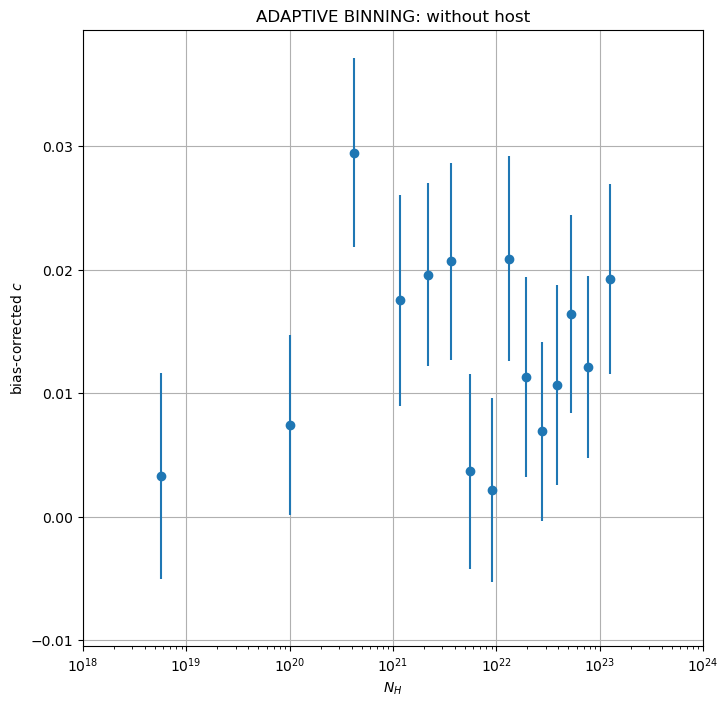

In [86]:
cmeans = [cbins_nohost[i][~np.isnan(cbins_nohost[i])].mean() for i in range(len(cbins_nohost))]                        # mask the nans 
nohostmeans = [bins_nohost[i][~np.isnan(cbins_nohost[i])].mean() for i in range(len(bins_nohost))]     # also mask the nans 

c_stds = [np.std(cbins_nohost[i][~np.isnan(cbins_nohost[i])]) for i in range(len(cbins_nohost))]
nohost_stds = [np.std(bins_nohost[i][~np.isnan(cbins_nohost[i])]) for i in range(len(bins_nohost))]

nohost_rms = [np.sqrt(np.sum((bins_nohost[i][~np.isnan(cbins_nohost[i])] - nohostmeans[i])**2) / len(bins_nohost[i][~np.isnan(cbins_nohost[i])])) for i in range(len(bins_nohost))]
rms_color = [np.sqrt(np.sum((cbins_nohost[i][~np.isnan(cbins_nohost[i])] - cmeans[i])**2) / len(cbins_nohost[i][~np.isnan(cbins_nohost[i])])) for i in range(len(cbins_nohost))]

errmean_color = [rms_color[i] / np.sqrt(len(cbins_nohost[i])) for i in range(len(cbins_nohost))]

plt.figure(figsize=(8,8))
plt.errorbar(nohostmeans, cmeans, errmean_color, fmt='o')
# plt.ylim(1e19, 1e30)
# plt.yscale('log')
plt.xscale('log')
plt.grid()
plt.title('ADAPTIVE BINNING: without host')
plt.xlabel('$N_H$')
plt.ylabel('bias-corrected $c$')
plt.xlim(1e18, 1e24)

### Bias-corrected color vs. redshift

In [ ]:
* 1.5) look at the color distribution with redshift, also N_H with redshift
    * i think redshift should have an effect on these… but maybe not?

/tmp/ipykernel_966424/1877907503.py:20: RuntimeWarning: Mean of empty slice.
  zmeans = [zbins_0[i][~np.isnan(zbins_0[i])].mean() for i in range(len(zbins_0))]                        # mask the nans
/tmp/ipykernel_966424/1877907503.py:21: RuntimeWarning: Mean of empty slice.
  cmeans_0 = [cbins_0[i][~np.isnan(zbins_0[i])].mean() for i in range(len(cbins_0))]     # also mask the nans; didn't take into acc the nan c's
/tmp/ipykernel_966424/1877907503.py:26: RuntimeWarning: invalid value encountered in divide
  rms_z = [np.sqrt(np.sum((zbins_0[i][~np.isnan(zbins_0[i])] - zmeans[i])**2) / len(zbins_0[i][~np.isnan(zbins_0[i])])) for i in range(len(zbins_0))]
/tmp/ipykernel_966424/1877907503.py:27: RuntimeWarning: invalid value encountered in scalar divide
  c_0_rms = [np.sqrt(np.sum((cbins_0[i][~np.isnan(zbins_0[i])] - cmeans_0[i])**2) / len(cbins_0[i][~np.isnan(zbins_0[i])])) for i in range(len(cbins_0))]


Text(0, 0.5, '$c$')

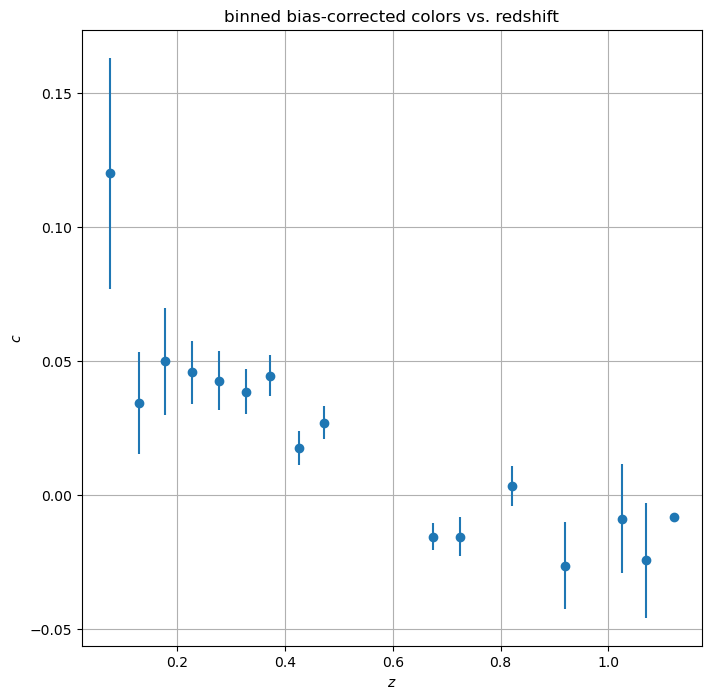

In [52]:
### N_H vs. redshift of sn

# plt.plot(dropped_colors, dropped_reds, '.')

## bin for color, according to redshift

cbins_0 = [[] for _ in range(len(zbins) - 1)]

for i in range(len(zbins)-1): 
    cbin = biascor_dropped_colors[(zbins[i] <= dropped_reds) & (dropped_reds <= zbins[i+1])]
    cbins_0[i] = cbin
    
## bin for redshift, according to redshift  
zbins_0 = [[] for _ in range(len(zbins) - 1)]

for i in range(len(zbins)-1): 
    zbin = dropped_reds[(zbins[i] <= dropped_reds) & (dropped_reds <= zbins[i+1])]
    zbins_0[i] = zbin
    
zmeans = [zbins_0[i][~np.isnan(zbins_0[i])].mean() for i in range(len(zbins_0))]                        # mask the nans 
cmeans_0 = [cbins_0[i][~np.isnan(zbins_0[i])].mean() for i in range(len(cbins_0))]     # also mask the nans; didn't take into acc the nan c's 

z_stds = [np.std(zbins_0[i][~np.isnan(zbins_0[i])]) for i in range(len(zbins_0))]
c_0_stds = [np.std(cbins_0[i][~np.isnan(zbins_0[i])]) for i in range(len(cbins_0))]

rms_z = [np.sqrt(np.sum((zbins_0[i][~np.isnan(zbins_0[i])] - zmeans[i])**2) / len(zbins_0[i][~np.isnan(zbins_0[i])])) for i in range(len(zbins_0))]
c_0_rms = [np.sqrt(np.sum((cbins_0[i][~np.isnan(zbins_0[i])] - cmeans_0[i])**2) / len(cbins_0[i][~np.isnan(zbins_0[i])])) for i in range(len(cbins_0))]

errmean_c_0 = [c_0_rms[i] / np.sqrt(len(cbins_0[i])) for i in range(len(cbins_0))]

plt.figure(figsize=(8,8))
plt.errorbar(zmeans, cmeans_0, errmean_c_0, fmt='o')

plt.grid()
plt.title('binned bias-corrected colors vs. redshift')
plt.xlabel('$z$')
plt.ylabel('$c$')

## some don't have any points bc only accounted for nans in zbins, not any nans in c (<- but here there are nans)

/tmp/ipykernel_966424/444204217.py:16: RuntimeWarning: Mean of empty slice.
  zmeans = [zbins_0[i][~np.isnan(zbins_0[i])].mean() for i in range(len(zbins_0))]                        # mask the nans
/tmp/ipykernel_966424/444204217.py:17: RuntimeWarning: Mean of empty slice.
  cmeans_0 = [cbins_0[i][~np.isnan(zbins_0[i])].mean() for i in range(len(cbins_0))]     # also mask the nans; didn't take into acc the nan c's
/tmp/ipykernel_966424/444204217.py:22: RuntimeWarning: invalid value encountered in divide
  rms_z = [np.sqrt(np.sum((zbins_0[i][~np.isnan(zbins_0[i])] - zmeans[i])**2) / len(zbins_0[i][~np.isnan(zbins_0[i])])) for i in range(len(zbins_0))]
/tmp/ipykernel_966424/444204217.py:23: RuntimeWarning: invalid value encountered in scalar divide
  c_0_rms = [np.sqrt(np.sum((cbins_0[i][~np.isnan(zbins_0[i])] - cmeans_0[i])**2) / len(cbins_0[i][~np.isnan(zbins_0[i])])) for i in range(len(cbins_0))]


Text(0, 0.5, '$c$')

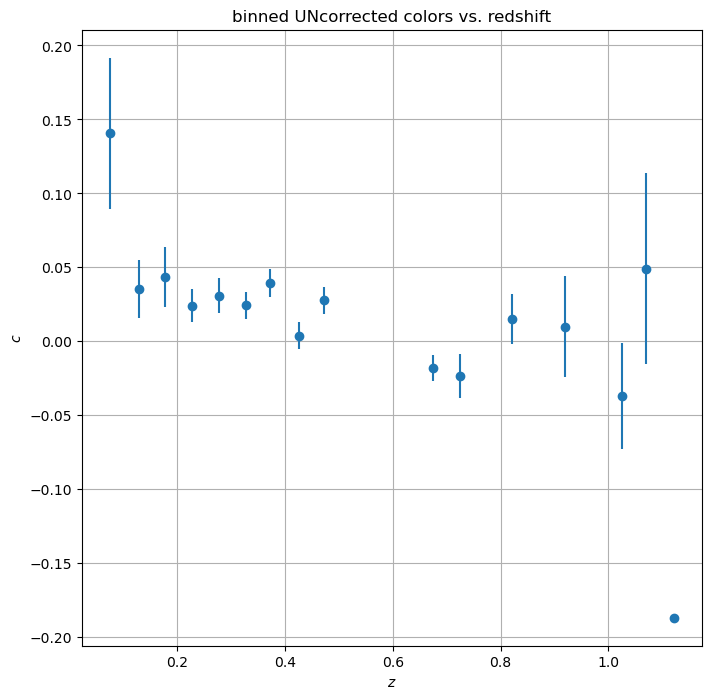

In [51]:
## non bias-corrected colors vs. z

cbins_0 = [[] for _ in range(len(zbins) - 1)]

for i in range(len(zbins)-1): 
    cbin = dropped_colors[(zbins[i] <= dropped_reds) & (dropped_reds <= zbins[i+1])]
    cbins_0[i] = cbin
    
## bin for redshift, according to redshift  
zbins_0 = [[] for _ in range(len(zbins) - 1)]

for i in range(len(zbins)-1): 
    zbin = dropped_reds[(zbins[i] <= dropped_reds) & (dropped_reds <= zbins[i+1])]
    zbins_0[i] = zbin
    
zmeans = [zbins_0[i][~np.isnan(zbins_0[i])].mean() for i in range(len(zbins_0))]                        # mask the nans 
cmeans_0 = [cbins_0[i][~np.isnan(zbins_0[i])].mean() for i in range(len(cbins_0))]     # also mask the nans; didn't take into acc the nan c's 

z_stds = [np.std(zbins_0[i][~np.isnan(zbins_0[i])]) for i in range(len(zbins_0))]
c_0_stds = [np.std(cbins_0[i][~np.isnan(zbins_0[i])]) for i in range(len(cbins_0))]

rms_z = [np.sqrt(np.sum((zbins_0[i][~np.isnan(zbins_0[i])] - zmeans[i])**2) / len(zbins_0[i][~np.isnan(zbins_0[i])])) for i in range(len(zbins_0))]
c_0_rms = [np.sqrt(np.sum((cbins_0[i][~np.isnan(zbins_0[i])] - cmeans_0[i])**2) / len(cbins_0[i][~np.isnan(zbins_0[i])])) for i in range(len(cbins_0))]

errmean_c_0 = [c_0_rms[i] / np.sqrt(len(cbins_0[i])) for i in range(len(cbins_0))]

plt.figure(figsize=(8,8))
plt.errorbar(zmeans, cmeans_0, errmean_c_0, fmt='o')

plt.grid()
plt.title('binned UNcorrected colors vs. redshift')
plt.xlabel('$z$')
plt.ylabel('$c$')

### N_H vs. redshift - not any correlation except for that huge outlier 

In [31]:
sn_col_dens_no_host = np.load('sn_col_dens_host_sfr_z_14_no_high_nh.npy')

In [32]:
sn_col_dens_no_host

array([2.74662221e+21, 5.74971686e+20, 4.05052084e+20, ...,
       1.32064180e+19, 1.16648692e+21, 7.18390144e+20])

In [252]:
### N_H vs. redshift of sn

# plt.plot(dropped_colors, dropped_reds, '.')

## bin for color, according to redshift
nohosts_0 = [[] for _ in range(len(zbins) - 1)]

for i in range(len(zbins)-1): 
    nohost = sn_col_dens_no_host[(zbins[i] <= dropped_reds) & (dropped_reds <= zbins[i+1])]
    nohosts_0[i] = nohost
    
## bin for redshift, according to redshift  
zbins_0 = [[] for _ in range(len(zbins) - 1)]

for i in range(len(zbins)-1): 
    zbin = dropped_reds[(zbins[i] <= dropped_reds) & (dropped_reds <= zbins[i+1])]
    zbins_0[i] = zbin
    

/tmp/ipykernel_966424/3320918725.py:1: RuntimeWarning: Mean of empty slice.
  zmeans = [zbins_0[i][~np.isnan(zbins_0[i])].mean() for i in range(len(zbins_0))]                        # mask the nans
/global/common/software/nersc/pe/conda-envs/24.1.0/python-3.11/nersc-python/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
/tmp/ipykernel_966424/3320918725.py:2: RuntimeWarning: Mean of empty slice.
  nohostmeans_0 = [nohosts_0[i][~np.isnan(zbins_0[i])].mean() for i in range(len(nohosts_0))]     # also mask the nans
/global/common/software/nersc/pe/conda-envs/24.1.0/python-3.11/nersc-python/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/global/common/software/nersc/pe/conda-envs/24.1.0/python-3.11/nersc-python/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees

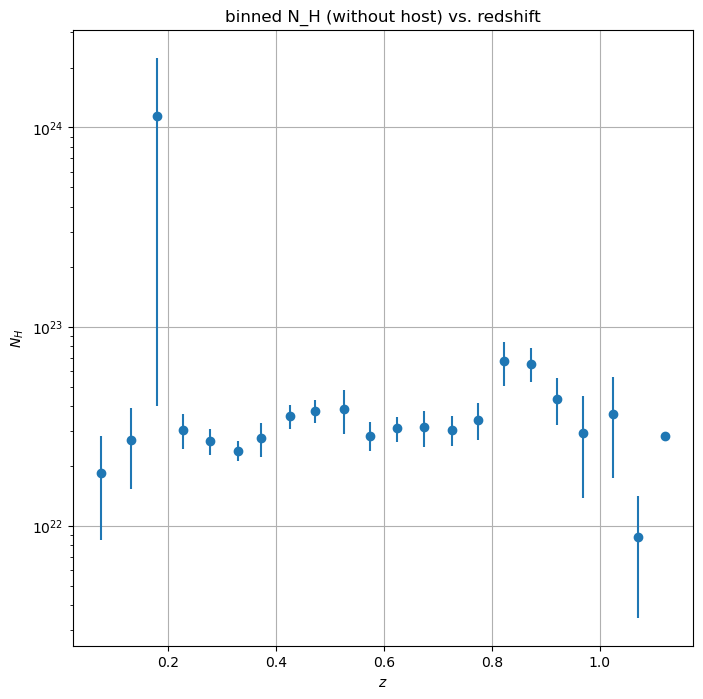

In [253]:
zmeans = [zbins_0[i][~np.isnan(zbins_0[i])].mean() for i in range(len(zbins_0))]                        # mask the nans 
nohostmeans_0 = [nohosts_0[i][~np.isnan(zbins_0[i])].mean() for i in range(len(nohosts_0))]     # also mask the nans 

z_stds = [np.std(zbins_0[i][~np.isnan(zbins_0[i])]) for i in range(len(zbins_0))]
nohost_0_stds = [np.std(nohosts_0[i][~np.isnan(zbins_0[i])]) for i in range(len(nohosts_0))]

rms_z = [np.sqrt(np.sum((zbins_0[i][~np.isnan(zbins_0[i])] - zmeans[i])**2) / len(zbins_0[i][~np.isnan(zbins_0[i])])) for i in range(len(zbins_0))]
nohost_0_rms = [np.sqrt(np.sum((nohosts_0[i][~np.isnan(zbins_0[i])] - nohostmeans_0[i])**2) / len(nohosts_0[i][~np.isnan(zbins_0[i])])) for i in range(len(nohosts_0))]

errmean_nohost = [nohost_0_rms[i] / np.sqrt(len(nohosts_0[i])) for i in range(len(nohosts_0))]

plt.figure(figsize=(8,8))
plt.errorbar(zmeans, nohostmeans_0, errmean_nohost, fmt='o')
# plt.ylim(1e19, 1e30)
# plt.yscale('log')
# plt.xscale('log')
plt.grid()
plt.title('binned N_H (without host) vs. redshift')
plt.xlabel('$z$')
plt.ylabel('$N_H$')
plt.yscale('log')
# plt.ylim(1e18, 1e24)

/tmp/ipykernel_453770/3794828837.py:1: RuntimeWarning: Mean of empty slice.
  zmeans = [zbins_0[i][~np.isnan(zbins_0[i])].mean() for i in range(len(zbins_0))]                        # mask the nans
/tmp/ipykernel_453770/3794828837.py:2: RuntimeWarning: Mean of empty slice.
  nohostmeans_0 = [nohosts_0[i][~np.isnan(zbins_0[i])].mean() for i in range(len(nohosts_0))]     # also mask the nans
/tmp/ipykernel_453770/3794828837.py:7: RuntimeWarning: invalid value encountered in divide
  rms_z = [np.sqrt(np.sum((zbins_0[i][~np.isnan(zbins_0[i])] - zmeans[i])**2) / len(zbins_0[i][~np.isnan(zbins_0[i])])) for i in range(len(zbins_0))]
/tmp/ipykernel_453770/3794828837.py:8: RuntimeWarning: invalid value encountered in scalar divide
  nohost_0_rms = [np.sqrt(np.sum((nohosts_0[i][~np.isnan(zbins_0[i])] - nohostmeans_0[i])**2) / len(nohosts_0[i][~np.isnan(zbins_0[i])])) for i in range(len(nohosts_0))]


(1e+18, 1e+24)

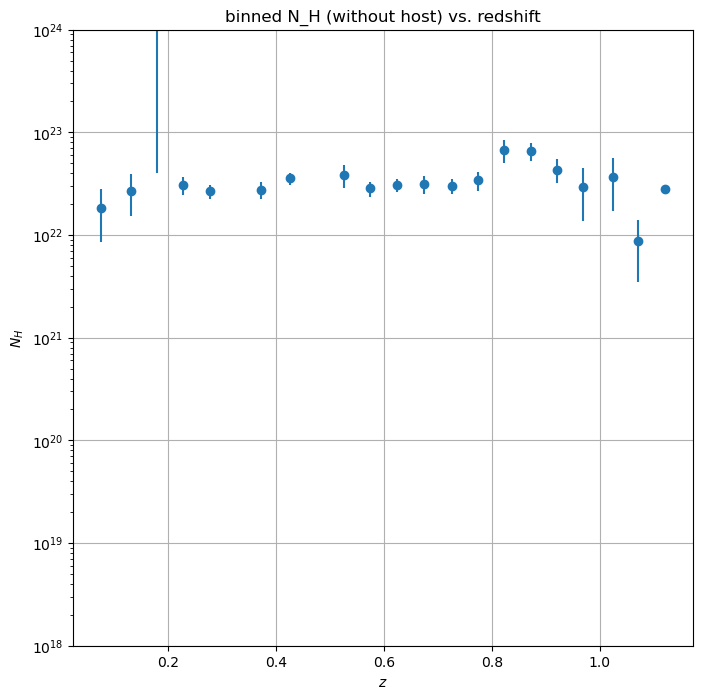

In [148]:
zmeans = [zbins_0[i][~np.isnan(zbins_0[i])].mean() for i in range(len(zbins_0))]                        # mask the nans 
nohostmeans_0 = [nohosts_0[i][~np.isnan(zbins_0[i])].mean() for i in range(len(nohosts_0))]     # also mask the nans 

z_stds = [np.std(zbins_0[i][~np.isnan(zbins_0[i])]) for i in range(len(zbins_0))]
nohost_0_stds = [np.std(nohosts_0[i][~np.isnan(zbins_0[i])]) for i in range(len(nohosts_0))]

rms_z = [np.sqrt(np.sum((zbins_0[i][~np.isnan(zbins_0[i])] - zmeans[i])**2) / len(zbins_0[i][~np.isnan(zbins_0[i])])) for i in range(len(zbins_0))]
nohost_0_rms = [np.sqrt(np.sum((nohosts_0[i][~np.isnan(zbins_0[i])] - nohostmeans_0[i])**2) / len(nohosts_0[i][~np.isnan(zbins_0[i])])) for i in range(len(nohosts_0))]

errmean_nohost = [nohost_0_rms[i] / np.sqrt(len(nohosts_0[i])) for i in range(len(nohosts_0))]

plt.figure(figsize=(8,8))
plt.errorbar(zmeans, nohostmeans_0, errmean_nohost, fmt='o')
# plt.ylim(1e19, 1e30)
# plt.yscale('log')
# plt.xscale('log')
plt.grid()
plt.title('binned N_H (without host) vs. redshift')
plt.xlabel('$z$')
plt.ylabel('$N_H$')
plt.yscale('log')
plt.ylim(1e18, 1e24)

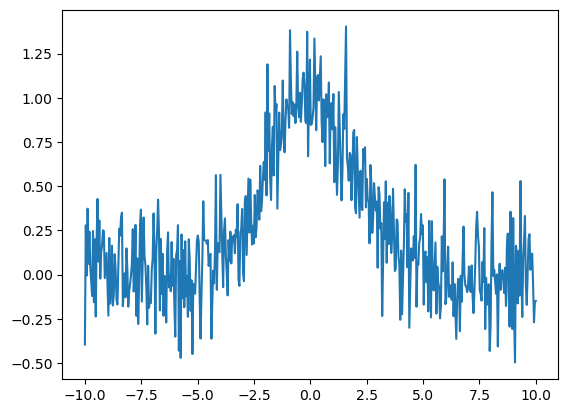

In [34]:
xs = np.linspace(-10, 10, 500)
sig = 2
simi = np.random.normal(0, 0.2, size=500) + np.exp(-xs**2 / (2*sig**2))
plt.plot(xs, simi)
# expe = np.random.normal(loc=0, scale=2.0, size=500)
# plt.plot(xs, expe)

In [112]:
xs = np.linspace(-10, 10, 500)
sig = 2
simi = np.random.normal(0, 0.2, size=500) + np.exp(-xs**2 / (2*sig**2))


from scipy import optimize 

def g(x, a=2, sig=2): 
    return a*np.exp(x**2/(2*sig))

optimize.curve_fit(g, xdata=xs, ydata=simi)



(array([-1.12903990e-15,  9.99999998e-01]),
 array([[2.63628909e-29, 4.29445575e-23],
        [4.29445575e-23, 6.99625132e-17]]))

In [113]:
from scipy import optimize 
def f(x, a, b): 
    return a*x + b 

# simu = np.random.normal(0, 1, size=500) + 2*xs + 18
# optimize.curve_fit(f, simu, xs, method='lm')

start = 8
cutoff = 2
popt, pcov = optimize.curve_fit(f, xdata=nohostmeans[start:-cutoff], ydata=cmeans[start:-cutoff], sigma=errmean_color[start:-cutoff], method='dogbox')



/global/common/software/nersc/pe/conda-envs/24.1.0/python-3.11/nersc-python/lib/python3.11/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


In [98]:
popt, pcov

(array([4.13590306e-25, 1.00000000e+00]),
 array([[8.56878295e-050, 3.43831246e-077],
        [3.43831246e-077, 1.37965830e-104]]))

In [99]:
perr = np.sqrt(np.diag(pcov))
perr

array([2.92724836e-25, 1.17458857e-52])

In [100]:
f(np.array(nohostmeans[:-1]), *popt)

array([1.00946343e+00, 1.02869634e+00, 1.07084486e+00, 1.21790021e+00,
       1.75745917e+00, 3.62908759e+00, 8.26647392e+00, 2.77431067e+01,
       7.38669311e+01, 2.63283166e+02, 7.21018995e+02, 1.98667806e+03,
       5.57557932e+03])

In [112]:
f(m, *popt)

array([1.00946343e+00, 1.02869634e+00, 1.07084486e+00, 1.21790021e+00,
       1.75745917e+00, 3.62908759e+00, 8.26647392e+00, 2.77431067e+01,
       7.38669311e+01, 2.63283166e+02, 7.21018995e+02, 1.98667806e+03,
       5.57557932e+03])

<ErrorbarContainer object of 3 artists>

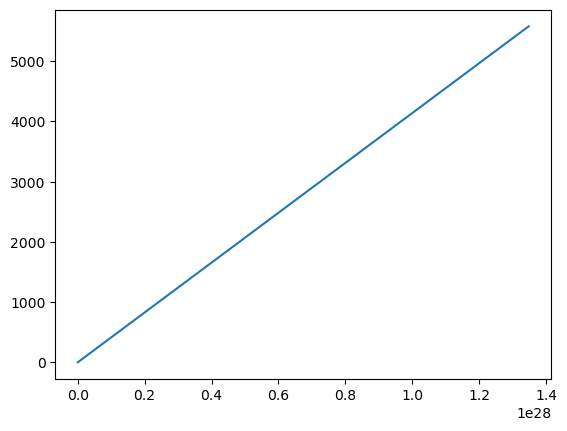

In [113]:
# plt.plot(np.array(nohostmeans[:-1]), f(np.array(nohostmeans[:-1]), *popt))
m = np.array(nohostmeans[:-1])
ex = np.linspace(m.min(), m.max(), 1000)
plt.errorbar(np.linspace(m.min(), m.max(), 1000), f(np.linspace(m.min(), m.max(), 1000), *popt), perr[1])


NameError: name 'perr' is not defined

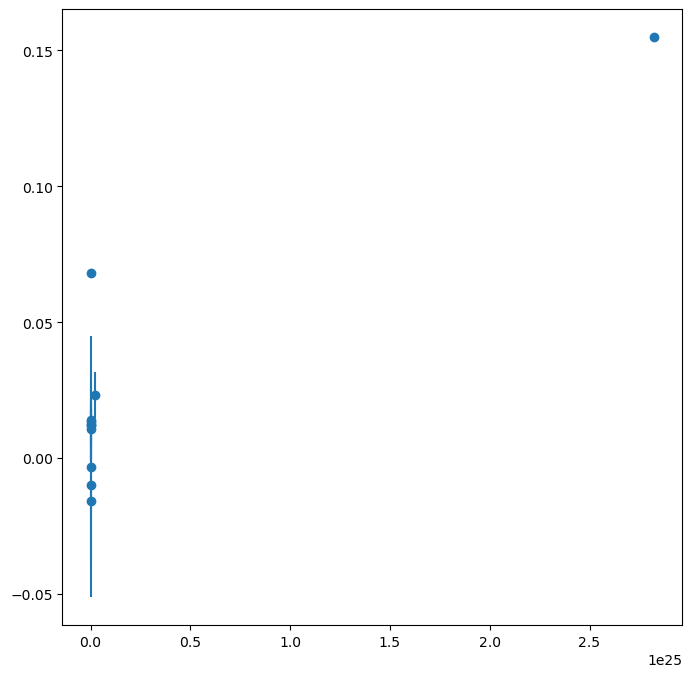

In [114]:
cmeans = [cbins[i][~np.isnan(cbins[i])].mean() for i in range(len(cbins))]                        # mask the nans 
nohostmeans = [no_host_bins[i][~np.isnan(cbins[i])].mean() for i in range(len(no_host_bins))]     # also mask the nans 

c_stds = [np.std(cbins[i][~np.isnan(cbins[i])]) for i in range(len(cbins))]
nohost_stds = [np.std(no_host_bins[i][~np.isnan(cbins[i])]) for i in range(len(no_host_bins))]

nohost_rms = [np.sqrt(np.sum((no_host_bins[i][~np.isnan(cbins[i])] - nohostmeans[i])**2) / len(no_host_bins[i][~np.isnan(cbins[i])])) for i in range(len(no_host_bins))]
rms_color = [np.sqrt(np.sum((cbins[i][~np.isnan(cbins[i])] - cmeans[i])**2) / len(cbins[i][~np.isnan(cbins[i])])) for i in range(len(cbins))]

errmean_color = [rms_color[i] / np.sqrt(len(cbins[i])) for i in range(len(cbins))]

plt.figure(figsize=(8,8))
plt.errorbar(nohostmeans, cmeans, errmean_color, fmt='o')
# plt.errorbar(np.linspace(nohostmeans[:-1].min(), nohostmeans[:-1].max(), 1000), f(np.array(nohostmeans[:-1]), *popt), perr[1])
plt.errorbar(np.linspace(m.min(), m.max(), 1000), f(np.linspace(m.min(), m.max(), 1000), *popt), perr[1])


# plt.ylim(1e19, 1e30)
# plt.yscale('log')
plt.xscale('log')
plt.grid()
plt.title('without host')
plt.xlabel('$N_H$')
plt.ylabel('bias-corrected $c$')
# plt.xlim(1e24, 1e25)

### for inclusion of host

Text(0, 0.5, 'number of sn')

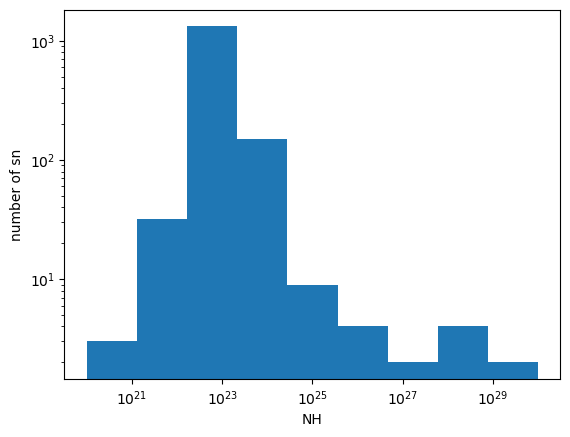

In [33]:
bins = np.linspace(np.log10(1e20), np.log10(1e30), 10)
# bins = np.linspace(np.log10(sn_col_dens_no_host.min()), np.log10(sn_col_dens_no_host.max()), 50)

bins = np.power(10, bins)

n, b, c = plt.hist(sn_col_dens_host, bins=bins, log=True)
plt.xscale('log') 
plt.xlabel('NH')
plt.ylabel('number of sn')

Text(0, 0.5, 'bias-corrected $c$')

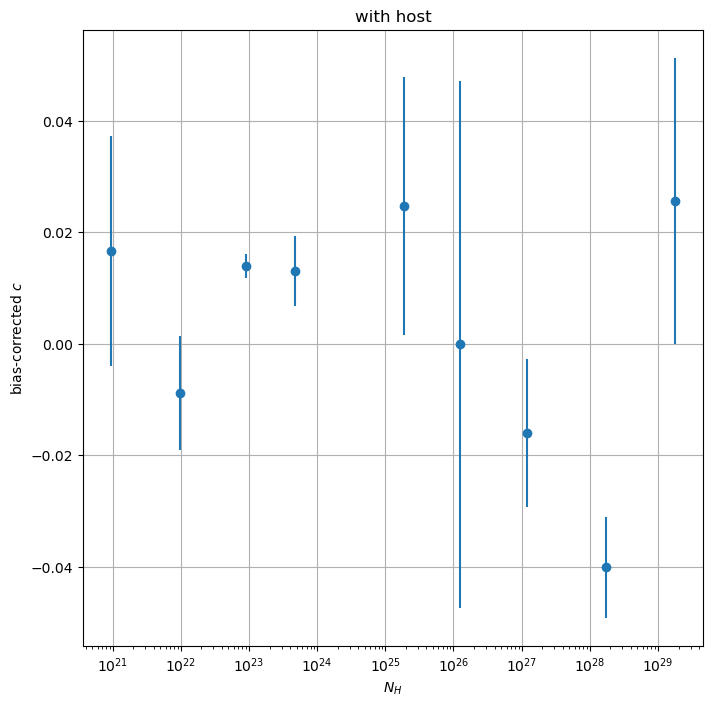

In [34]:
host_bins = [[] for _ in range(len(b) - 1)]

for i in range(len(b)-1): 
    host_bin = sn_col_dens_host[(b[i] <= sn_col_dens_host) & (sn_col_dens_host <= b[i+1])]
    host_bins[i] = host_bin

    
# dropped_colors = colors[np.setdiff1d(np.arange(0, 1635, 1), nozmatch)]

cbins = [[] for _ in range(len(b) - 1)]

for i in range(len(b)-1): 
    cbin = biascor_dropped_colors[(b[i] <= sn_col_dens_host) & (sn_col_dens_host <= b[i+1])]
    cbins[i] = cbin
    
    
cmeans = [cbins[i][~np.isnan(cbins[i])].mean() for i in range(len(cbins))]                        # mask the nans 
hostmeans = [host_bins[i][~np.isnan(cbins[i])].mean() for i in range(len(host_bins))]     # also mask the nans 

c_stds = [np.std(cbins[i][~np.isnan(cbins[i])]) for i in range(len(cbins))]
host_stds = [np.std(host_bins[i][~np.isnan(cbins[i])]) for i in range(len(host_bins))]

host_rms = [np.sqrt(np.sum((host_bins[i][~np.isnan(cbins[i])] - hostmeans[i])**2) / len(host_bins[i][~np.isnan(cbins[i])])) for i in range(len(host_bins))]
rms_color = [np.sqrt(np.sum((cbins[i][~np.isnan(cbins[i])] - cmeans[i])**2) / len(cbins[i][~np.isnan(cbins[i])])) for i in range(len(cbins))]

errmean_color = [rms_color[i] / np.sqrt(len(cbins[i])) for i in range(len(cbins))]

plt.figure(figsize=(8,8))
plt.errorbar(hostmeans, cmeans, errmean_color, fmt='o')
# plt.ylim(1e19, 1e30)
# plt.yscale('log')
plt.xscale('log')
plt.grid()
plt.title('with host')
plt.xlabel('$N_H$')
plt.ylabel('bias-corrected $c$')
# plt.xlim(1e24, 1e25)

Text(0, 0.5, 'bias-corrected $c$')

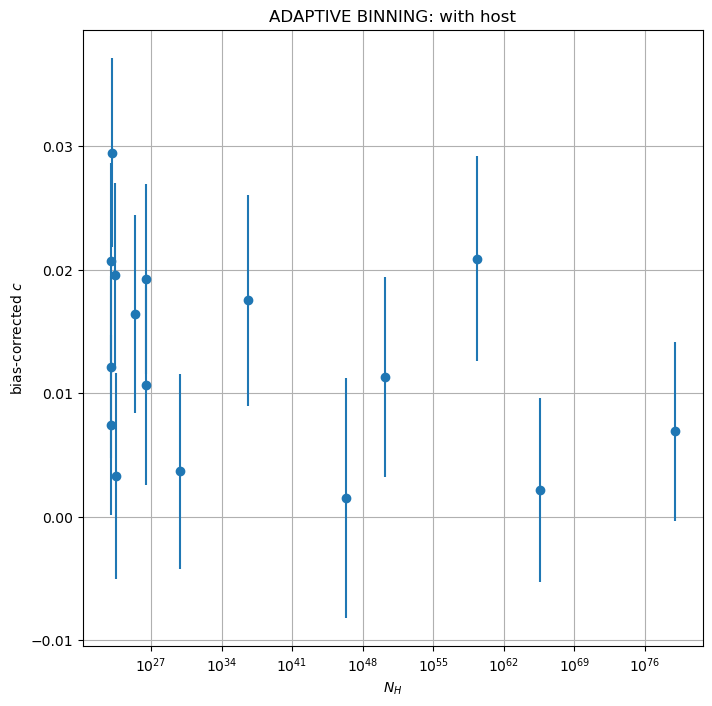

In [99]:
sn_col_dens_host_sorted = sn_col_dens_host[np.argsort(sn_col_dens_host)]
bin_size = 100
bins_host = [sn_col_dens_host[i:i + bin_size] for i in range(0, len(sn_col_dens_host), bin_size)]

biascor_dropped_colors_sorted = biascor_dropped_colors[np.argsort(sn_col_dens_host_sorted)]
cbins_host = [biascor_dropped_colors_sorted[i:i + bin_size] for i in range(0, len(sn_col_dens_host_sorted), bin_size)]

cmeans = [cbins_host[i][~np.isnan(cbins_host[i])].mean() for i in range(len(cbins_host))]                        # mask the nans 
hostmeans = [bins_host[i][~np.isnan(cbins_host[i])].mean() for i in range(len(bins_host))]     # also mask the nans 

c_stds = [np.std(cbins_host[i][~np.isnan(cbins_host[i])]) for i in range(len(cbins_host))]
host_stds = [np.std(bins_host[i][~np.isnan(cbins_host[i])]) for i in range(len(bins_host))]

host_rms = [np.sqrt(np.sum((bins_host[i][~np.isnan(cbins_host[i])] - hostmeans[i])**2) / len(bins_host[i][~np.isnan(cbins_host[i])])) for i in range(len(bins_host))]
rms_color = [np.sqrt(np.sum((cbins_host[i][~np.isnan(cbins_host[i])] - cmeans[i])**2) / len(cbins_host[i][~np.isnan(cbins_host[i])])) for i in range(len(cbins_host))]

errmean_color = [rms_color[i] / np.sqrt(len(cbins_host[i])) for i in range(len(cbins_host))]




plt.figure(figsize=(8,8))
plt.errorbar(hostmeans, cmeans, errmean_color, fmt='o')
# plt.ylim(1e19, 1e30)
# plt.yscale('log')
plt.xscale('log')
plt.grid()
plt.title('ADAPTIVE BINNING: with host')
plt.xlabel('$N_H$')
plt.ylabel('bias-corrected $c$')
# plt.xlim(1e18, 1e24)
# plt.xlim(1e22, 1e40)


In [111]:
optimize.curve_fit(f, hostmeans, cmeans, sigma=errmean_color_host)

ValueError: Unable to determine number of fit parameters.

### No host galaxy contribution first: 

In [153]:
* NOT Radius of the sun, but radius at which the sun rotates around the center of the galaxy
    * r_sun = 8 kpc ish
    * ^ degenerate w/ choice of R_n

* typical hydrogen column density that can be detectable: 10^16 / cm^2 
    * this will be smaller, maybe ^14, ^10
* hydrogen to dust mass ratio number
* what is the mean number of galaxies 
* reddening to column desnity conversion
    * 0.05 (0.03) mag for A_V —> ~ 10^18

* weight the n0 by the brightness, or mass 
    * let’s do mass since brightness alr accounted for in other weight 
* R_n is related to size of galaxy
    * a0_sersic, b0_sersic 
* n_0 at R_n (n_0 proportional to the amount of gas / mass in galaxy), and R_n
    * logmass -> gal_mass 

SyntaxError: invalid character '—' (U+2014) (2901443709.py, line 10)

In [ ]:
Make a plot: 
* 1) with the host galaxy contribution (you have no clue where the supernova is in the host galaxy, so just count the contribution from the ENTIRE host) 
    * this might actually make a difference because host galaxy would contribute more???  
* 2) without the host galaxy contirbution
* ^^ ACTUALLY FOR THIS: 
    * all i need is to add up the column densities (integrated number densities), because it takes into accoutn weighting from brightness
    * GET RID OF THE 0 - 1 thing (because this wouldn’t really change the contribtuion of the host galaxy) 


In [ ]:
        ### Can calculate, but for our purposes will do later after writing those functions. ### 
#         weights_mag = df['weight'].loc[close_gal]
        
#         # Get weights of impact paramEters of each each CLOSE galaxy 
#         inds_imp = np.digitize(all_imp_kpcs2_internal[i][close_gal], close_imp_bins)
#         weights_imp = (11 - inds_imp) * 0.1

#         ## calculate sum of multiplied weights to get num_fgals per SN 
#         total_weights = weights_imp * weights_mag
#         num_fgals[i] = np.sum(total_weights) 

#         # weight by impact parameter and write to file BEFORE calculating number of galaxies

#         with open(f'new_weighted_num_fgals.txt', 'a', newline='') as f:
#             f.write(str(num_fgals[i]) + ' ')

In [121]:
df_dropped_

Index(['Unnamed: 0', 'GALID', 'RA_GAL', 'DEC_GAL', 'ZTRUE', 'ZERR', 'g_obs',
       'r_obs', 'i_obs', 'z_obs', 'a0_Sersic', 'b0_Sersic', 'n0_Sersic',
       'a_rot', 'LOGMASS', 'LOG_SFR', 'a_DLR', 'b_DLR', 'DLR_area',
       'Sersic_area', 'g_obs_auto', 'r_obs_auto', 'i_obs_auto', 'z_obs_auto',
       'obs_gr', 'NBR_LIST', 'LOGSFR_TRUE', 'griz', 'weight'],
      dtype='object')

## More refinements

* select only the high-confidence ztrues (for galaxies) i.e. those with low error bars
* refine n_h model -> is there another model that's able to look at dust distribution around galaxies? <- read other papers 

=> with the A_v of up to 0.05 up to redshift 1... so we should be able to see it

## Separate into 2 groups and plot color vs. N_H to see if can extract most statistically significant difference


In [ ]:
### i need to separate from the getgo -> into two groups with the number of galaxies? or impact parmaeter? 
    ### BEFORE calculating the n_H 
    
#### NEW INSTRUCTIONS
# 1) SEPARATE FROM NUMBER OF CLOSE GALAXIES FOR EACH SN -> INTO 2 GROUPS
# 2) THEN FROM THERE WE ALREADY HAVE THE INTEGRATED NUMBER DENSITY = COLUMN DENSITY FOR EACH SUPERNOVA
# 3) THEN, WE CAN GRAPH BIASCOR-COLOR VS. N_H FOR THAT 2 GROUPINGS. 

#### SO JUST NEED TO EXTRACT THE (CLOSEGAL + Z_GAL) GROUPINGS RIGHT NOW <-- note added the zgal condition to this 
    ## BUT THAT ACTUALLY SHOULDN'T CHANGE THE GROUPINGS BC Z_GAL IS SAME FOR EVERYTHING (ALL SNE) 
    


In [35]:
z_ratio = new_dropped_df['ZERR']/new_dropped_df['ZTRUE']
z_sn_gr5 = z_ratio[z_ratio<0.2]
z_sn_gr5_cond = (z_ratio<0.2)

close_gals_z_gr5 = np.zeros(1543)

for i in range(len(close_gals_z_gr5)): 
    close_gs = np.load(f'/pscratch/sd/j/joygong/Dust/CloseGal_RT_no_host/close_gals_SN_{i}.npy')

    num = np.sum((close_gs) & (z_sn_gr5_cond))
    close_gals_z_gr5[i] = num

(array([ 29., 130., 275., 358., 352., 217., 106.,  46.,  26.,   4.]),
 array([ 19. ,  58.3,  97.6, 136.9, 176.2, 215.5, 254.8, 294.1, 333.4,
        372.7, 412. ]),
 <BarContainer object of 10 artists>)

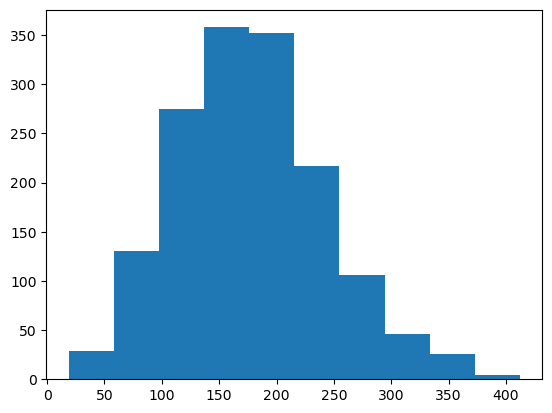

In [41]:
plt.hist(close_gals_z_gr5)

In [36]:
close_gals_z_gr5_sorted = close_gals_z_gr5[np.argsort(close_gals_z_gr5)]
close_gals_z_gr5_sorted

array([ 19.,  23.,  26., ..., 389., 402., 412.])

In [186]:
np.argsort(close_gals_z_gr5)

array([ 520, 1531, 1472, ...,  846, 1348, 1037])

In [180]:
sn_col_dens_no_host[np.argsort(close_gals_z_gr5)]

array([3.51043159e+21, 3.16776718e+20, 2.62551352e+20, ...,
       3.28217143e+22, 6.73484356e+20, 6.19083777e+22])

In [190]:
sn_col_dens_no_host[np.argsort(close_gals_z_gr5)]

array([3.51043159e+21, 3.16776718e+20, 2.62551352e+20, ...,
       3.28217143e+22, 6.73484356e+20, 6.19083777e+22])

In [191]:
sn_col_dens_no_host[np.argsort(sn_col_dens_no_host)]

array([8.47117547e+09, 1.21659762e+11, 8.17923140e+11, ...,
       3.13797991e+25, 1.58041921e+52, 2.06404838e+61])

In [195]:
[bins_nohost[i].mean() for i in range(len(bins_nohost))]

[6.3372982763974025e+22, 2.677105559353284e+58]

In [ ]:
biascor_dropped_colors_sorted

Text(0, 0.5, 'bias-corrected $c$')

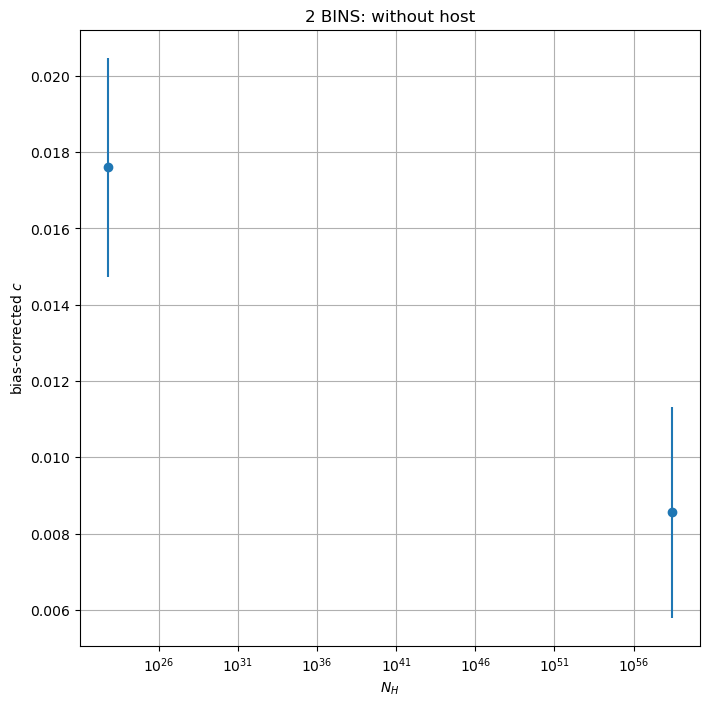

In [38]:
sn_col_dens_no_host_sorted = sn_col_dens_no_host[np.argsort(close_gals_z_gr5)]
bin_size = int(np.ceil(len(sn_col_dens_no_host)/2))
bins_nohost = [sn_col_dens_no_host_sorted[i:i + bin_size] for i in range(0, len(sn_col_dens_no_host_sorted), bin_size)]


biascor_dropped_colors_sorted = biascor_dropped_colors[np.argsort(close_gals_z_gr5)]
cbins_nohost = [biascor_dropped_colors_sorted[i:i + bin_size] for i in range(0, len(sn_col_dens_no_host_sorted), bin_size)]

cmeans = [cbins_nohost[i][~np.isnan(cbins_nohost[i])].mean() for i in range(len(cbins_nohost))]                        # mask the nans 
nohostmeans = [bins_nohost[i][~np.isnan(cbins_nohost[i])].mean() for i in range(len(bins_nohost))]     # also mask the nans 

c_stds = [np.std(cbins_nohost[i][~np.isnan(cbins_nohost[i])]) for i in range(len(cbins_nohost))]
nohost_stds = [np.std(bins_nohost[i][~np.isnan(cbins_nohost[i])]) for i in range(len(bins_nohost))]

nohost_rms = [np.sqrt(np.sum((bins_nohost[i][~np.isnan(cbins_nohost[i])] - nohostmeans[i])**2) / len(bins_nohost[i][~np.isnan(cbins_nohost[i])])) for i in range(len(bins_nohost))]
rms_color = [np.sqrt(np.sum((cbins_nohost[i][~np.isnan(cbins_nohost[i])] - cmeans[i])**2) / len(cbins_nohost[i][~np.isnan(cbins_nohost[i])])) for i in range(len(cbins_nohost))]

errmean_color = [rms_color[i] / np.sqrt(len(cbins_nohost[i])) for i in range(len(cbins_nohost))]

plt.figure(figsize=(8,8))
plt.errorbar(nohostmeans, cmeans, errmean_color, fmt='o')
# plt.ylim(1e19, 1e30)
# plt.yscale('log')
plt.xscale('log')
plt.grid()
plt.title('2 BINS: without host')
plt.xlabel('$N_H$')
plt.ylabel('bias-corrected $c$')
# plt.xlim(1e18, 1e24)